In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
#plt.style.use('ggplot') # To look more like r stuff
import seaborn as sns

import geoplot as gplt
import geoplot.crs as gcrs
import geopandas as gpd
from matplotlib_scalebar.scalebar import ScaleBar
import numpy as np
import folium
#from folium import Choropleth

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting path to data
path = 'data/'

In [31]:
# importing data to geopandas
gdf = gpd.read_file(path+"SIMD.gpkg")

In [61]:
# Importing geo data from interactive map

gdf2 = gpd.read_file(path+"simd2020_withgeog").set_index('DataZone')

# Renaming index to match the previous 2
gdf2.index.names = ['Data_Zone']

Name  TotPop2011  ResPop2011  HHCnt2011   StdAreaHa  \
Data_Zone                                                                       
S01006506          Culter - 01         872         852        424  438.880218   
S01006507          Culter - 02         836         836        364   22.349739   
S01006508          Culter - 03         643         643        340   27.019476   
S01006509          Culter - 04         580         580        274    9.625426   
S01006510          Culter - 05         644         577        256   18.007657   
...                        ...         ...         ...        ...         ...   
S01013477  Broxburn South - 06         605         605        303   10.988164   
S01013478   Broxburn East - 01         860         851        358   12.438169   
S01013479   Broxburn East - 02         786         781        428   26.714576   
S01013480   Broxburn East - 03         671         671        302    9.624700   
S01013481   Broxburn East - 04         451         451        189  511.606694   

           StdAreaKm2    Shape_Leng    Shape_Area  \
Data_Zone                                           
S01006506    4.388801  11801.872345  4.388802e+06   
S01006507    0.223498   2900.406362  2.217468e+05   
S01006508    0.270194   3468.761949  2.701948e+05   
S01006509    0.096254   1647.461389  9.625426e+04   
S01006510    0.180076   3026.111412  1.800766e+05   
...               ...           ...           ...   
S01013477    0.109882   1775.782199  1.098816e+05   
S01013478    0.124382   2319.192976  1.243817e+05   
S01013479    0.267145   3234.544766  2.671458e+05   
S01013480    0.096248   1598.577583  9.624701e+04   
S01013481    5.116068  13900.390027  5.116067e+06   

                                                    geometry  
Data_Zone                                                     
S01006506  POLYGON ((-2.27748 57.09527, -2.27644 57.09521...  
S01006507  POLYGON ((-2.27354 57.10449, -2.27333 57.10449...  
S01006508  POLYGON ((-2.27443 57.10171, -2.27237 57.10046...  
S01006509  POLYGON ((-2.26611 57.10133, -2.26599 57.10092...  
S01006510  POLYGON ((-2.26013 57.10160, -2.26050 57.10134...  
...                                                      ...  
S01013477  POLYGON ((-3.46323 55.93434, -3.46319 55.93408...  
S01013478  POLYGON ((-3.48355 55.93733, -3.48354 55.93728...  
S01013479  POLYGON ((-3.46664 55.93627, -3.46652 55.93622...  
S01013480  POLYGON ((-3.46259 55.93774, -3.46243 55.93725...  
S01013481  POLYGON ((-3.44318 55.93923, -3.44285 55.93909...  

[6976 rows x 9 columns]

In [5]:
# Creating a population density figure from the total population and shape area. (Not the same as overcrowding.)
# Creating a crime dencity figure from the total crime count and shape area.
# Creating a working age rate (per cent) from total population and working age population

gdf['Population_den'] = gdf['Total_population'] / gdf['Shape_Area']
gdf['crime_den'] = gdf['crime_count'] / gdf['Shape_Area']
gdf['workagerate'] = (gdf['Working_age_population'] / gdf['Total_population']) * 100

I thought it might be intresting to compare this data with council funding.  
Data created from https://www.gov.scot/publications/local-government-finance-circular-5-2021-settlement-for-2021-2022/  
I understand council funding is not straight forward further details can be found:- https://www.gov.scot/collections/local-government-finance-statistics/

In [6]:
councilfundingdf = pd.read_csv(path+"Total_LG_Fund21-22.csv",  index_col=0)
councilfundingdf.columns

Index(['LG_fin_set_21-22'], dtype='object')

### Auto EDA

Quick and easy ways to visualise a new dataset.  
Good for getting a feel for the data and where to investigate further.
Droping geometry info to run as it will break it.

In [7]:
# Creating pandas dataframe dropping geometry. Most things can be done with the geopands dataframe but some things spit the dummy.

df = pd.DataFrame(gdf.drop(columns='geometry'))

                                             |      | [  0%]   00:00 -> (? left)


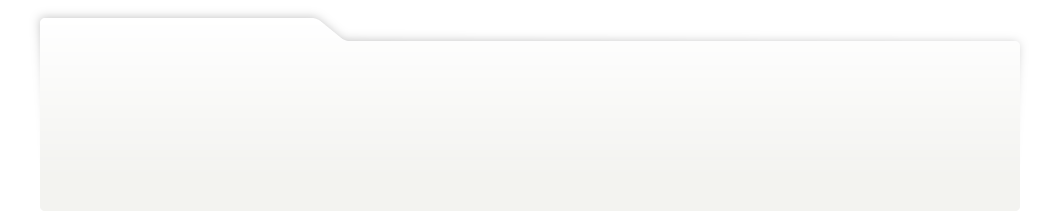
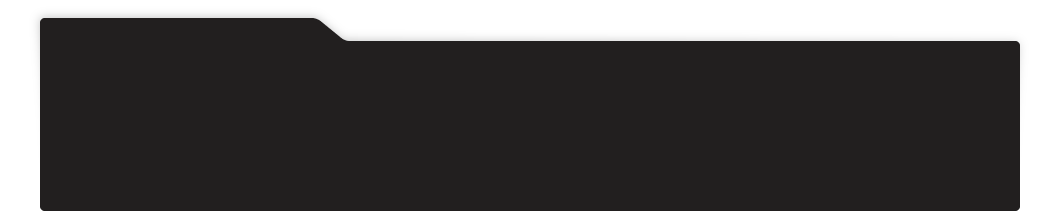
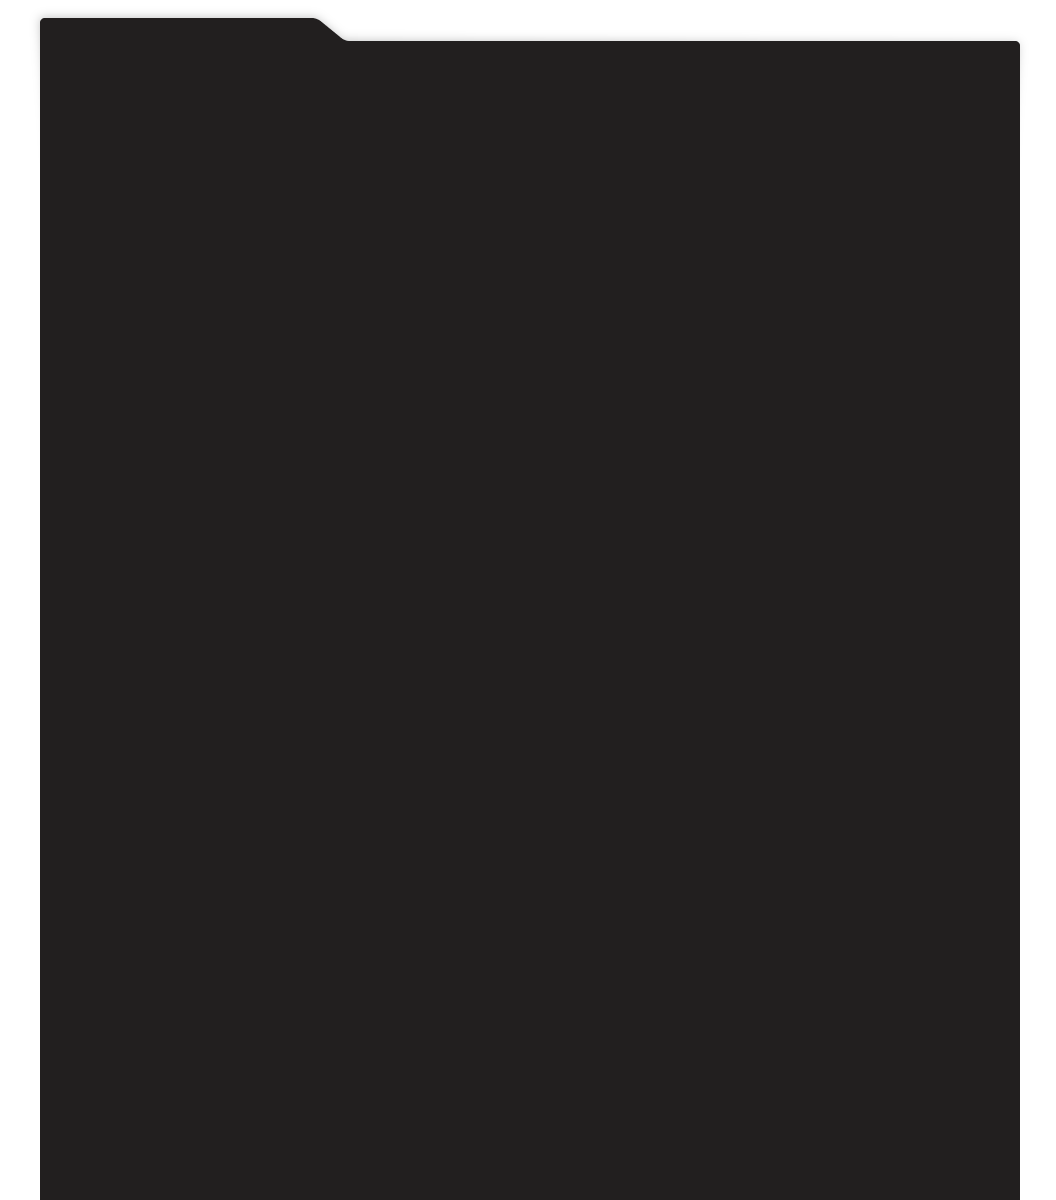
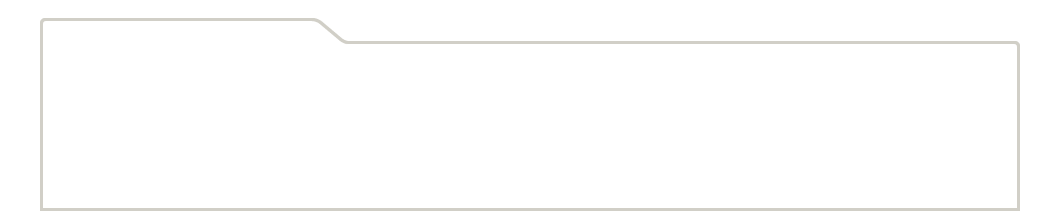
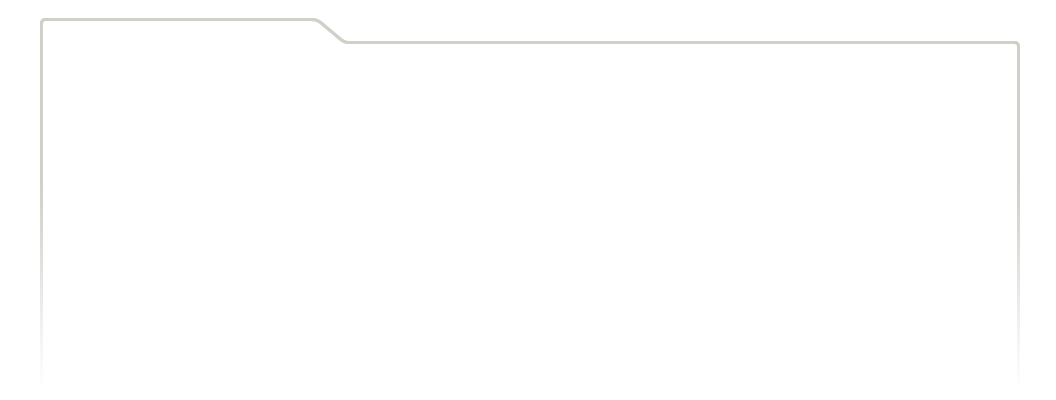
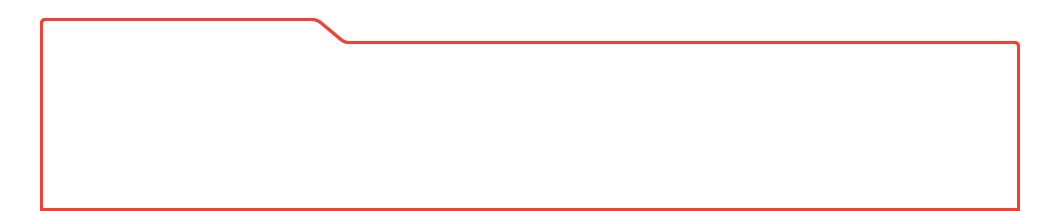
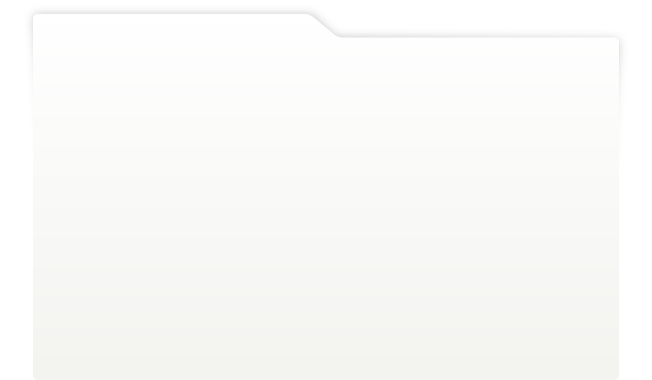
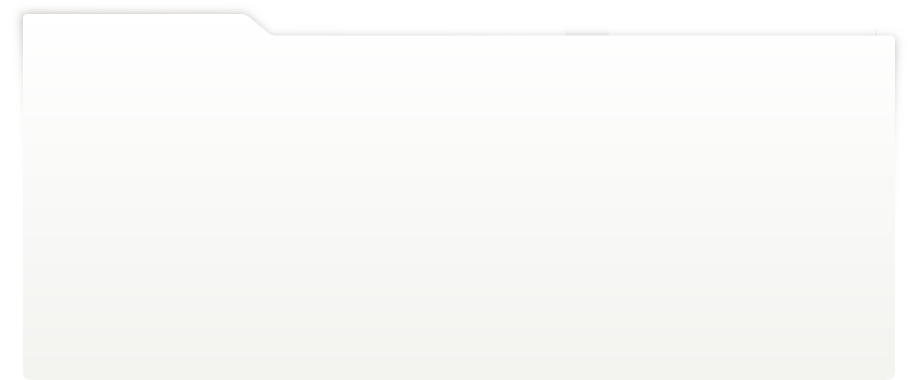
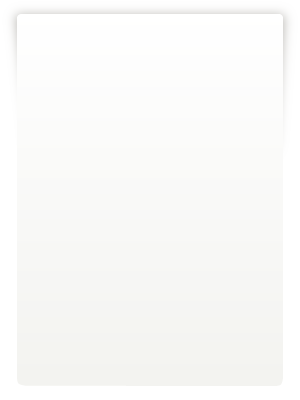
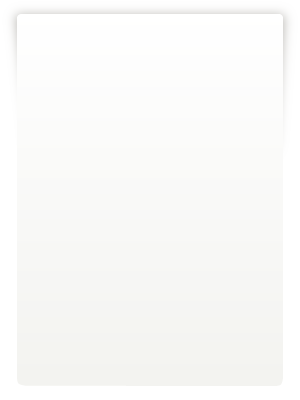
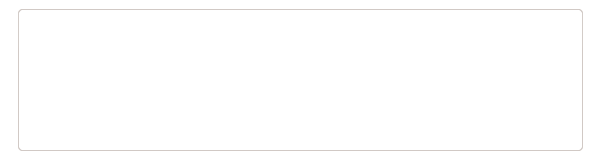
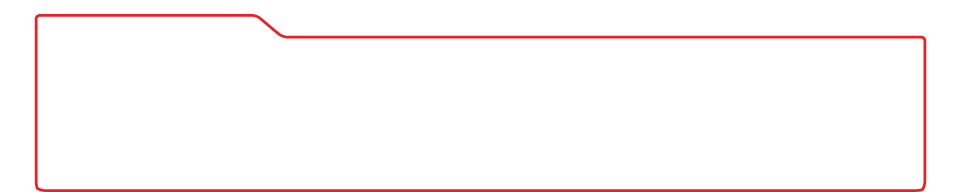
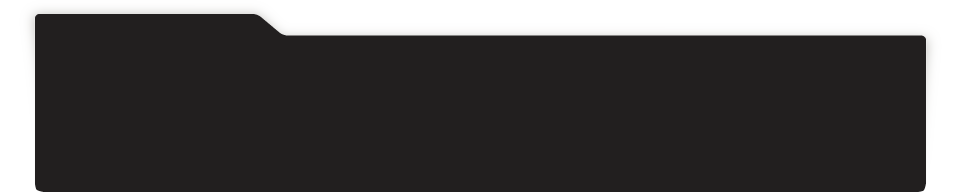
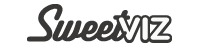
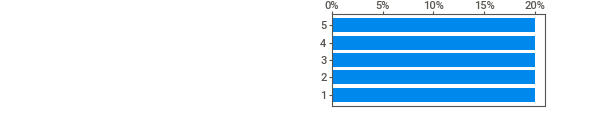
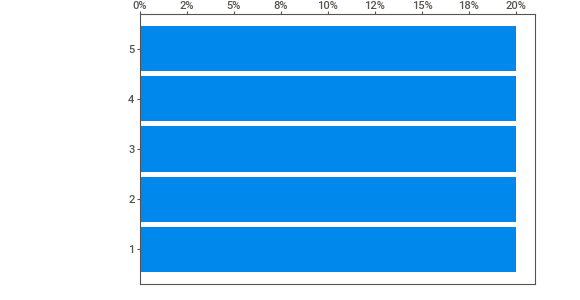
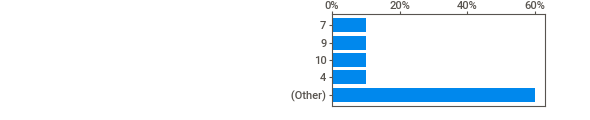
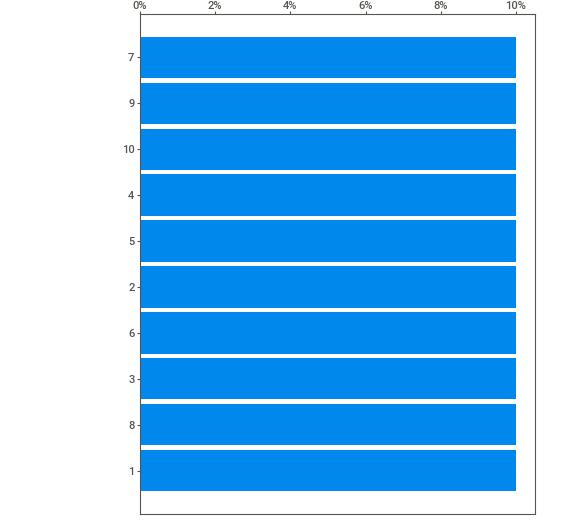
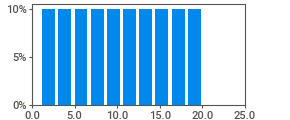
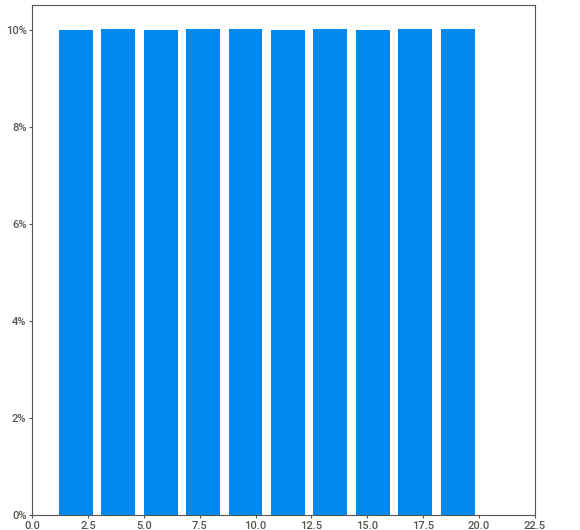
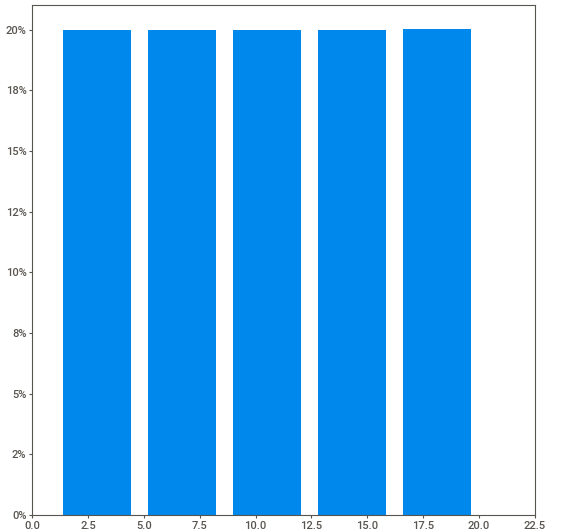
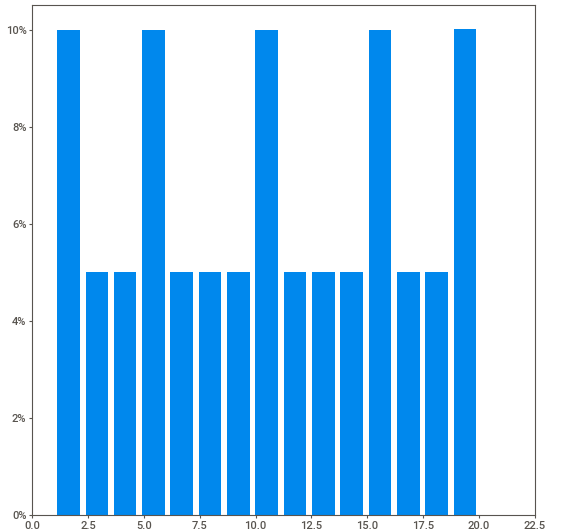
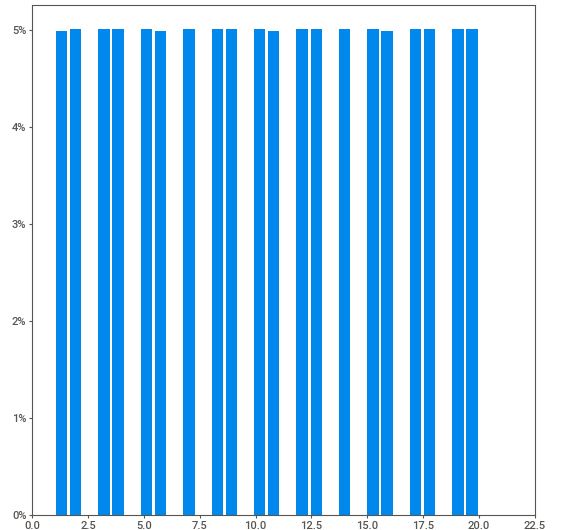
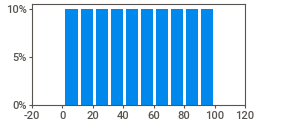
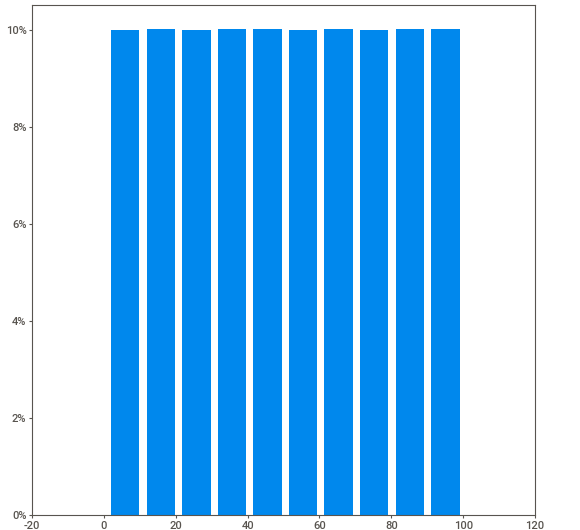
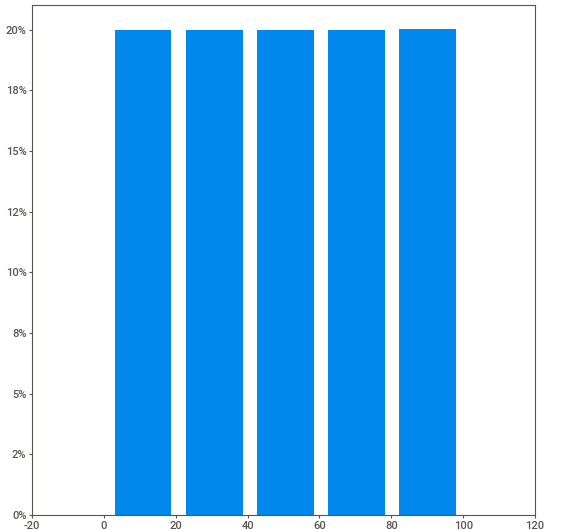
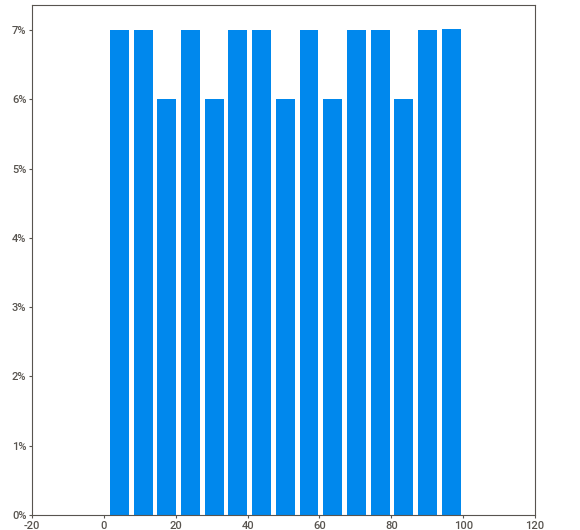
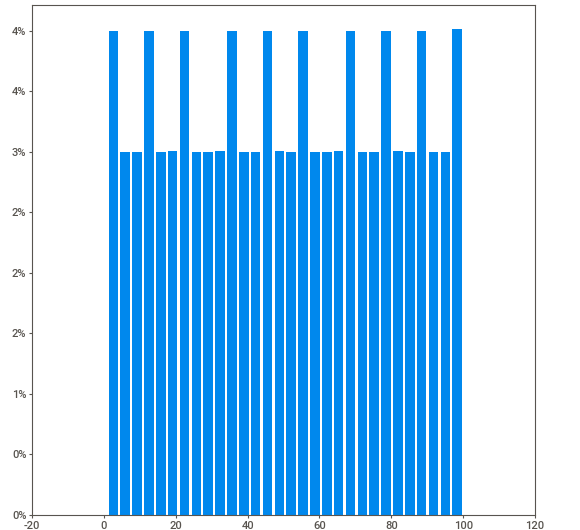
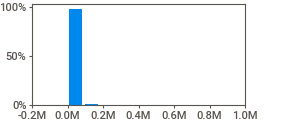
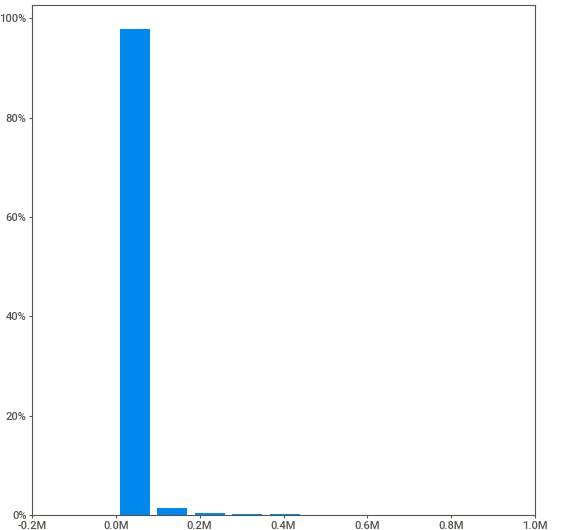
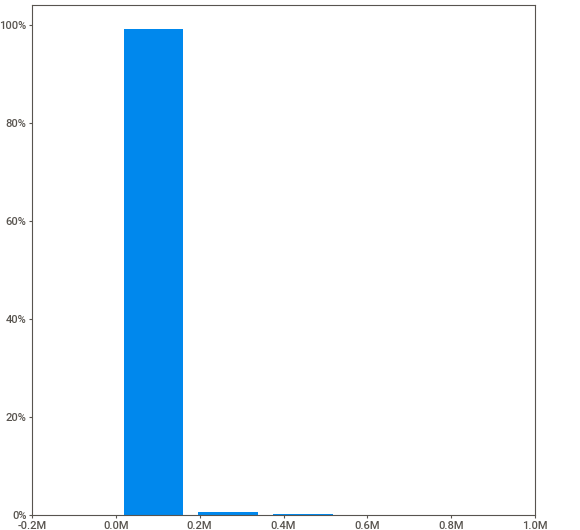
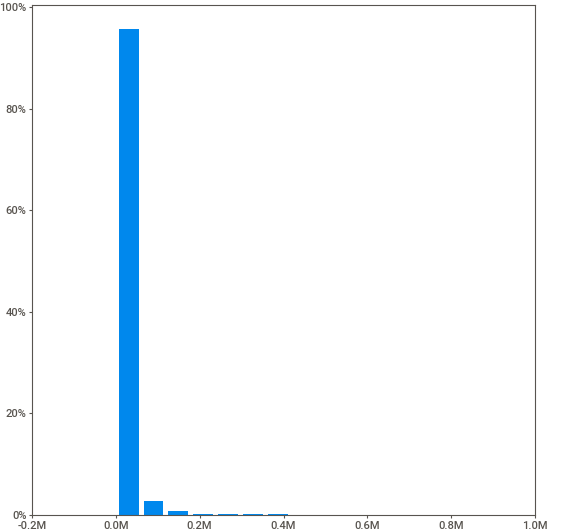
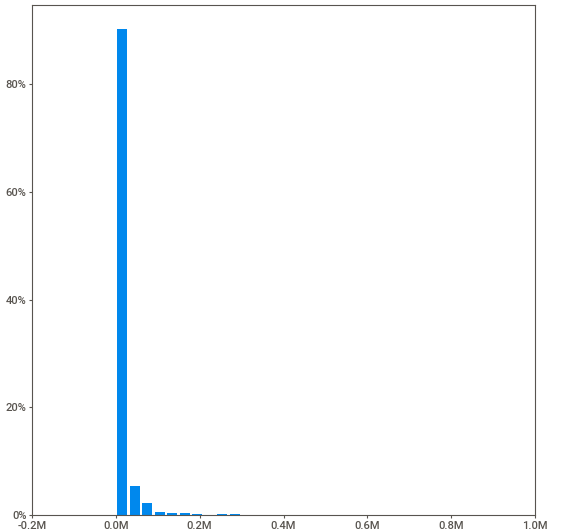
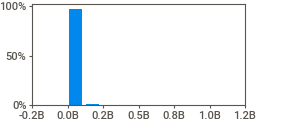
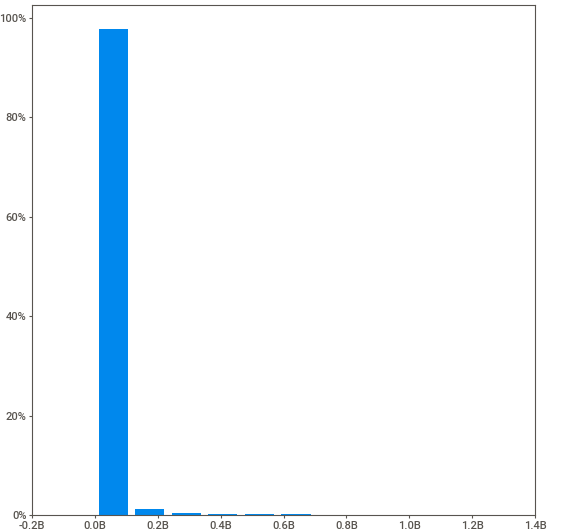
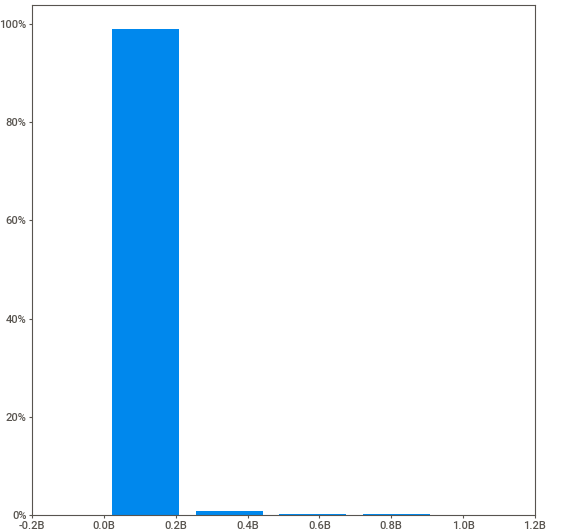
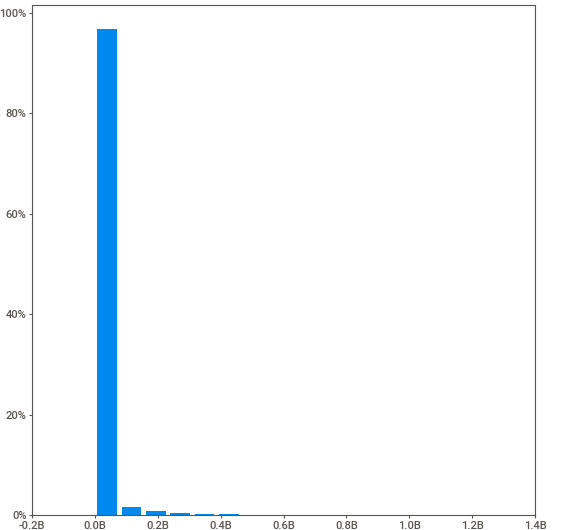
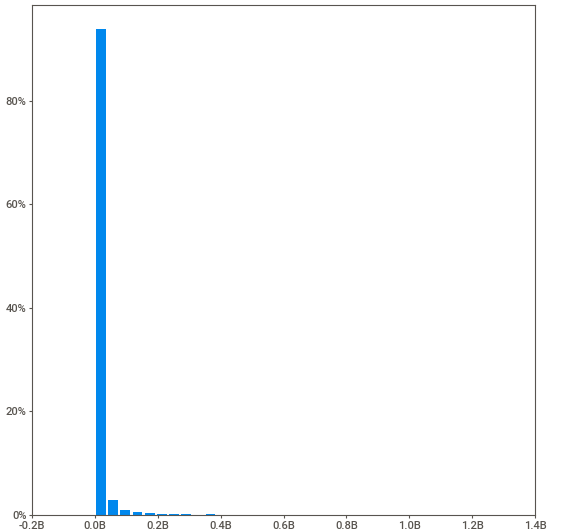
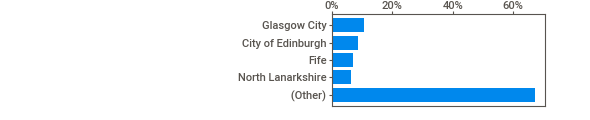
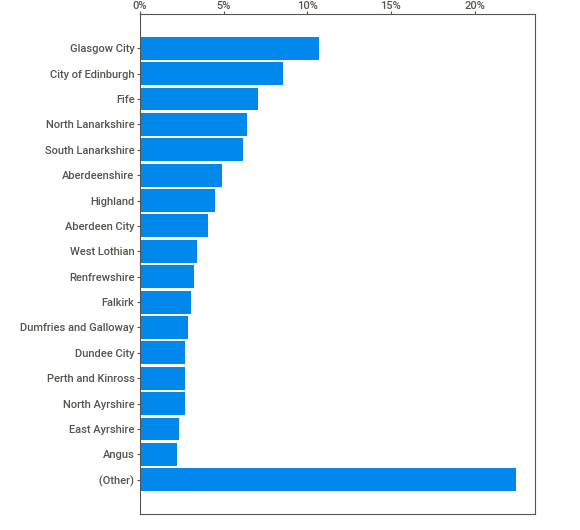
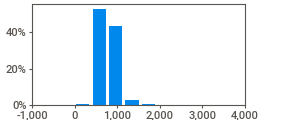
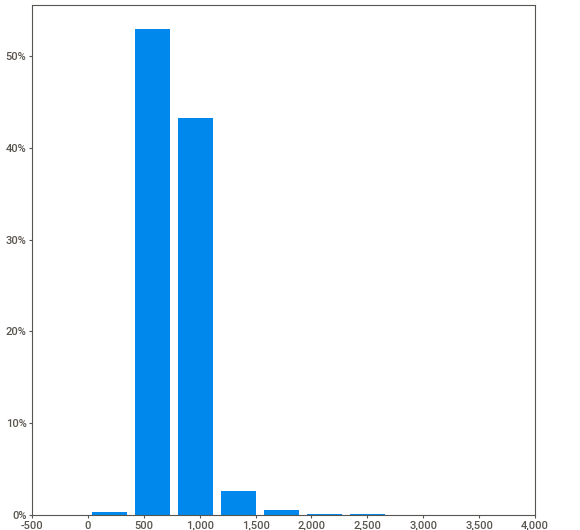
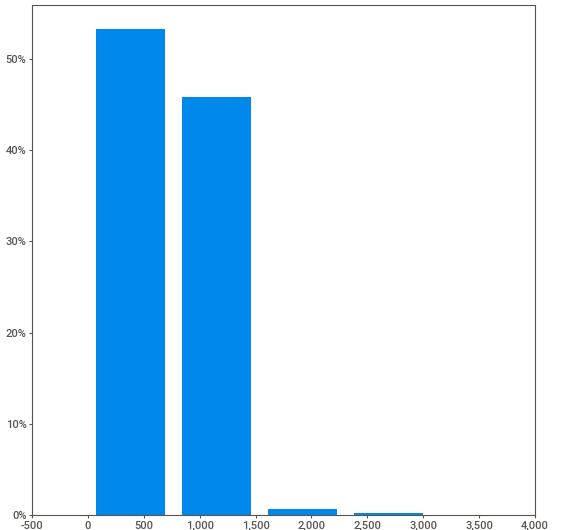
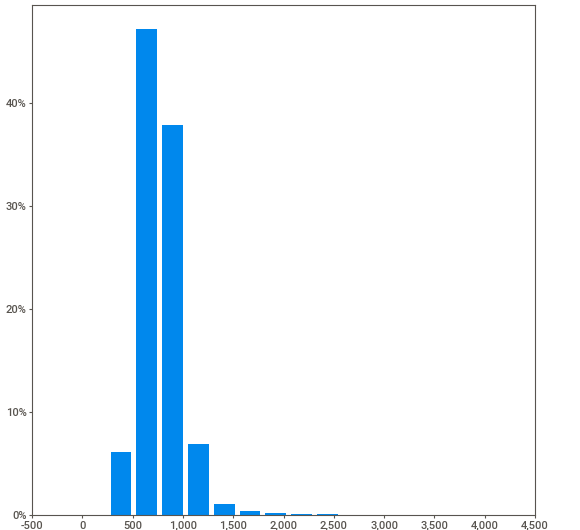
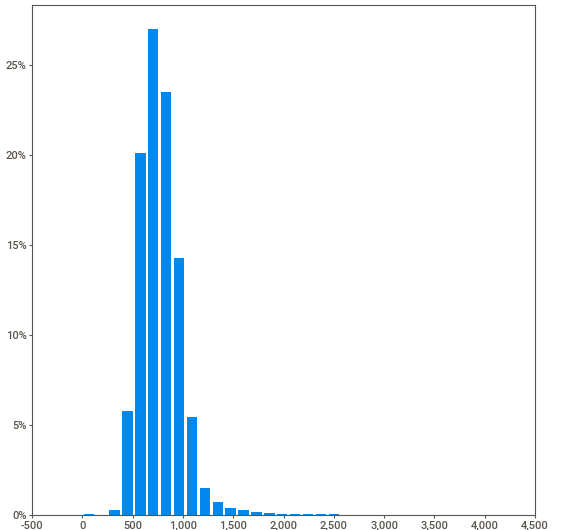
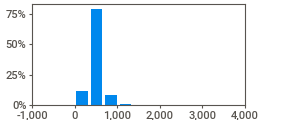
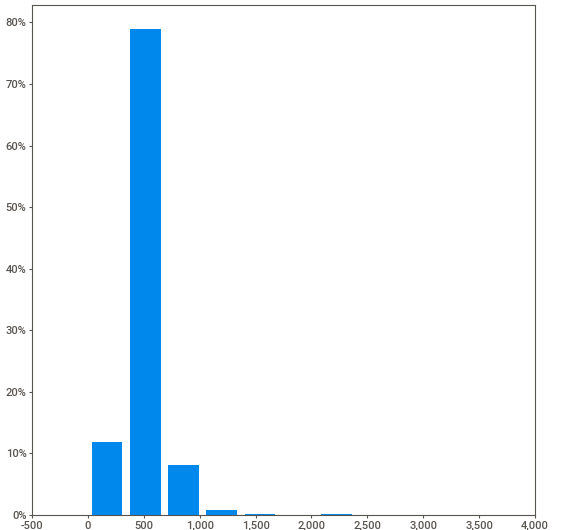
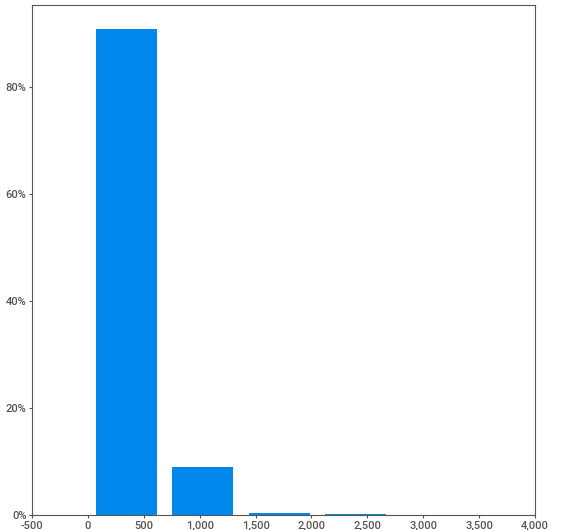
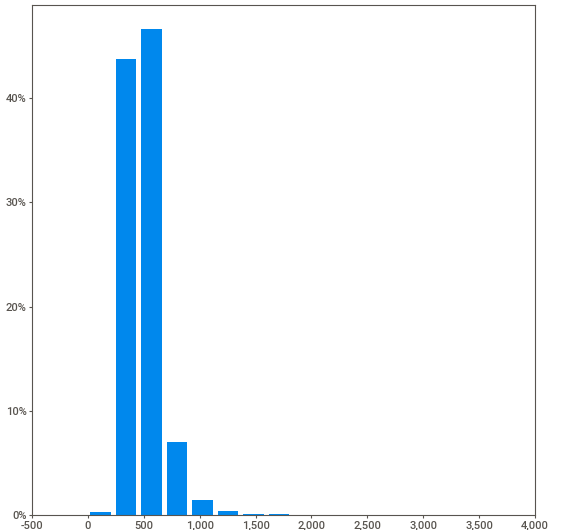
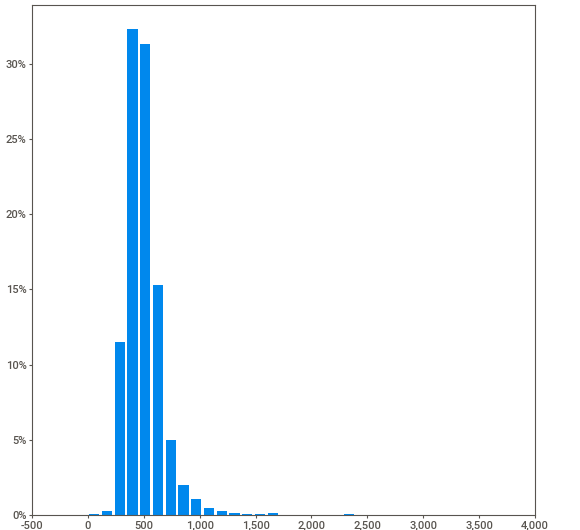
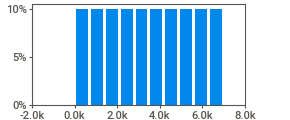
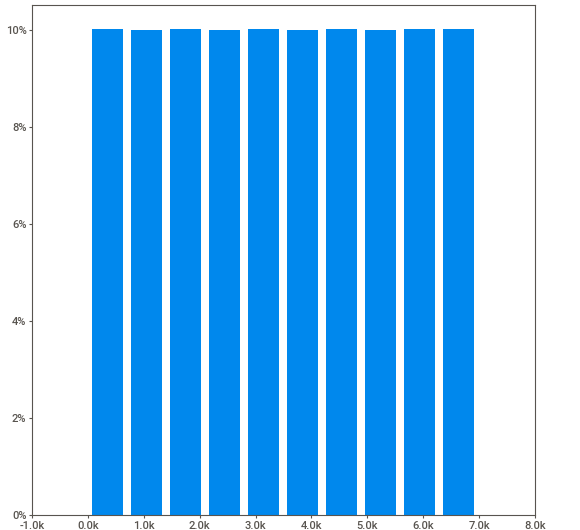
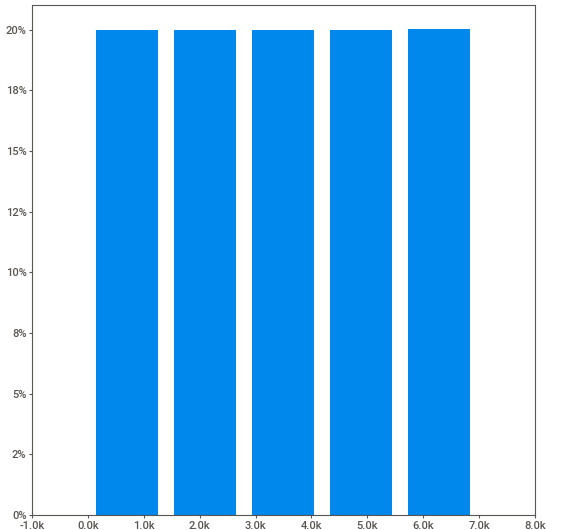
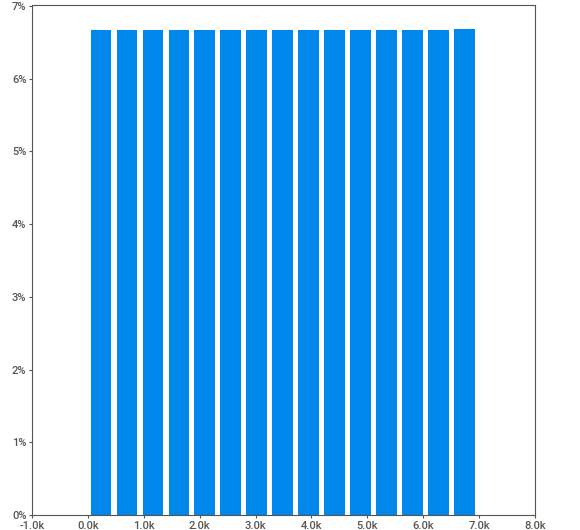
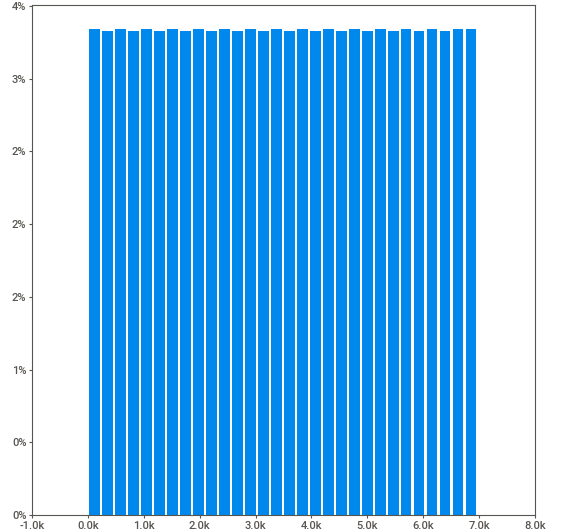
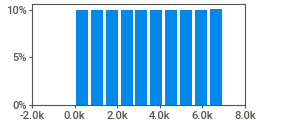
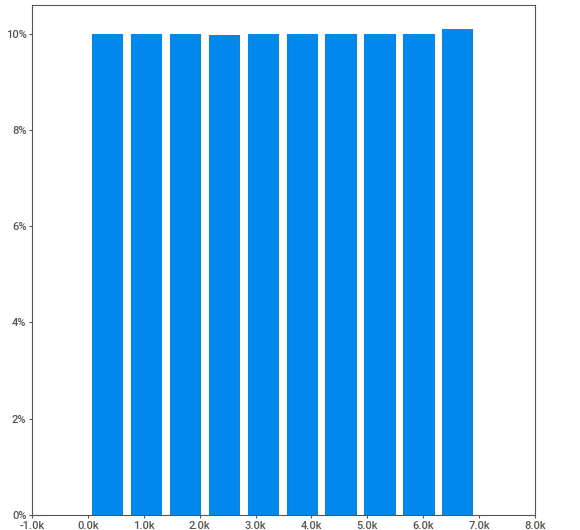
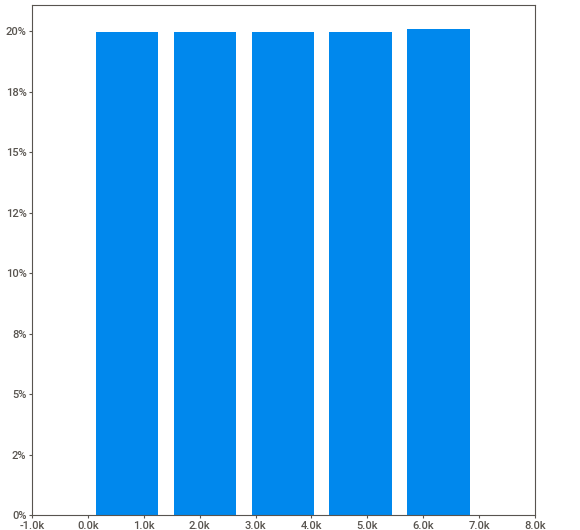
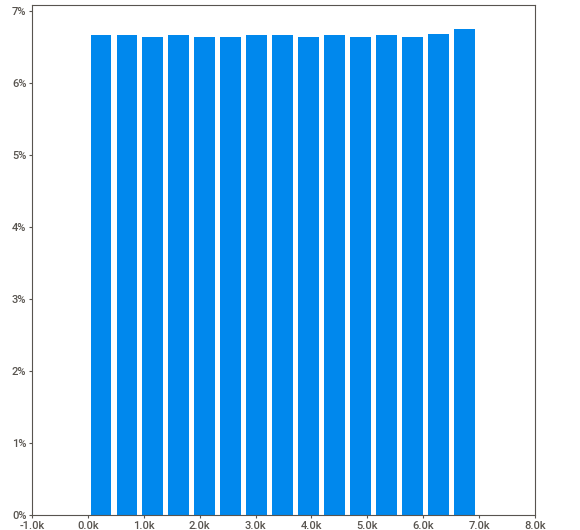
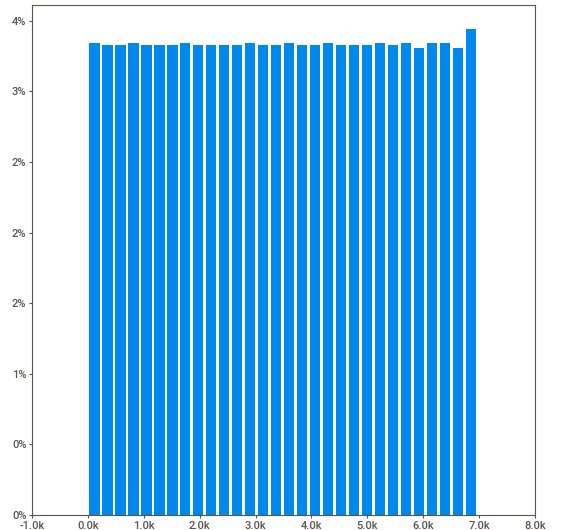
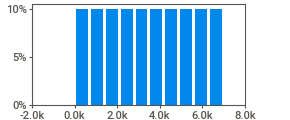
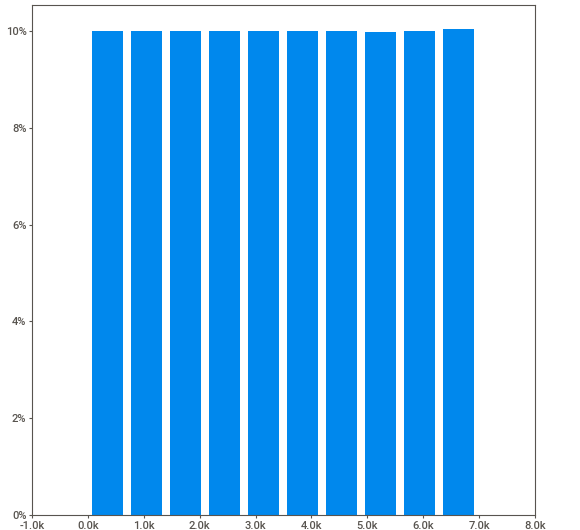
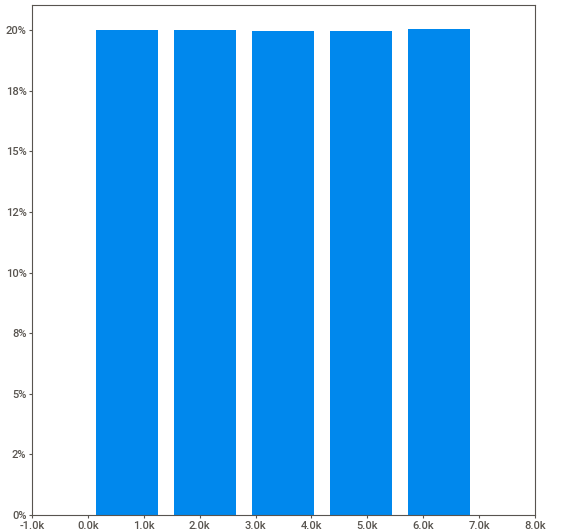
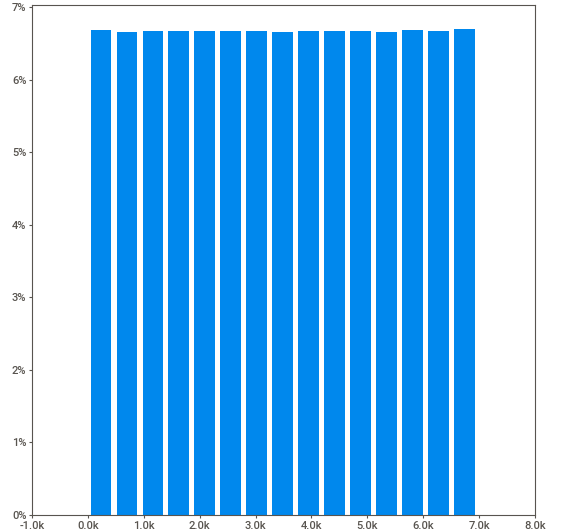
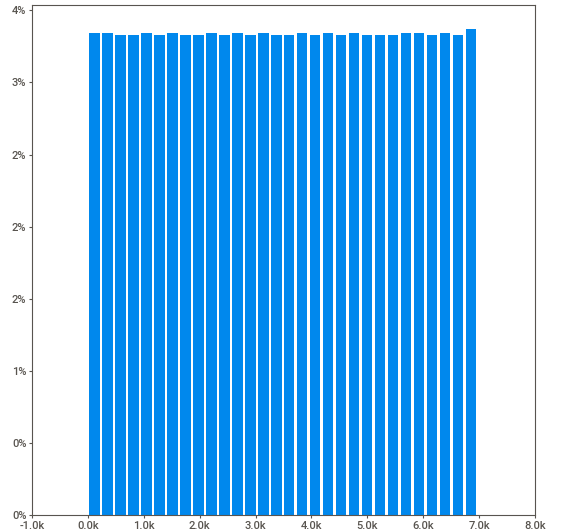
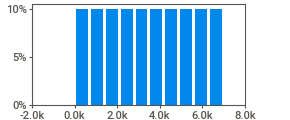
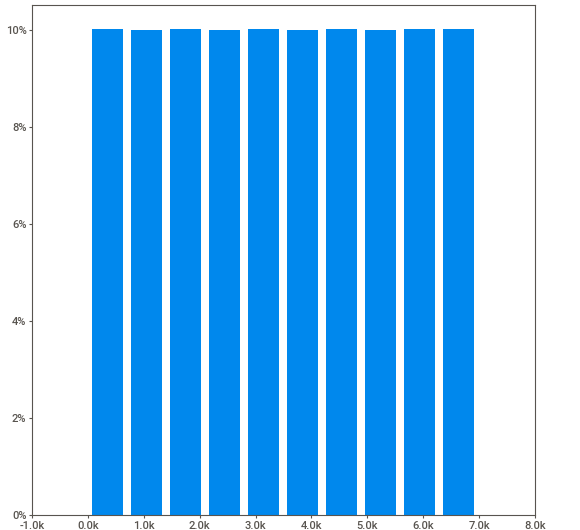
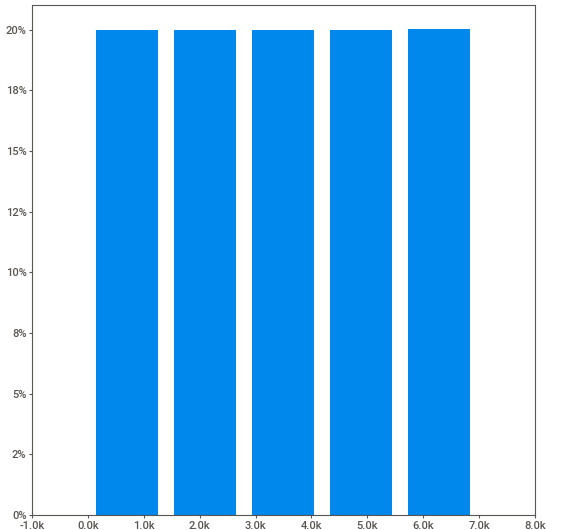
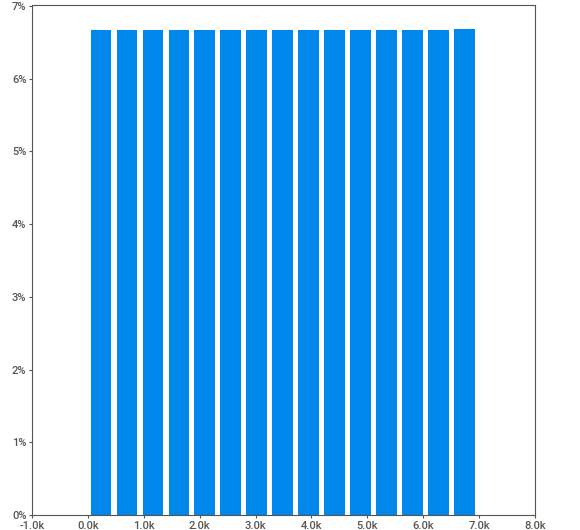
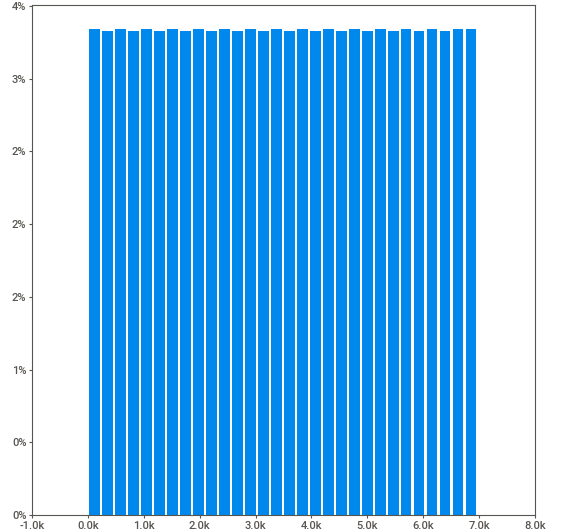
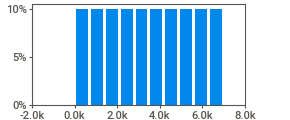
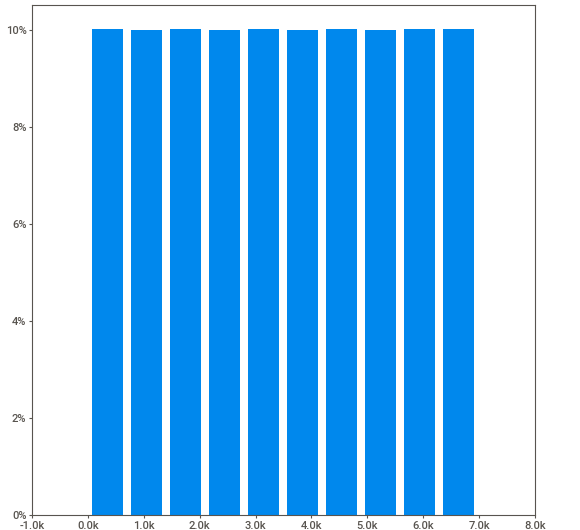
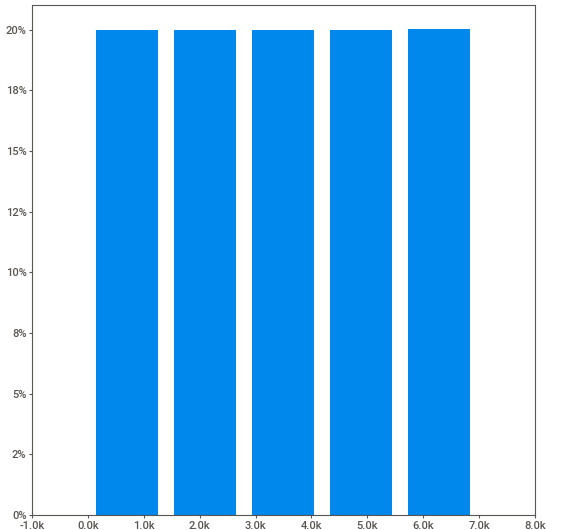
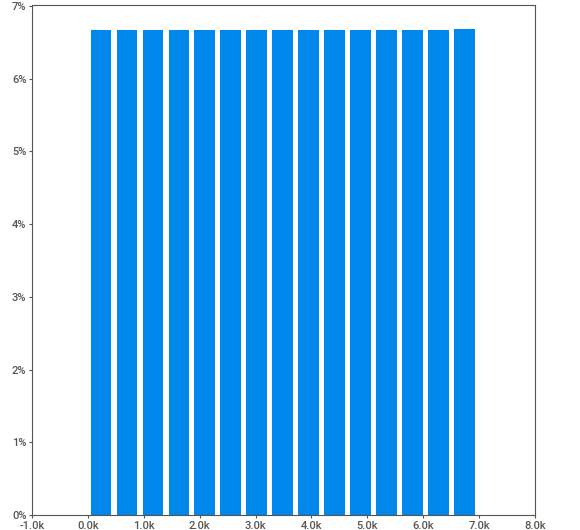
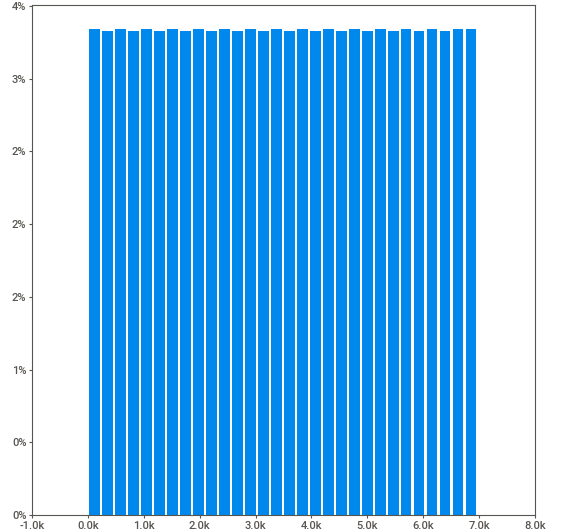
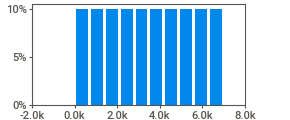
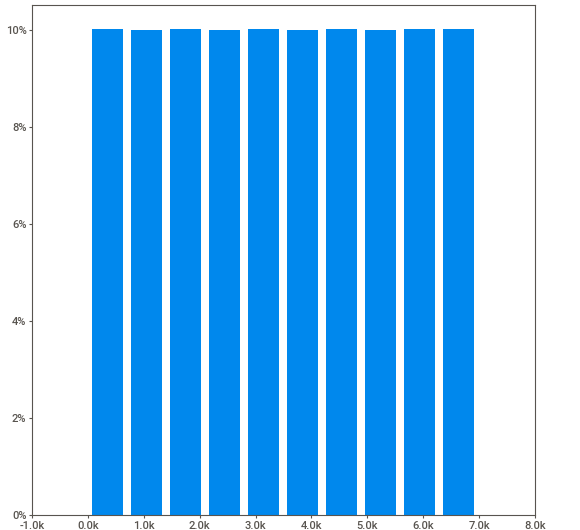
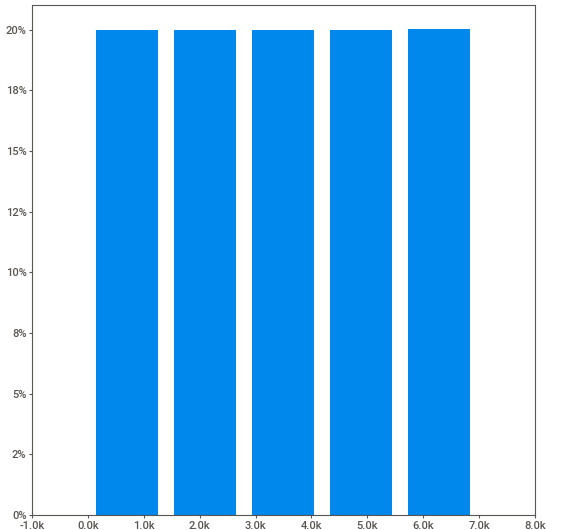
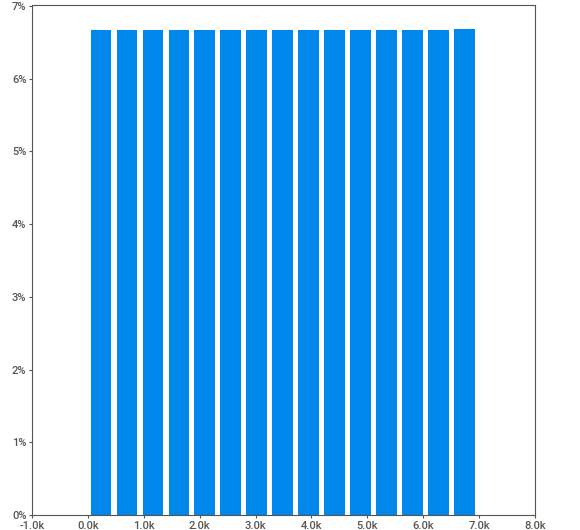
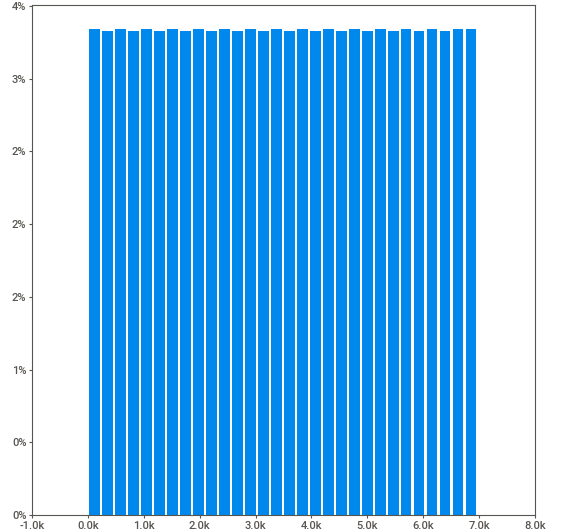
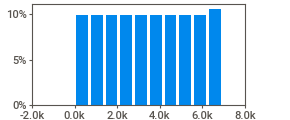
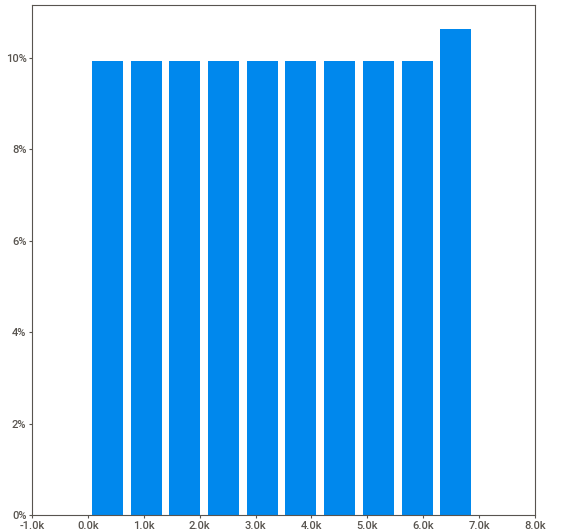
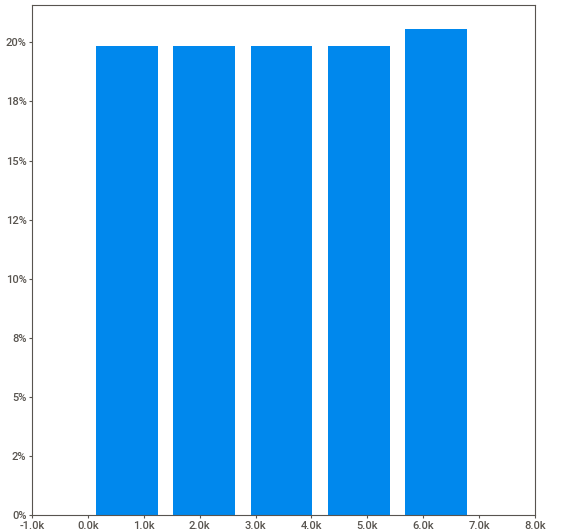
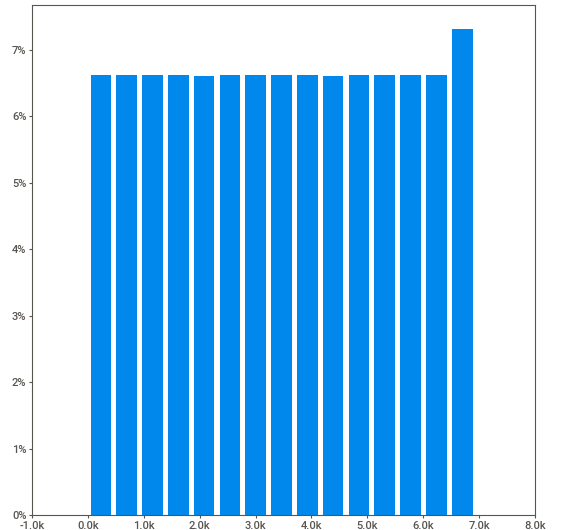
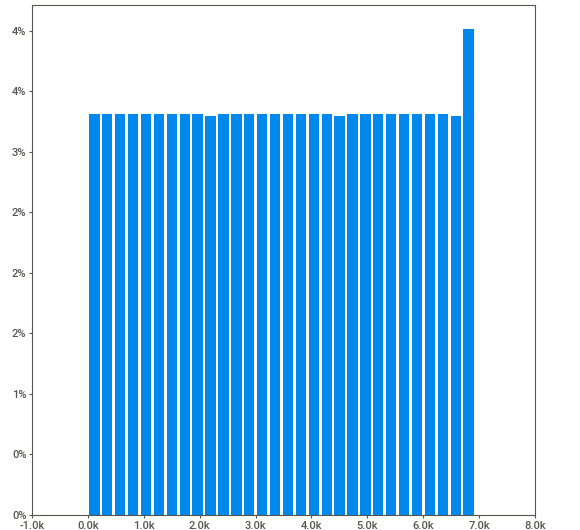
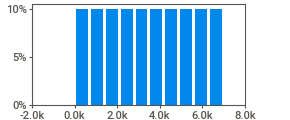
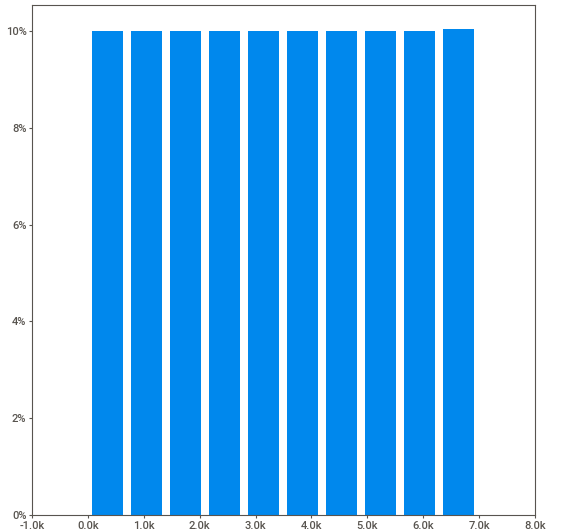
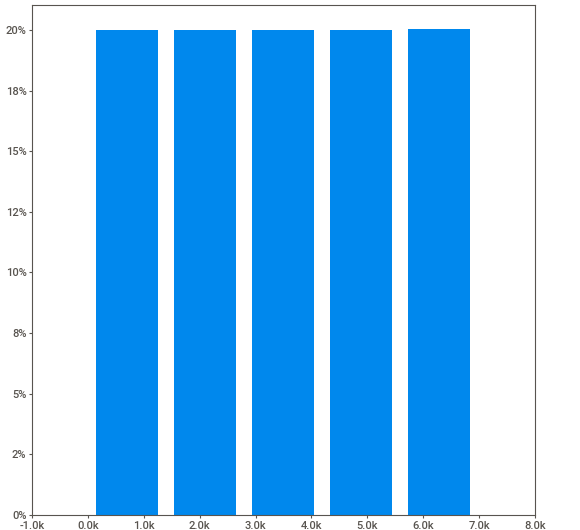
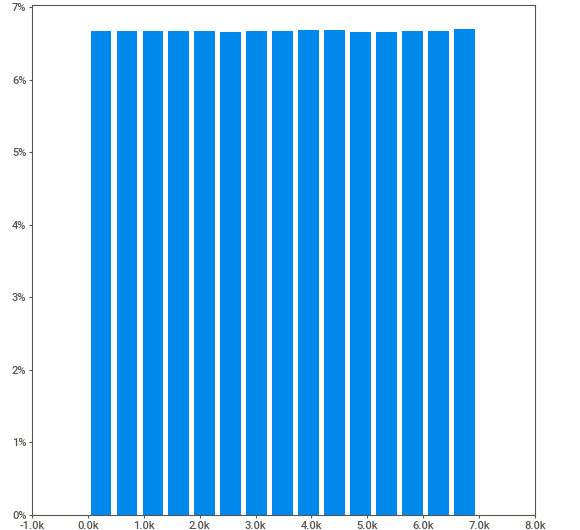
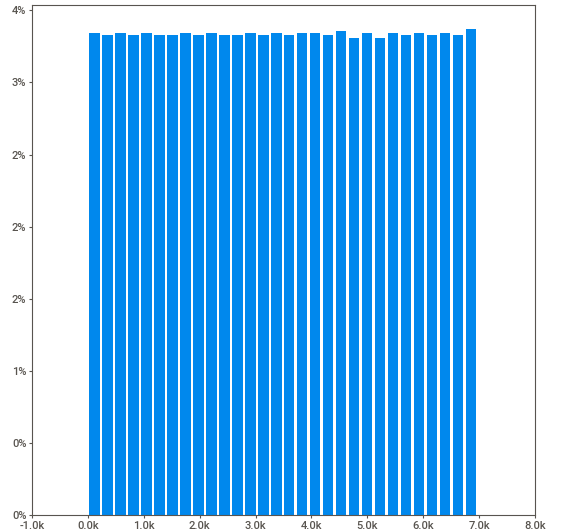
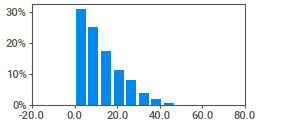
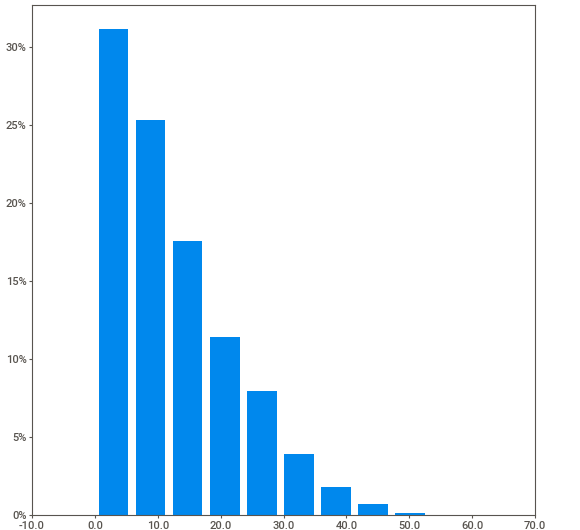
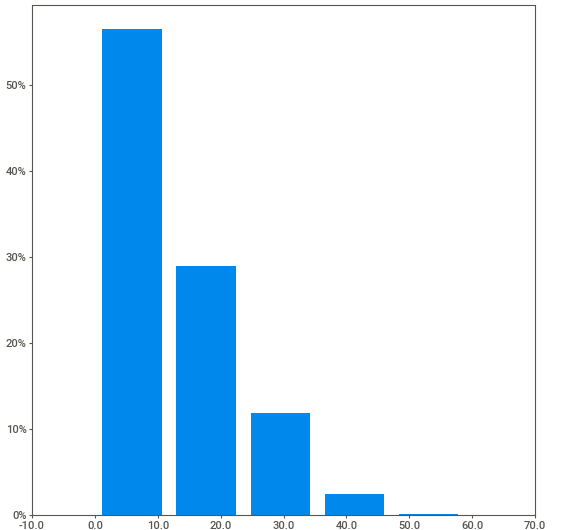
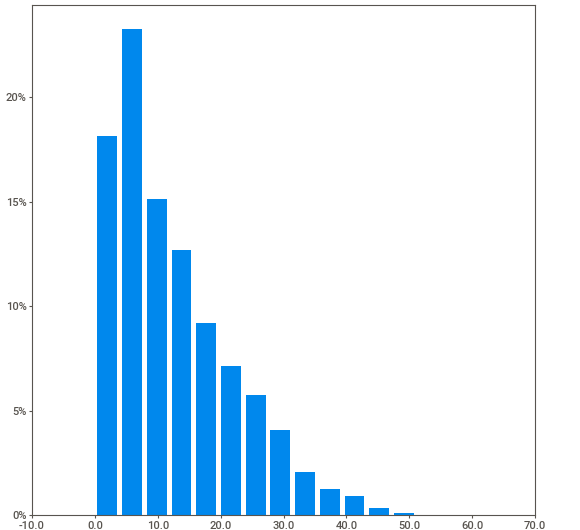
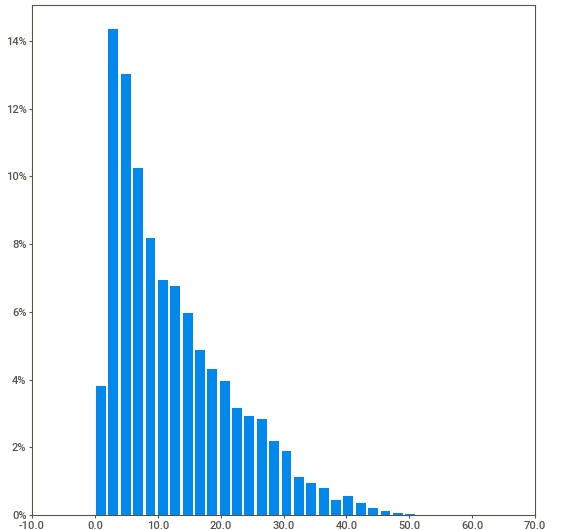
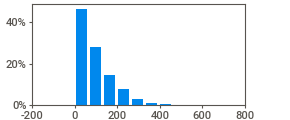
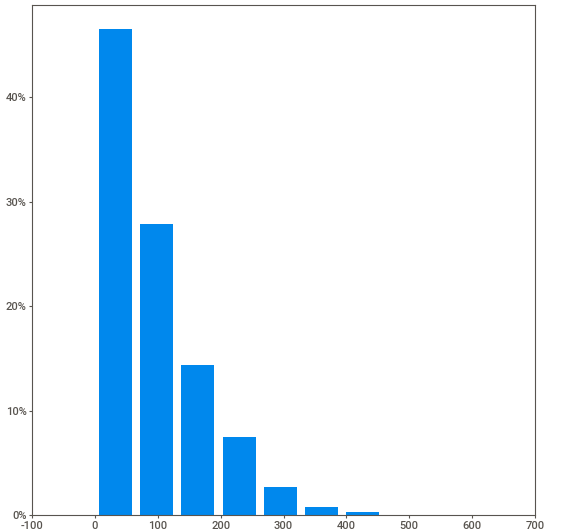
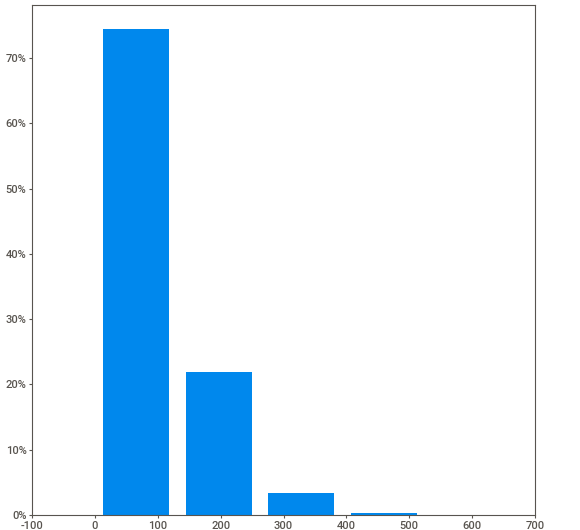
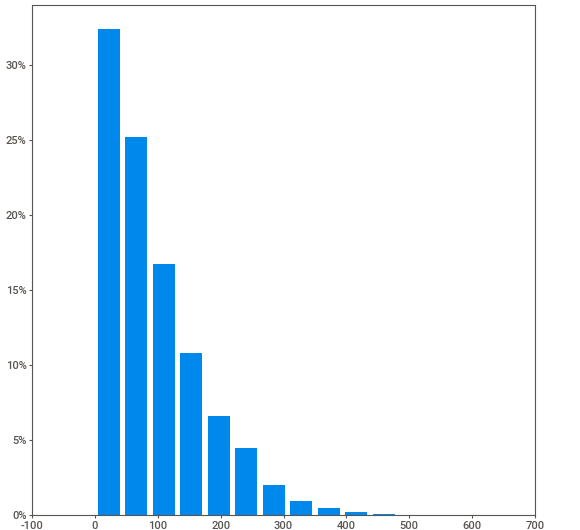
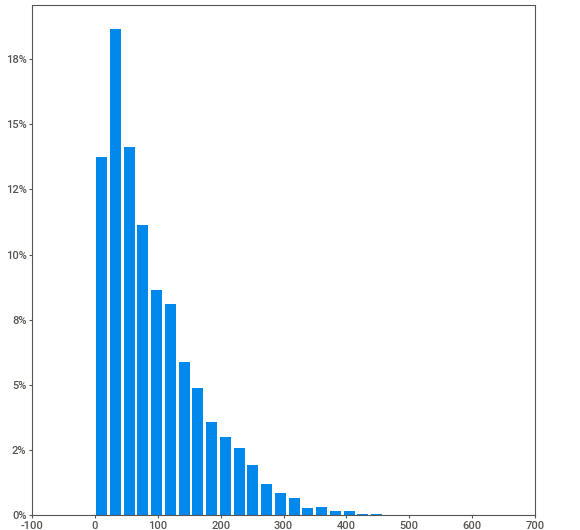
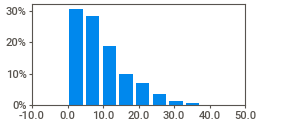
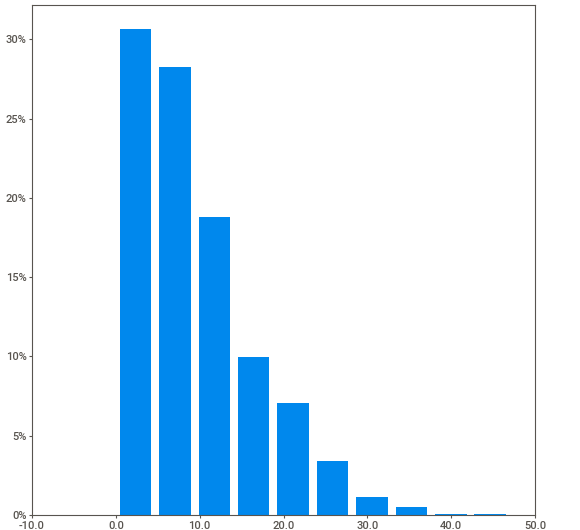
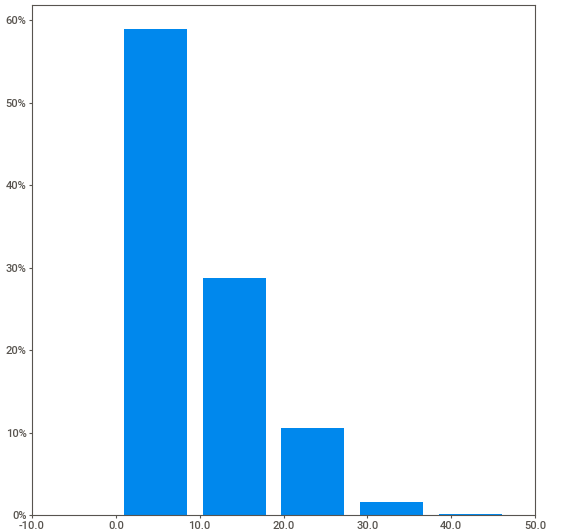
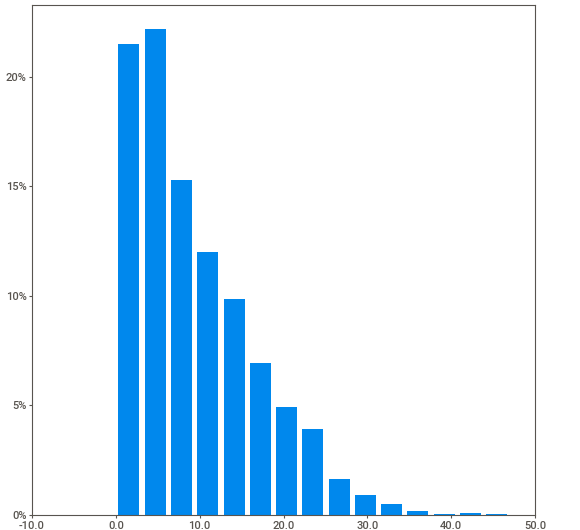
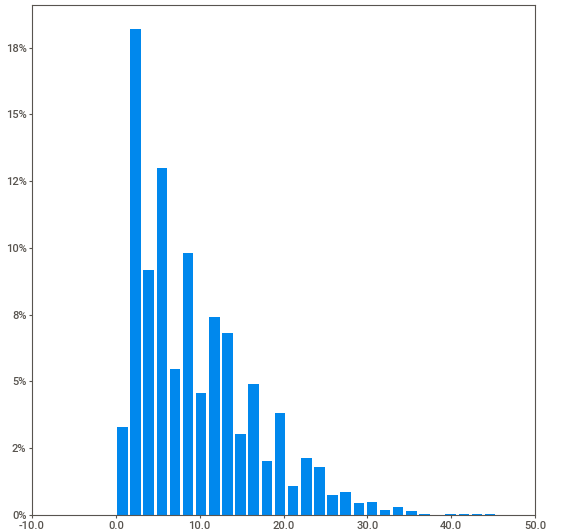
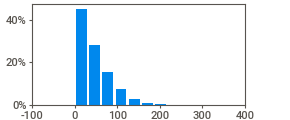
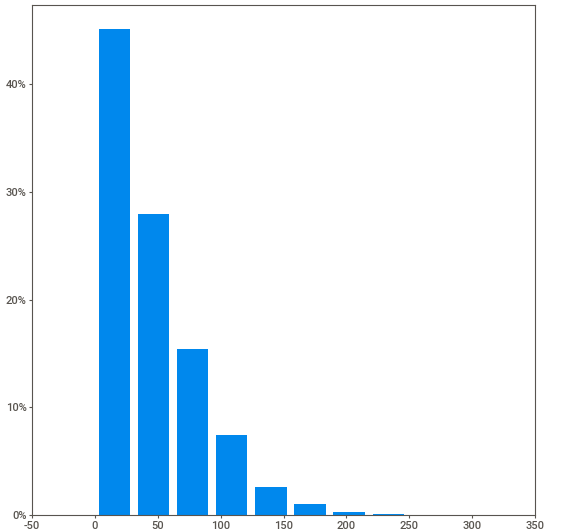
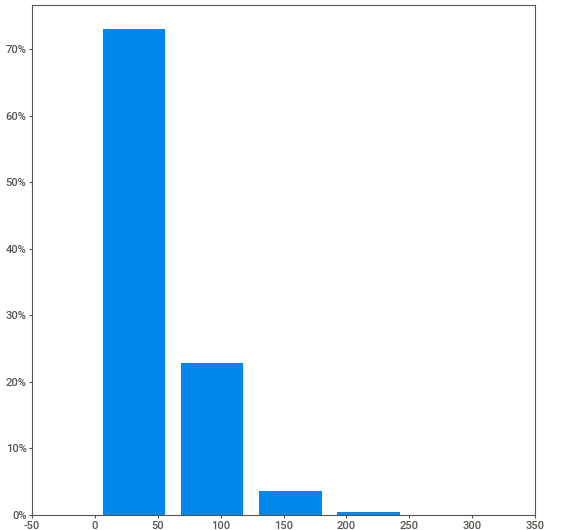
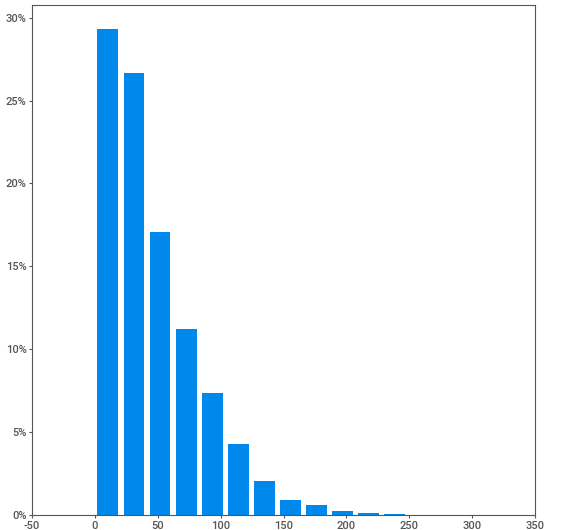
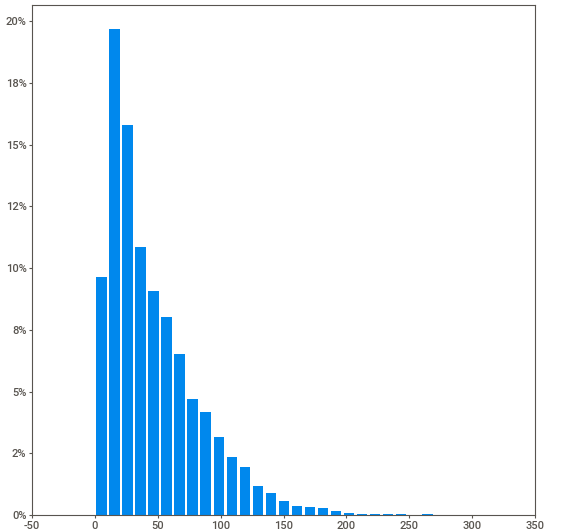
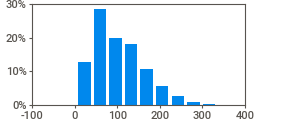
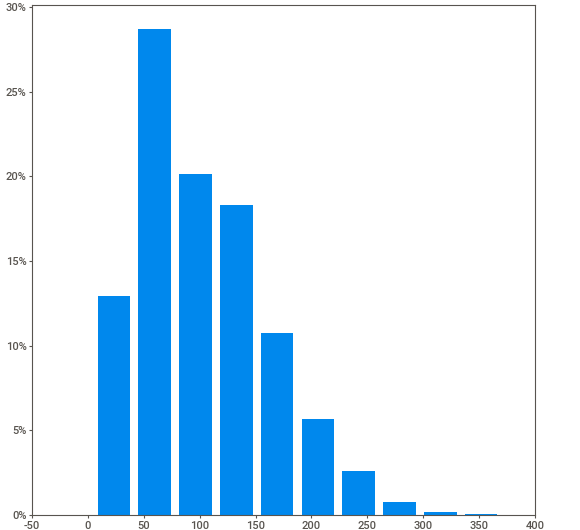
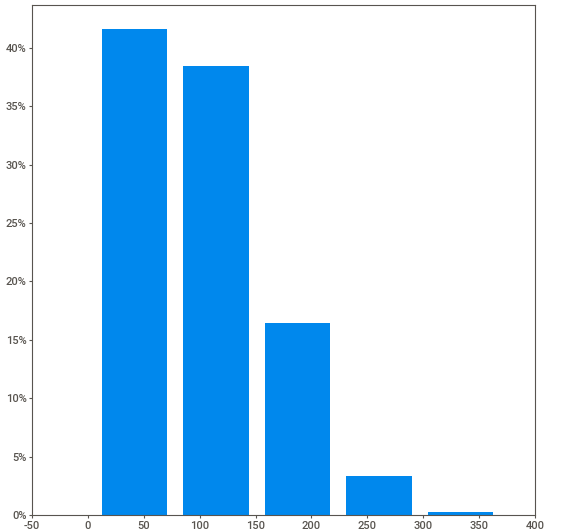
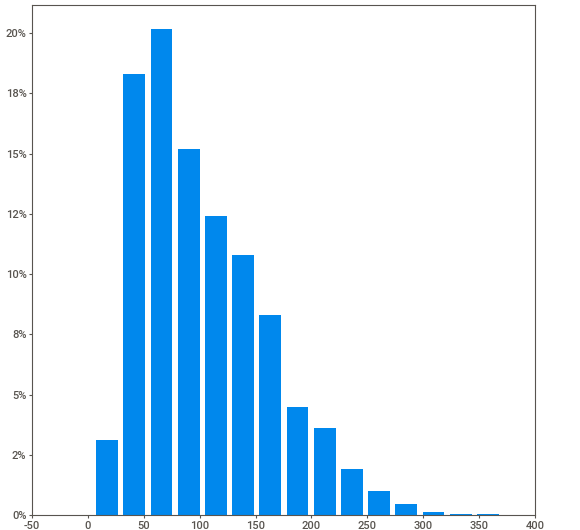
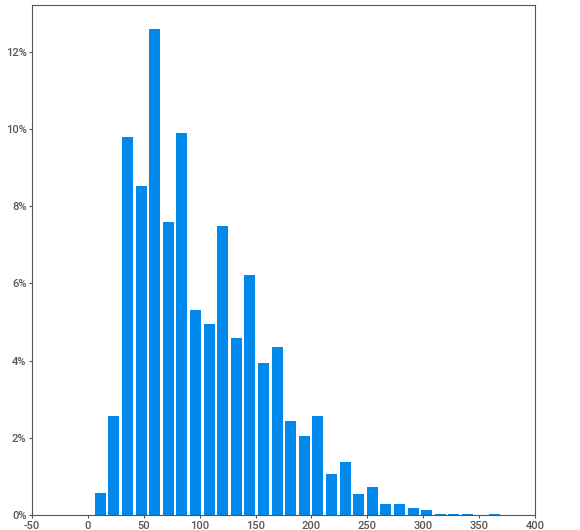
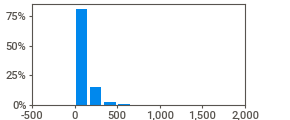
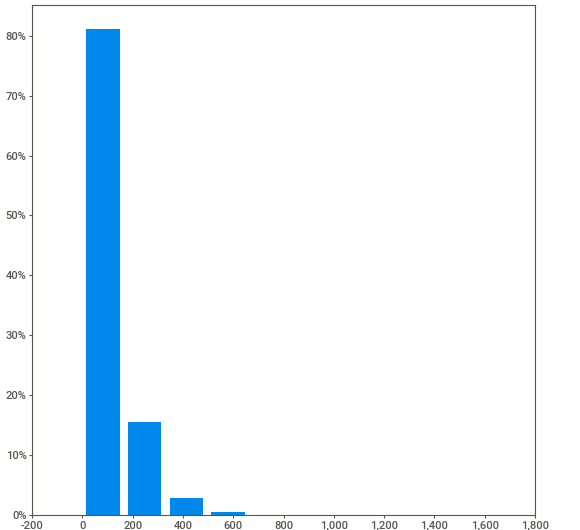
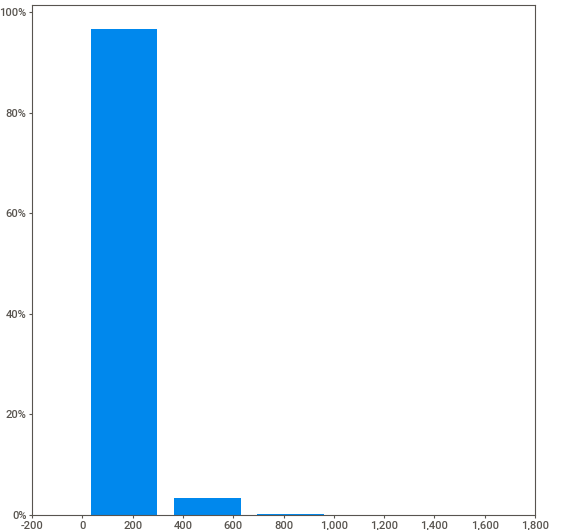
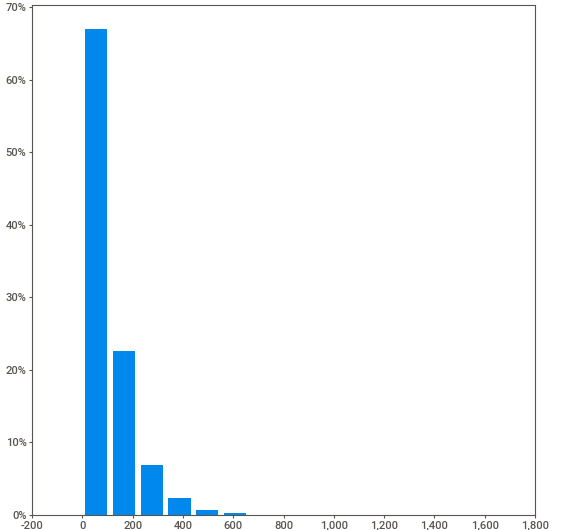
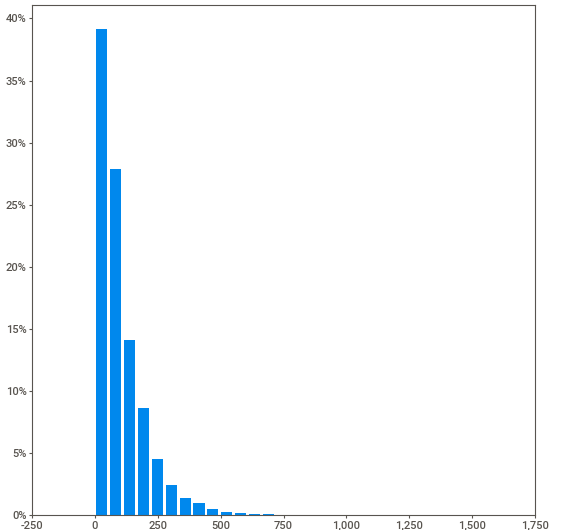
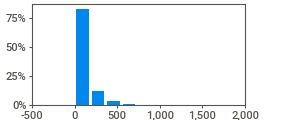
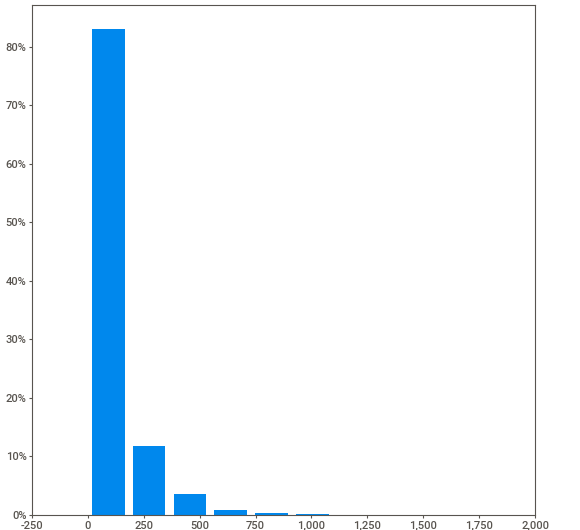
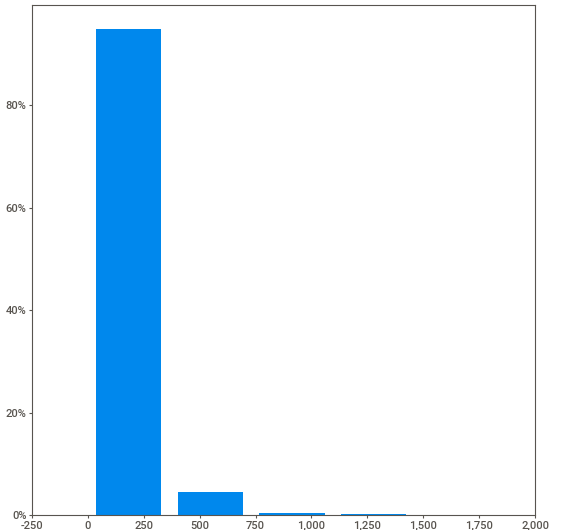
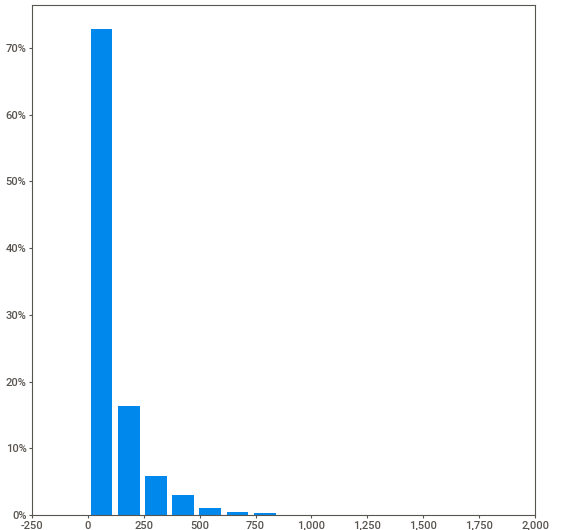
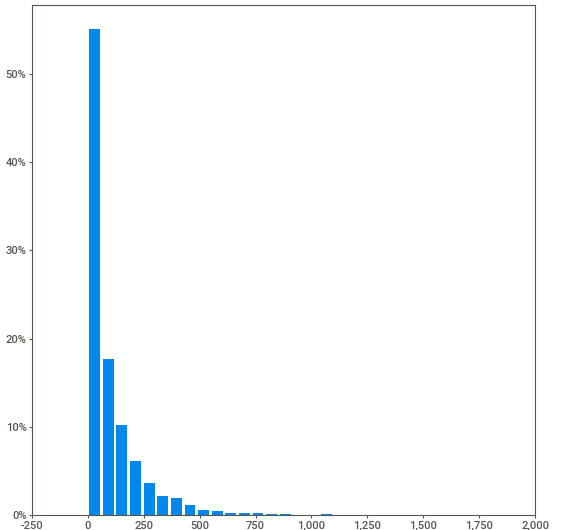
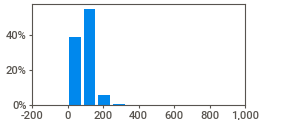
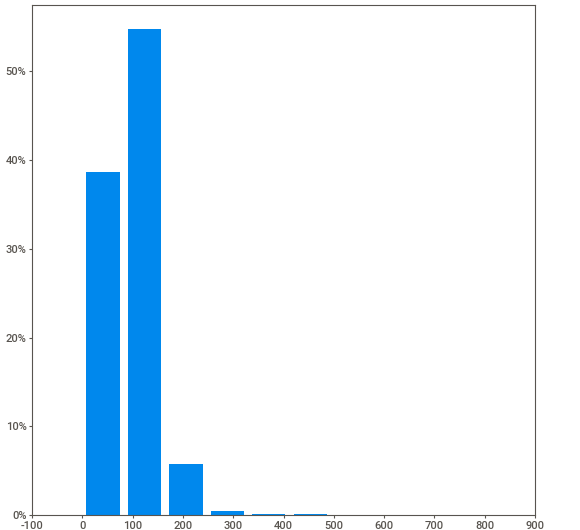
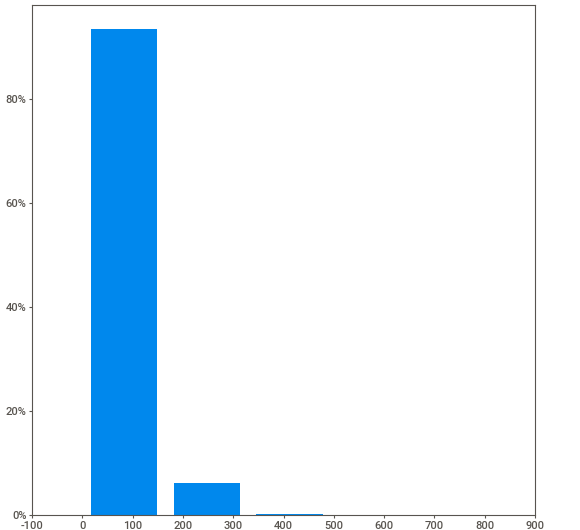
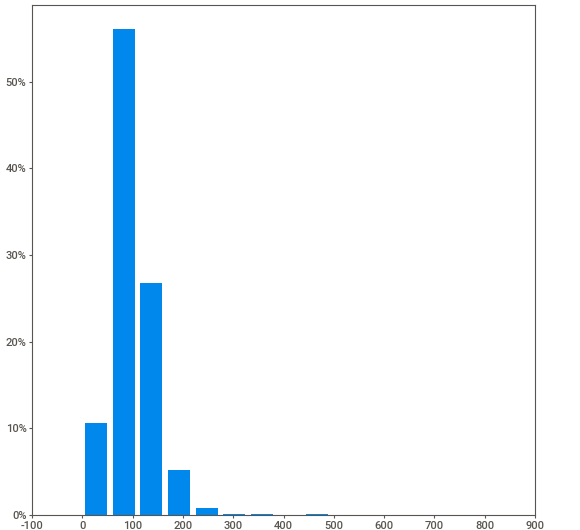
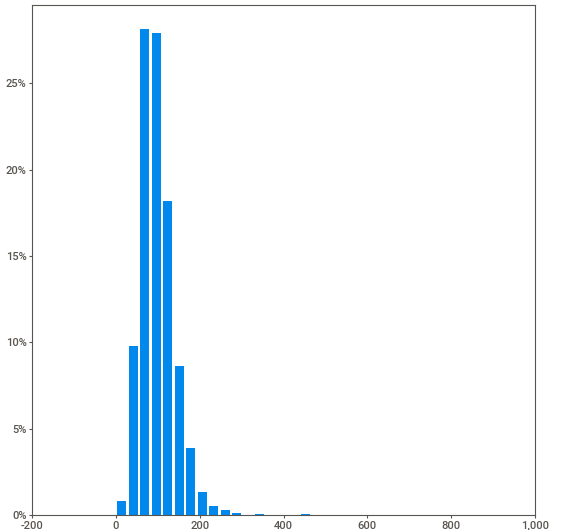
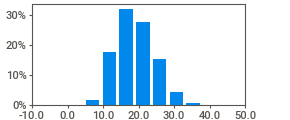
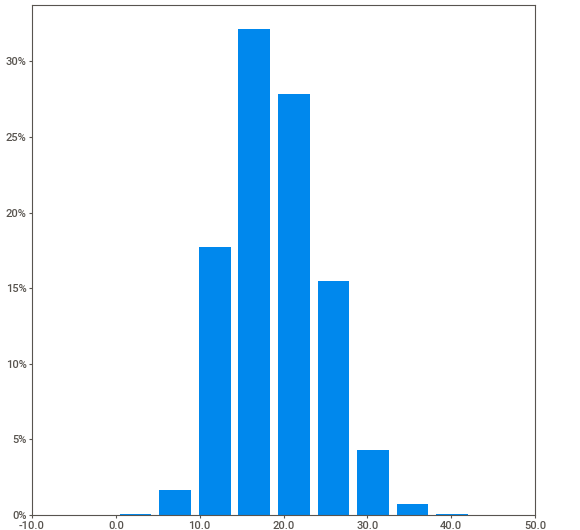
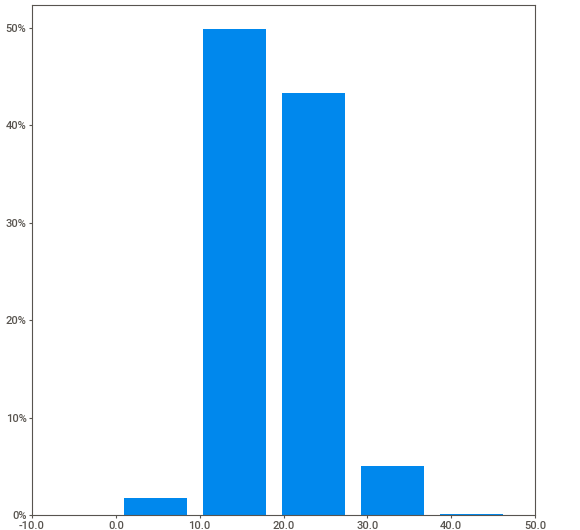
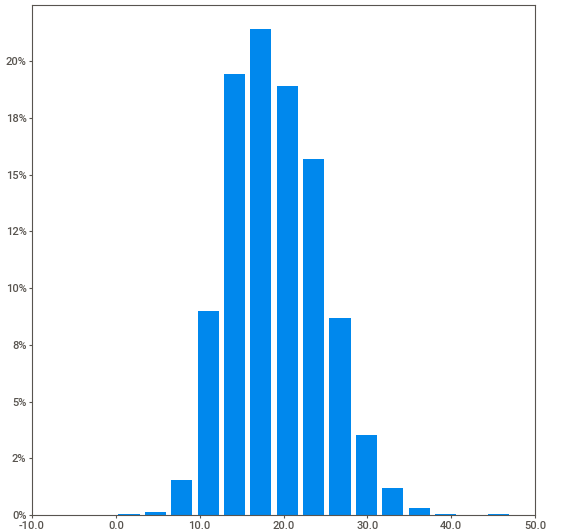
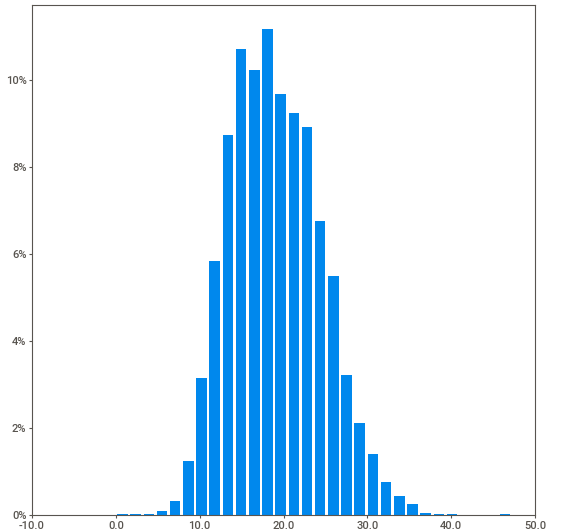
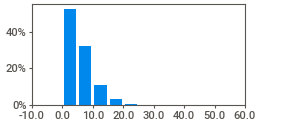
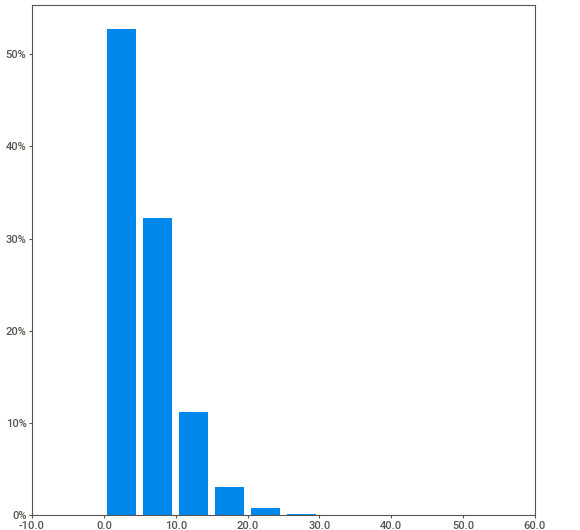
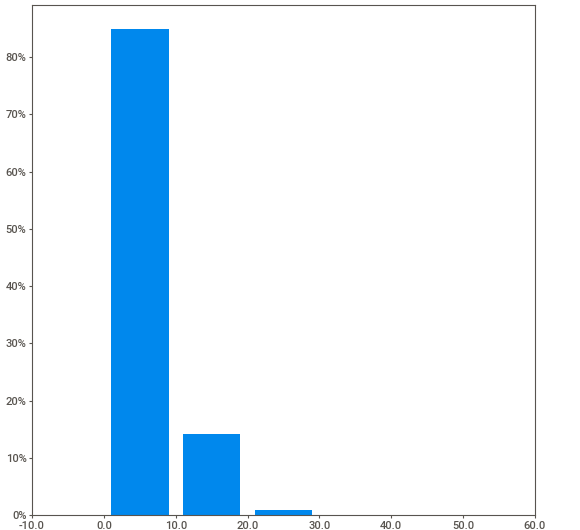
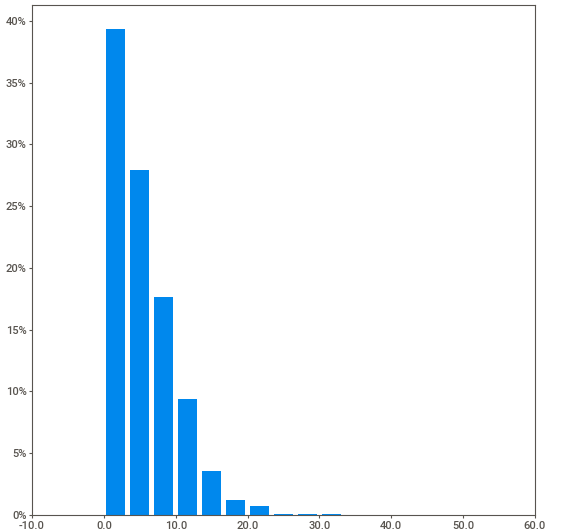
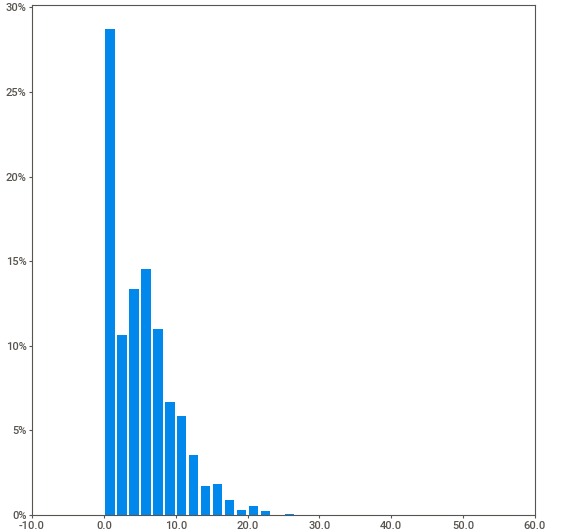
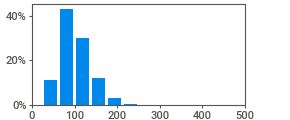
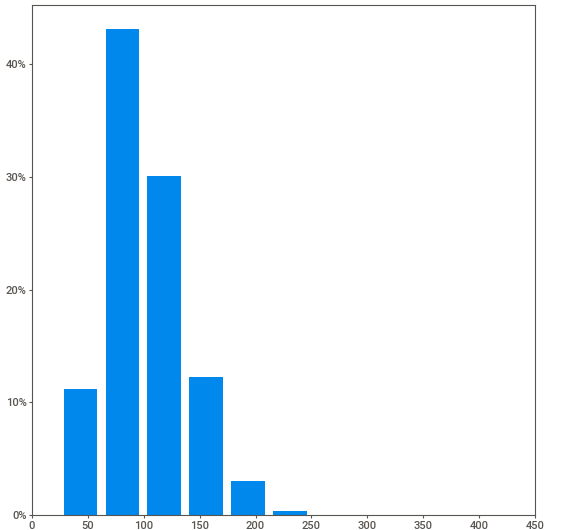
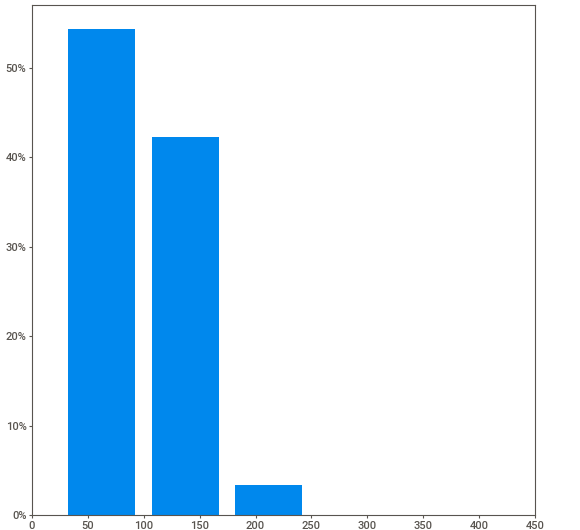
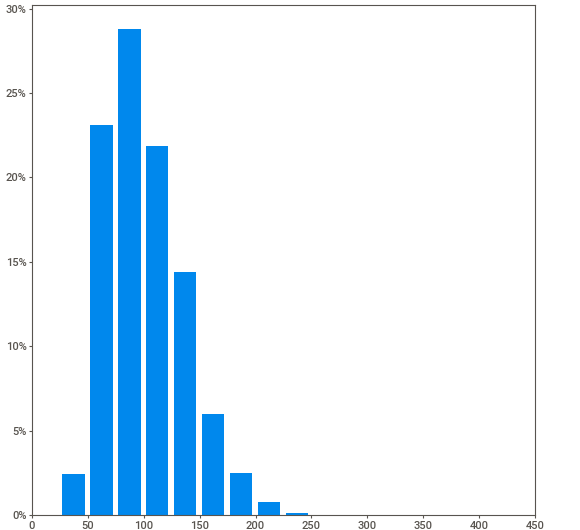
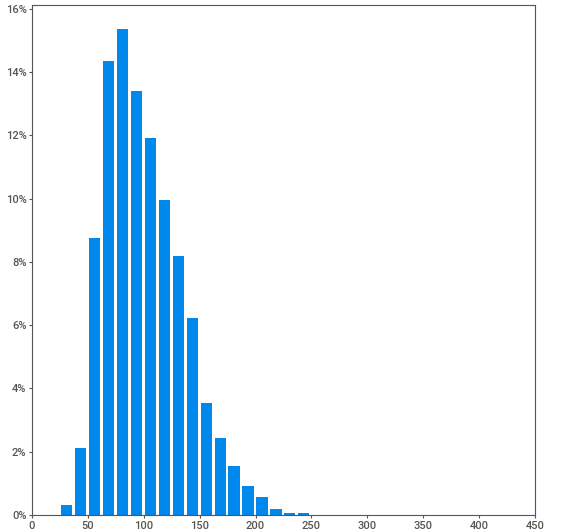
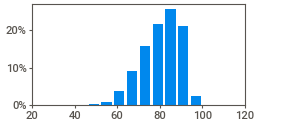
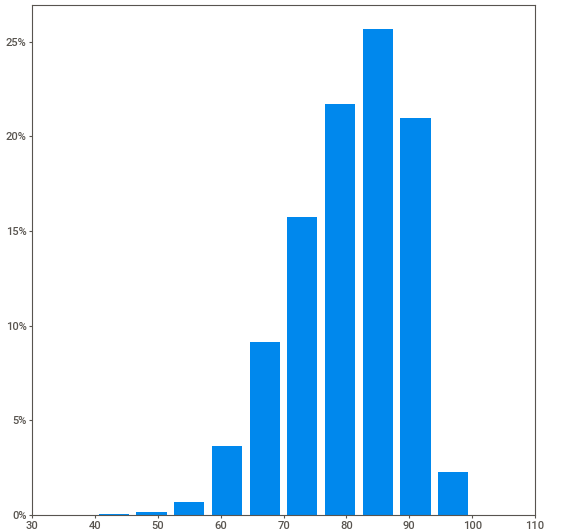
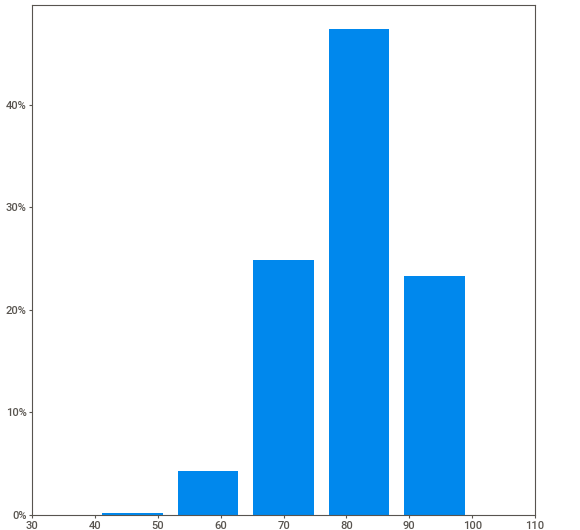
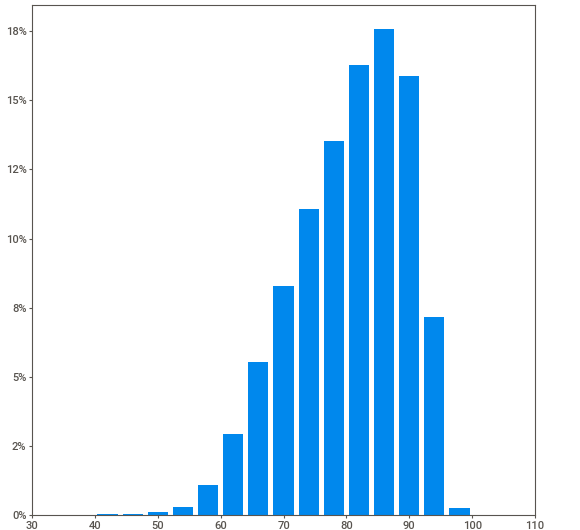
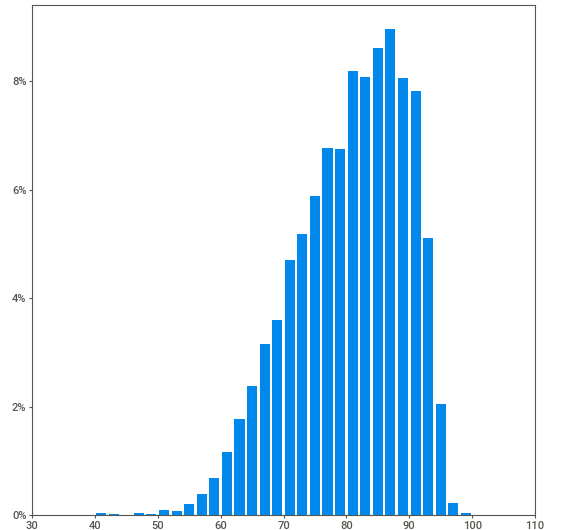
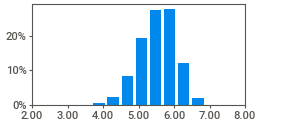
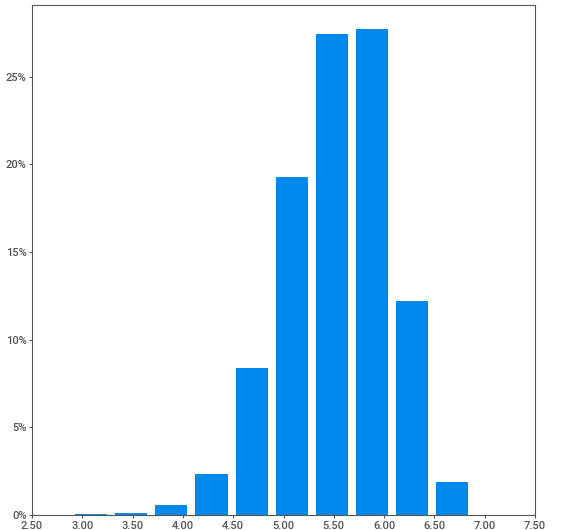
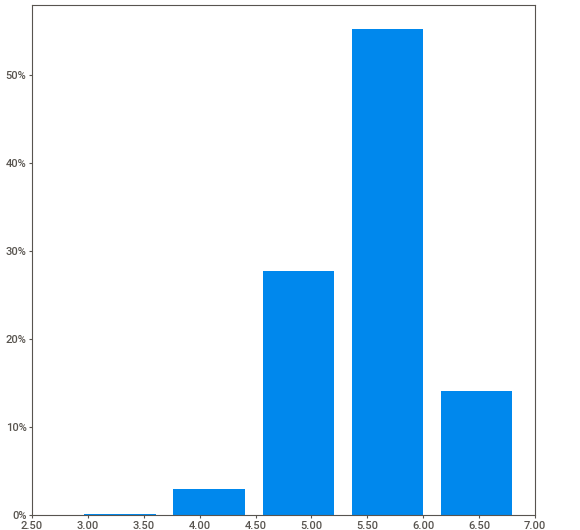
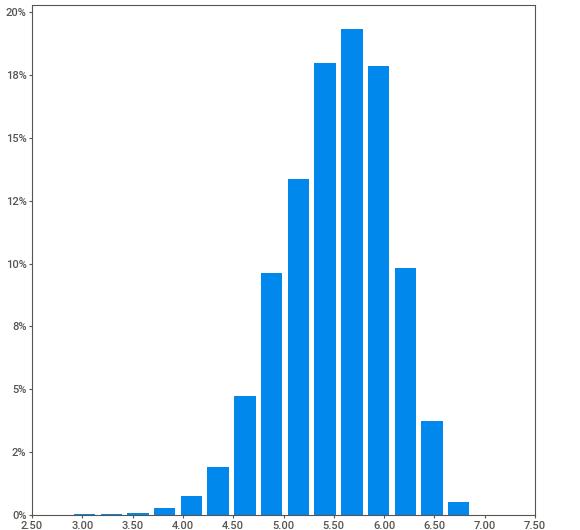
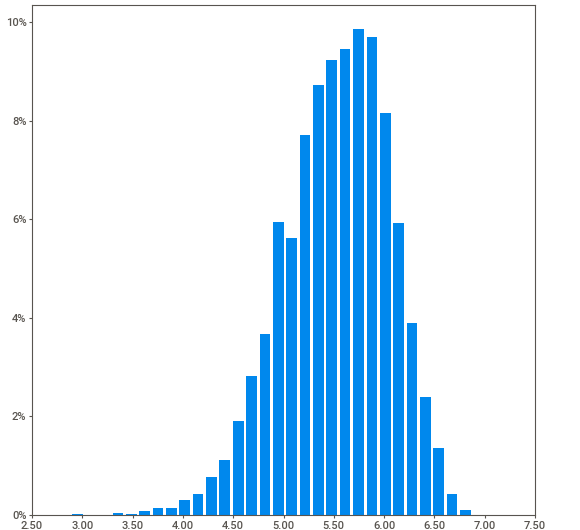
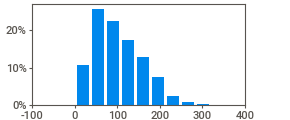
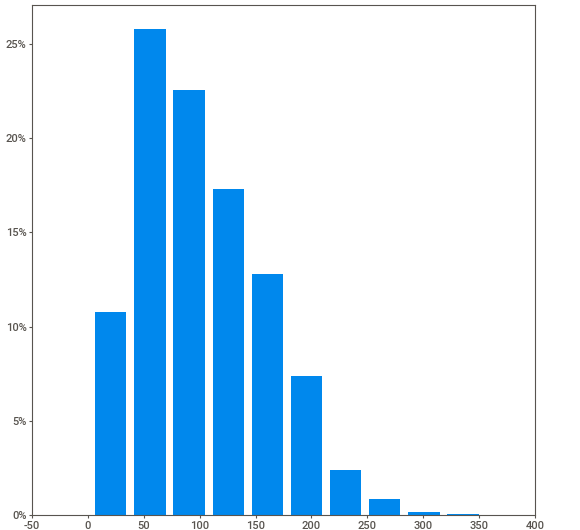
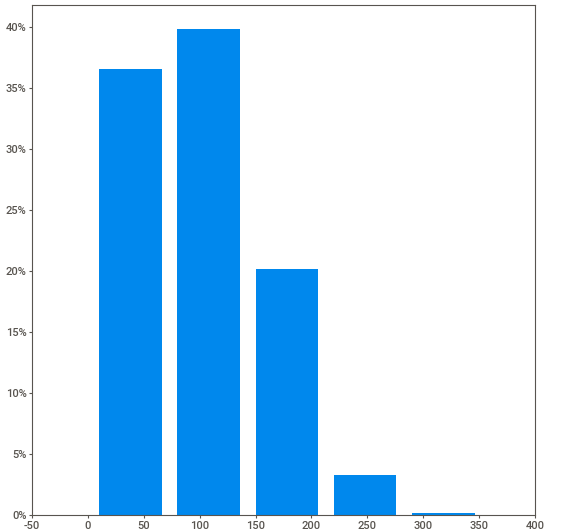
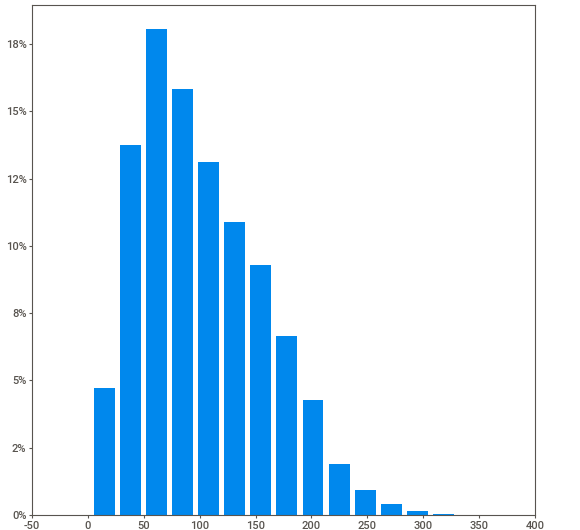
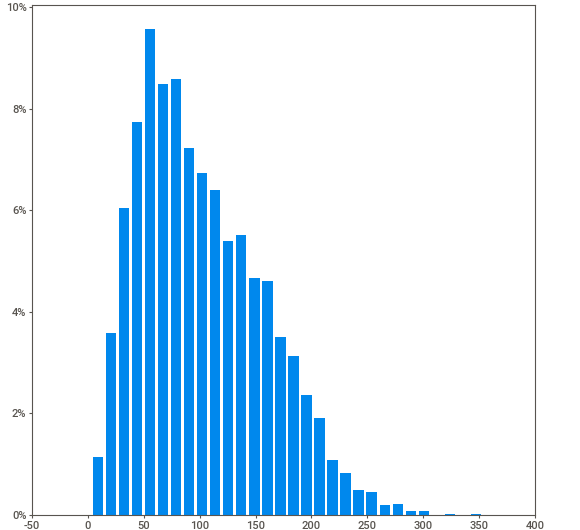
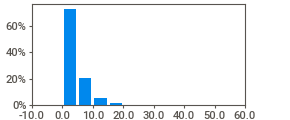
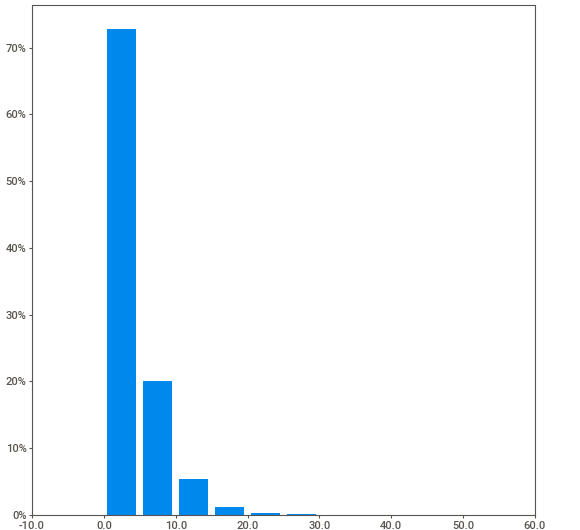
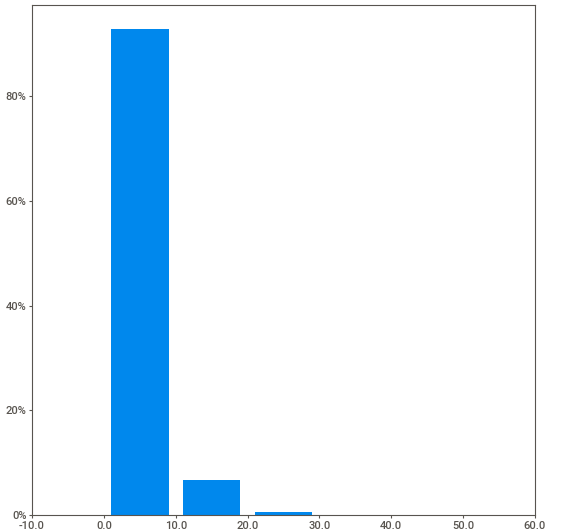
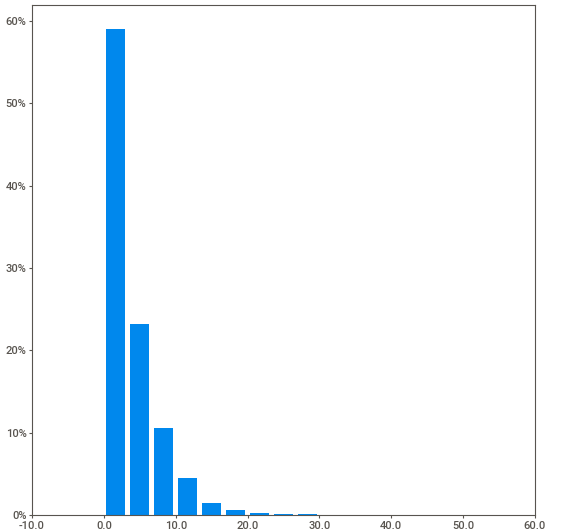
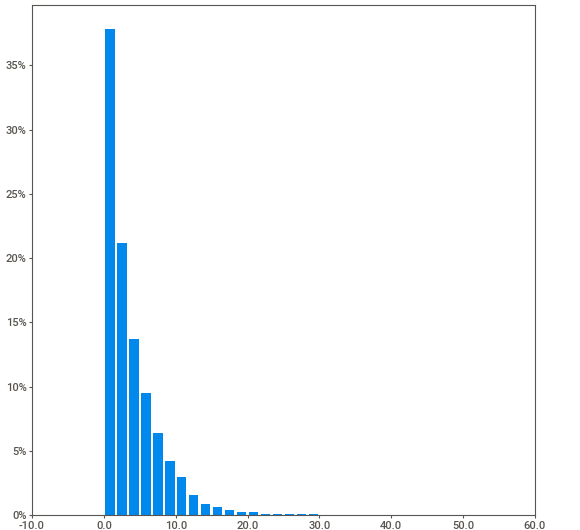
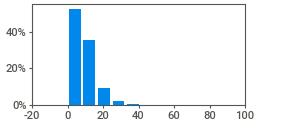
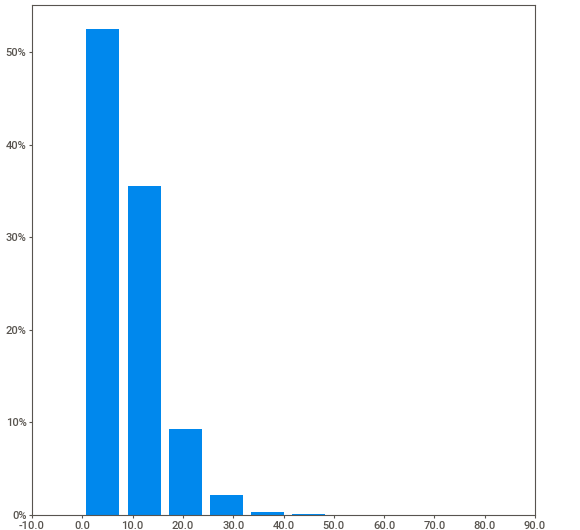
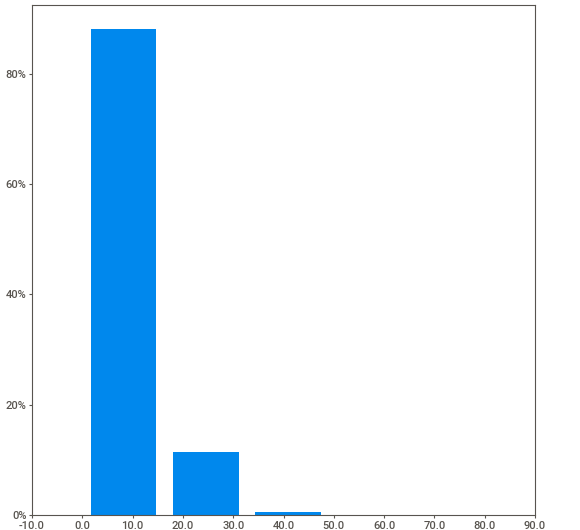
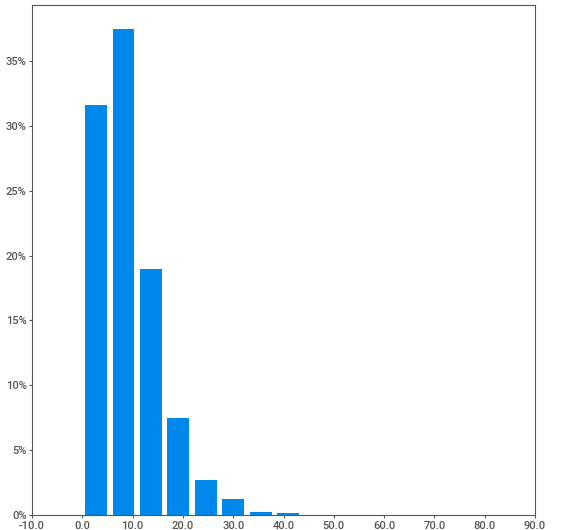
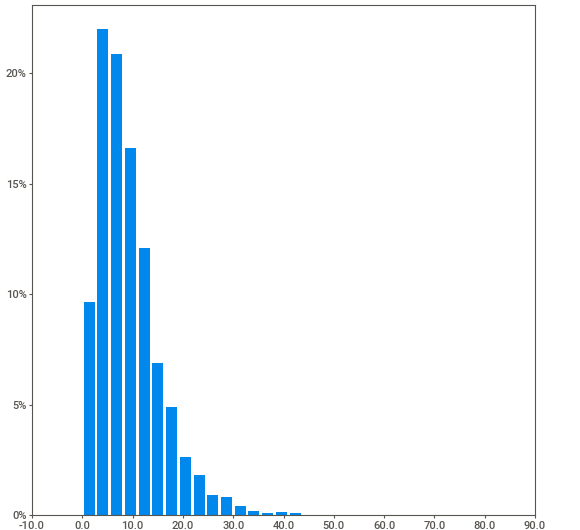
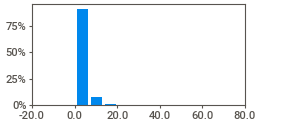
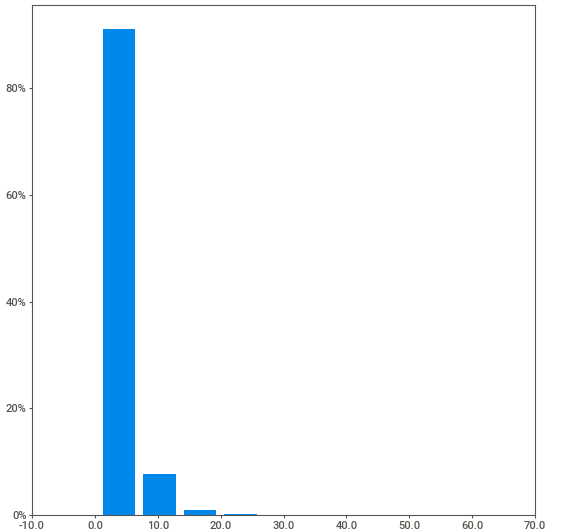
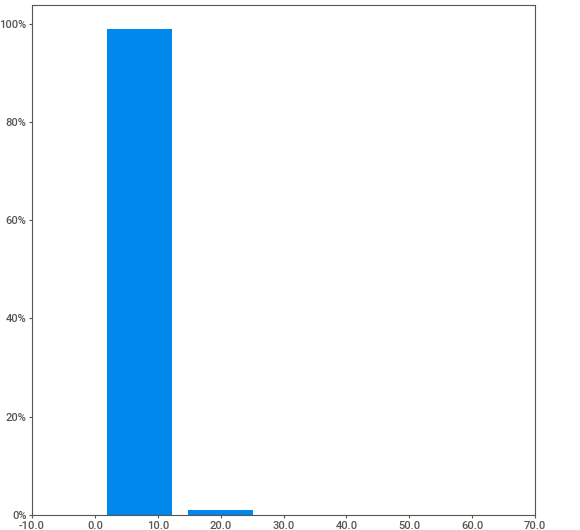
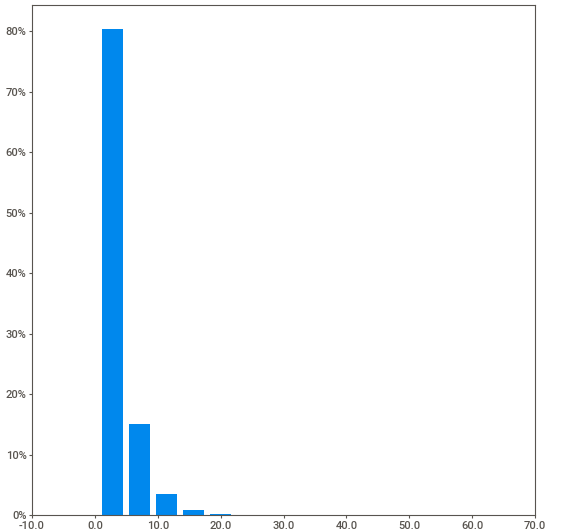
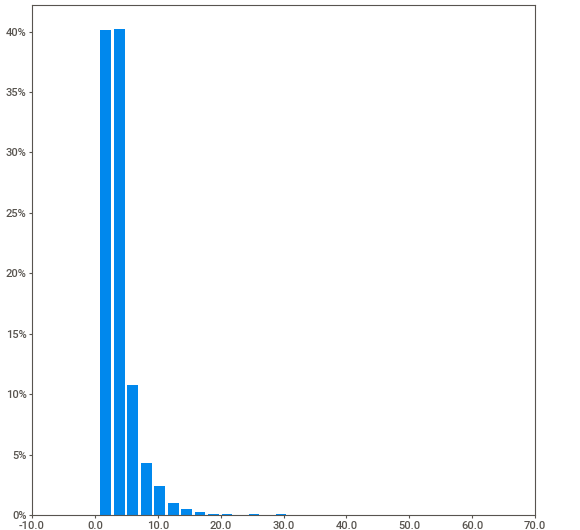
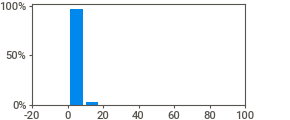
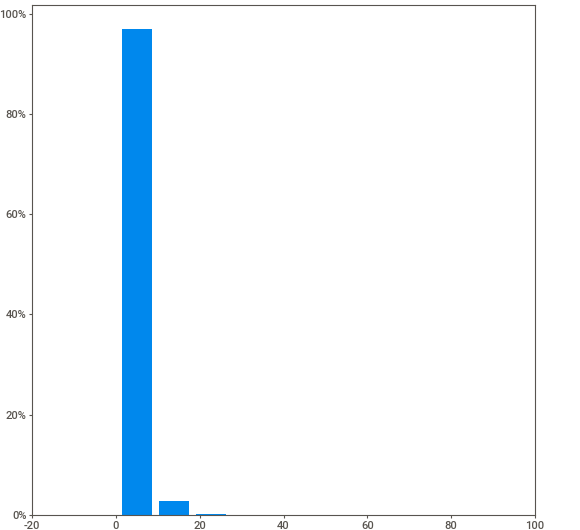
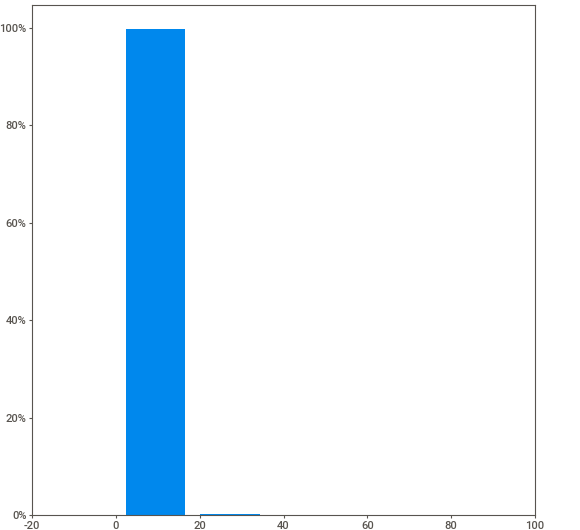
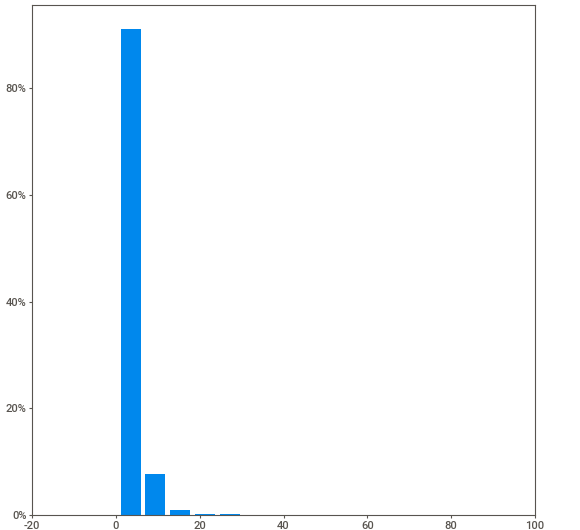
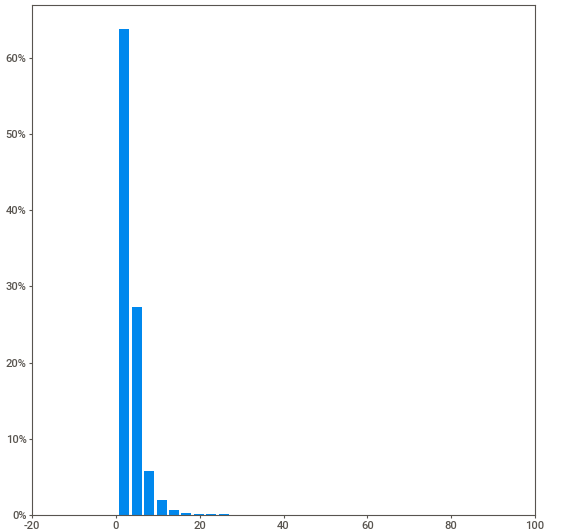
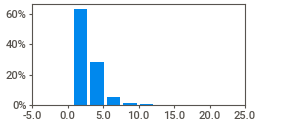
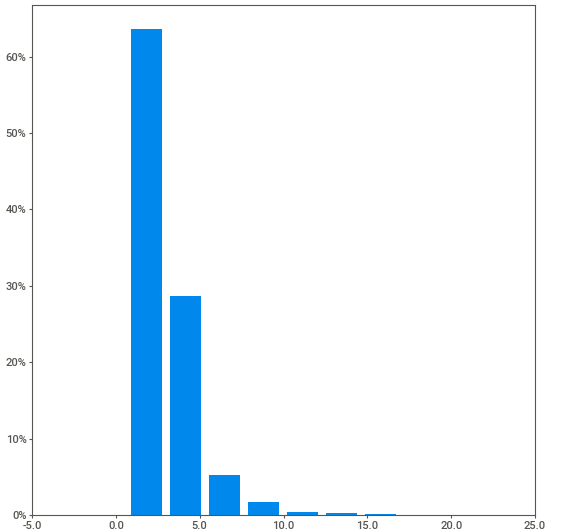
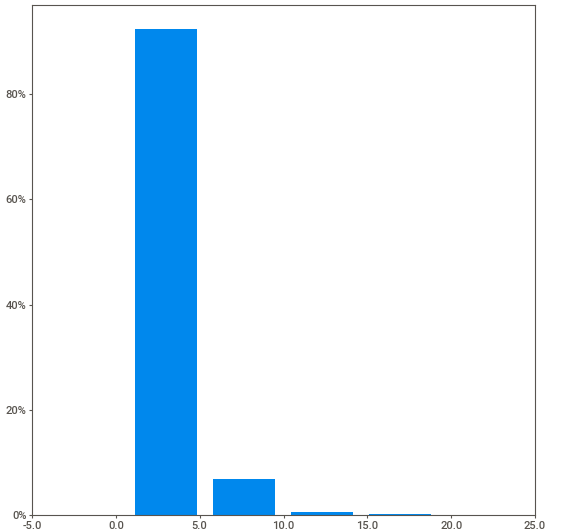
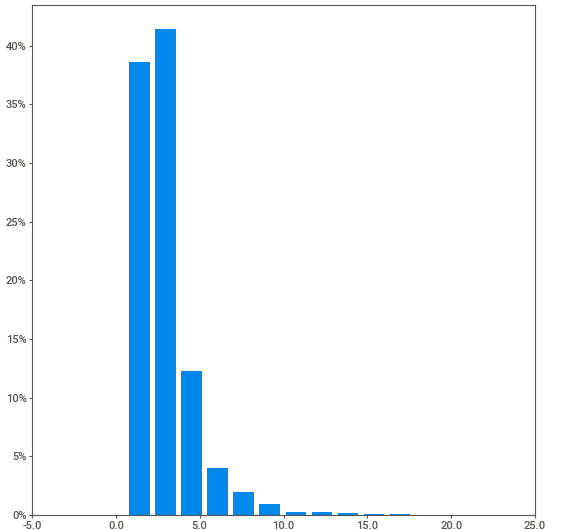
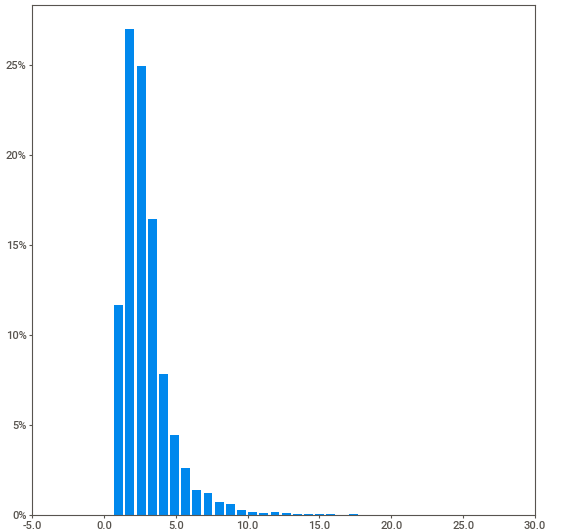
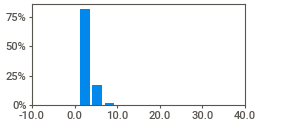
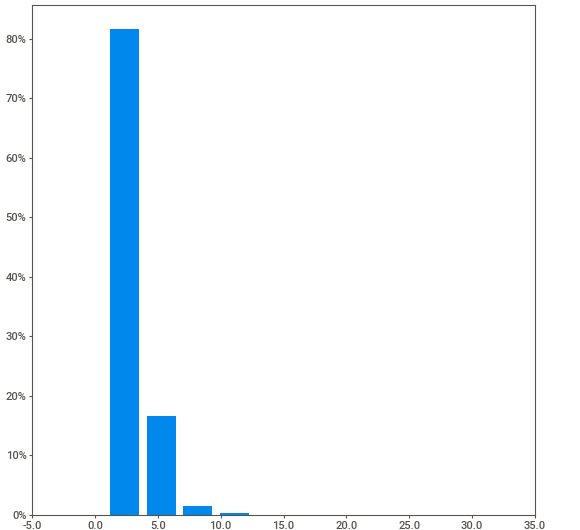
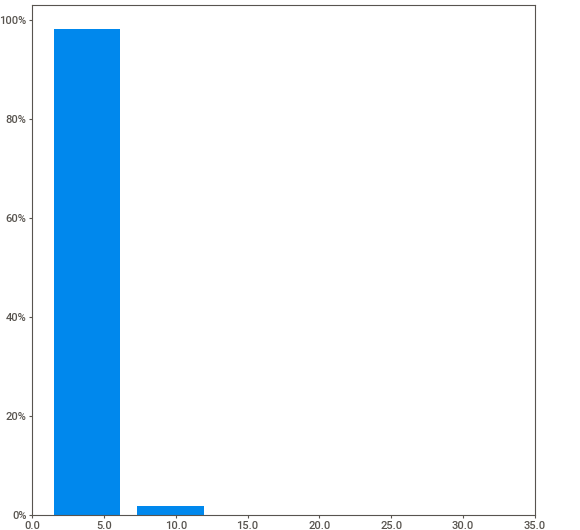
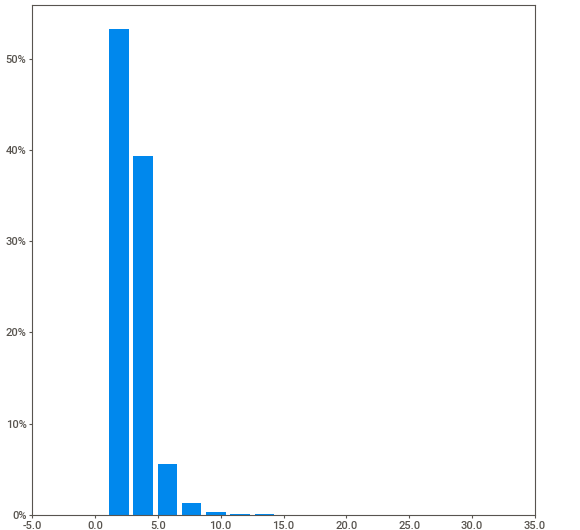
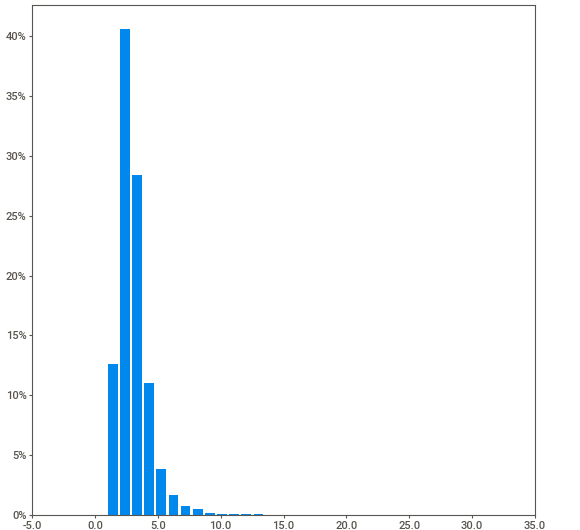
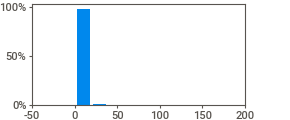
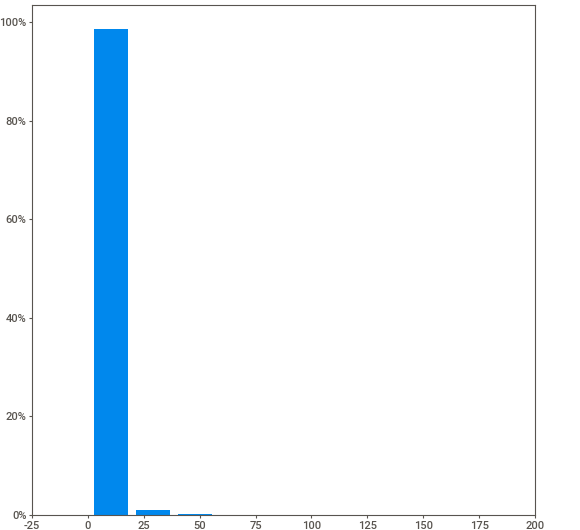
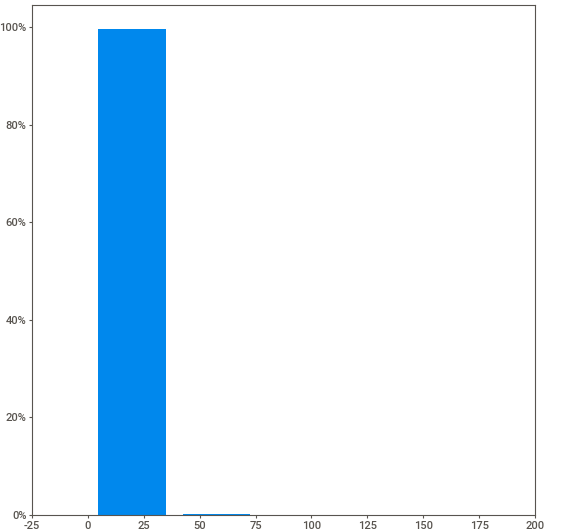
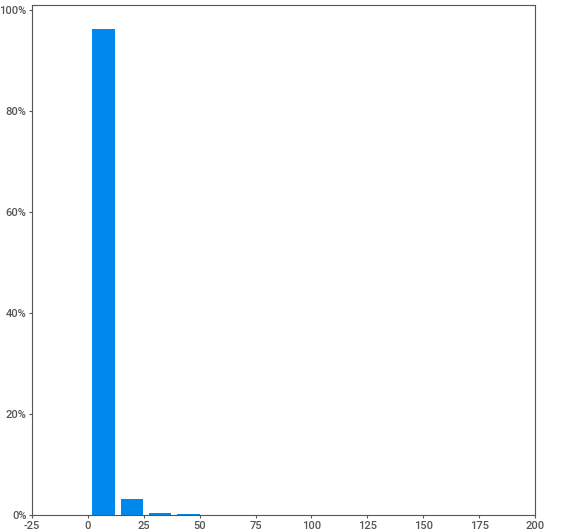
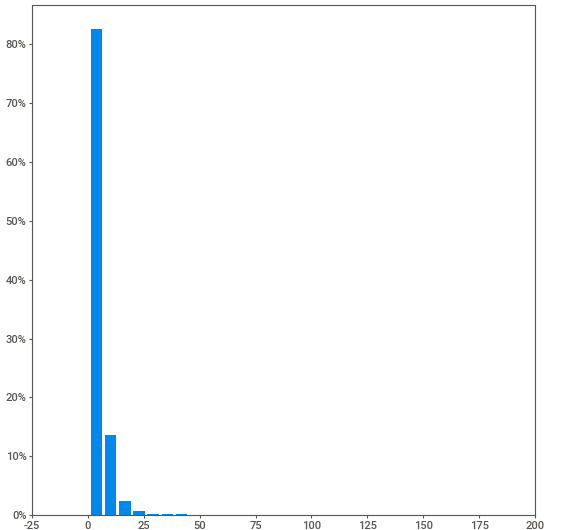
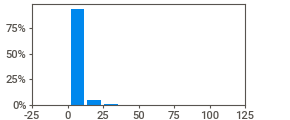
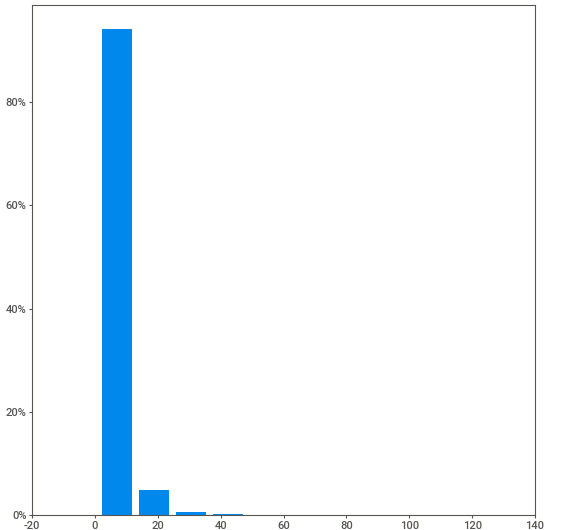
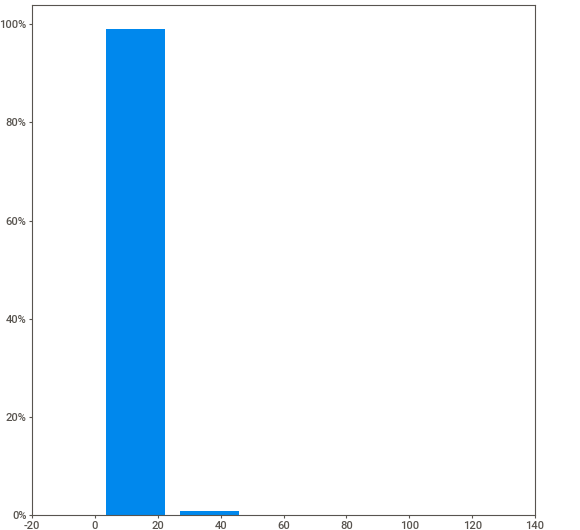
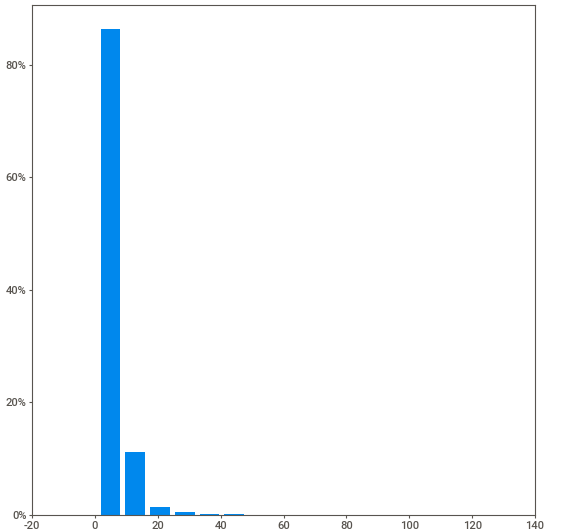
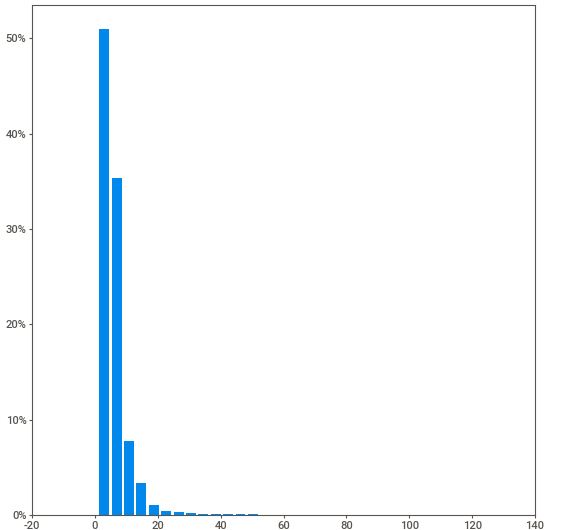
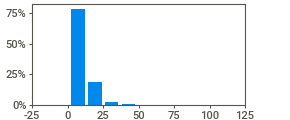
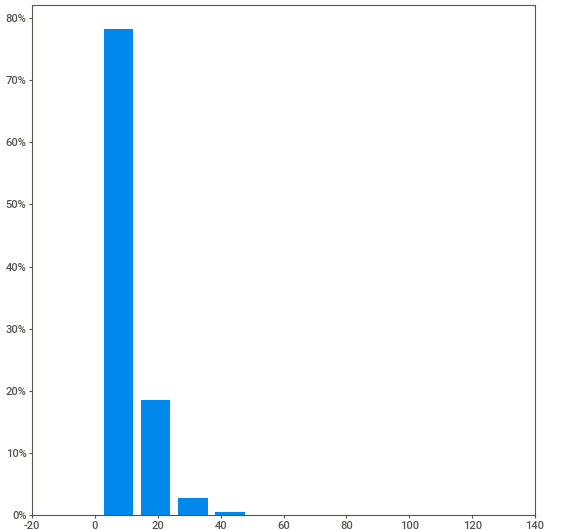
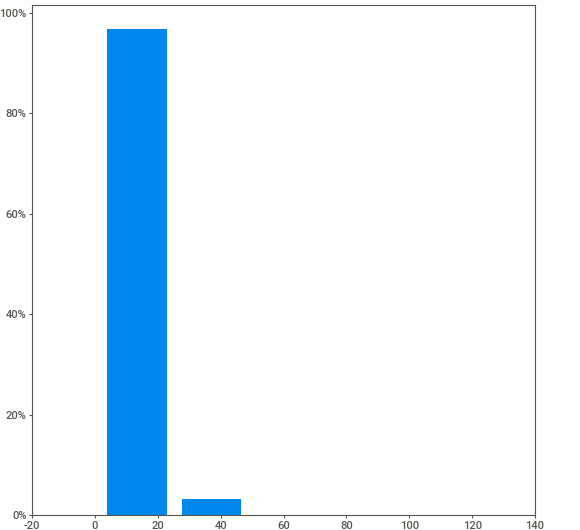
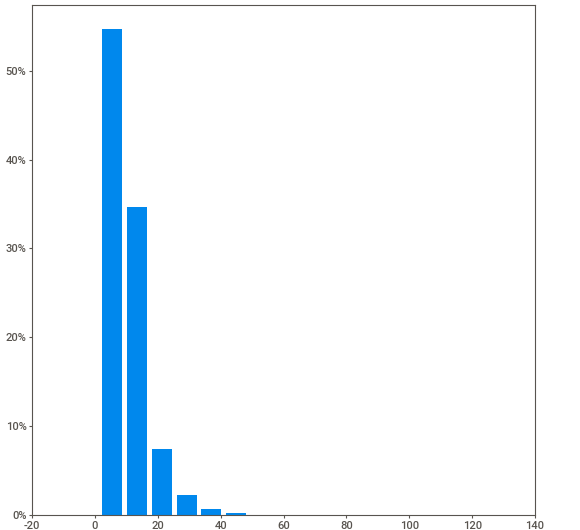
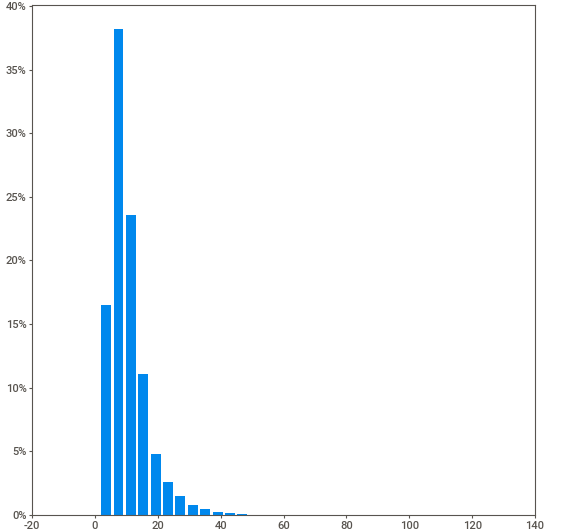
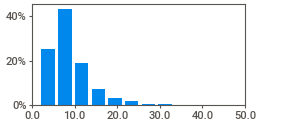
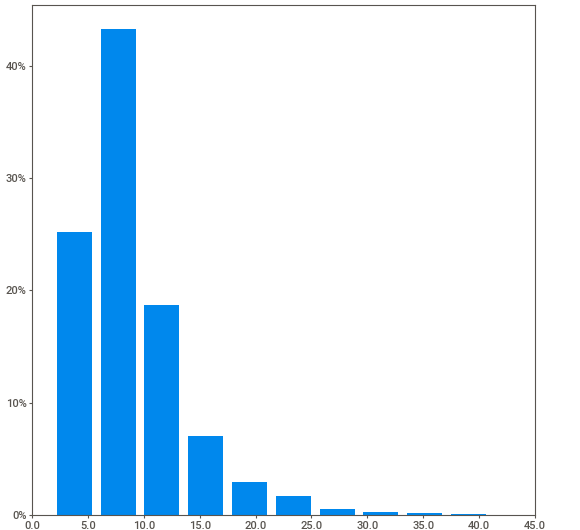
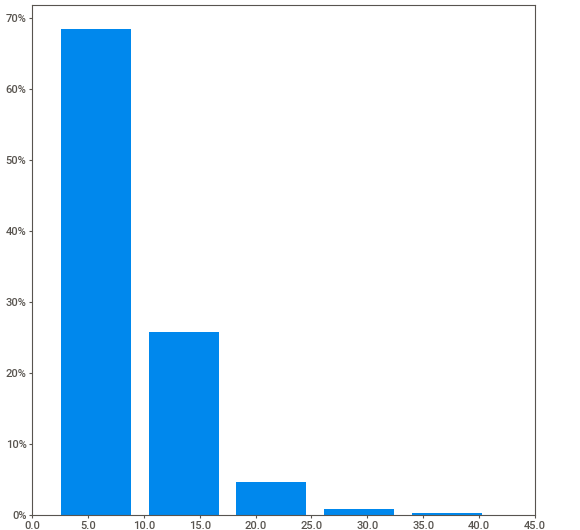
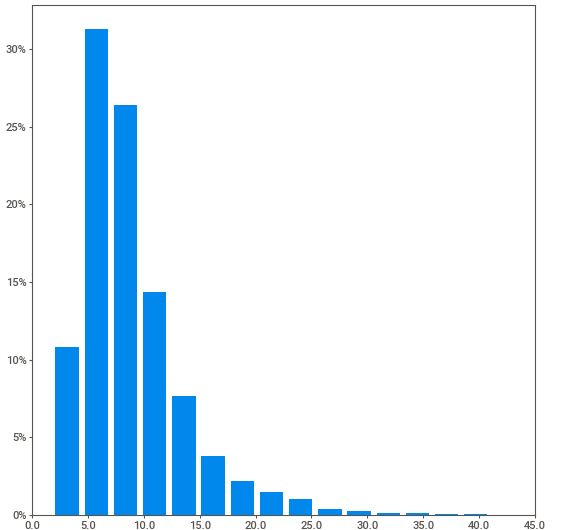
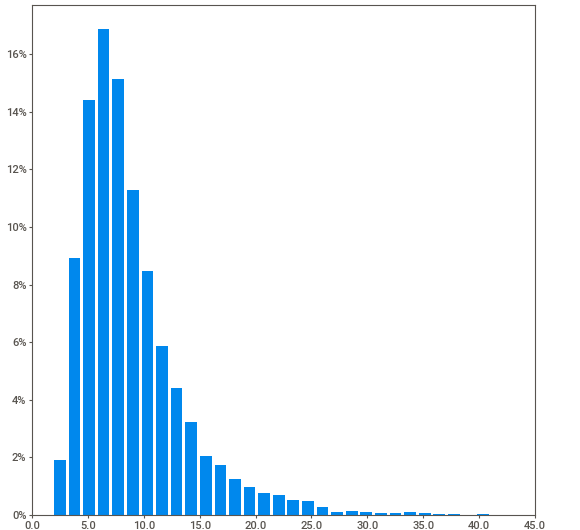
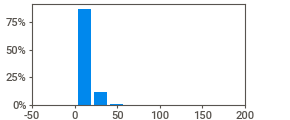
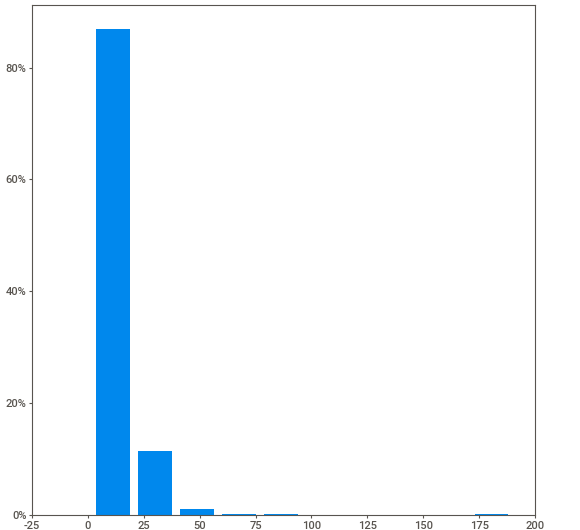
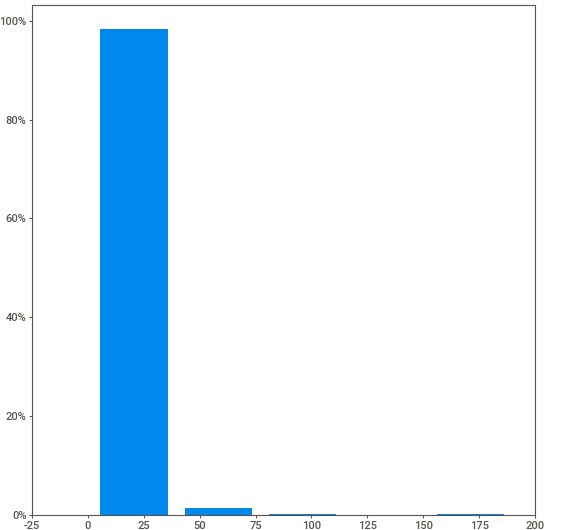
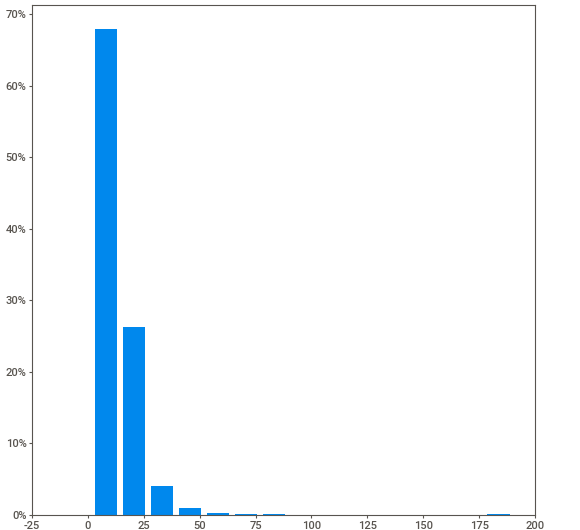
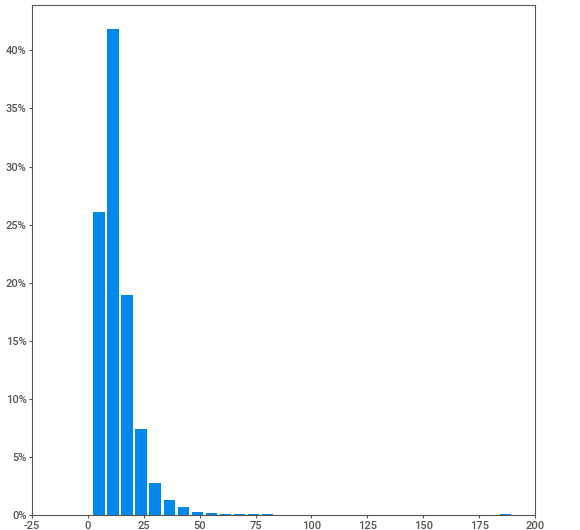
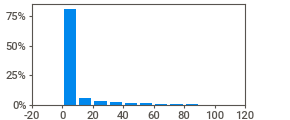
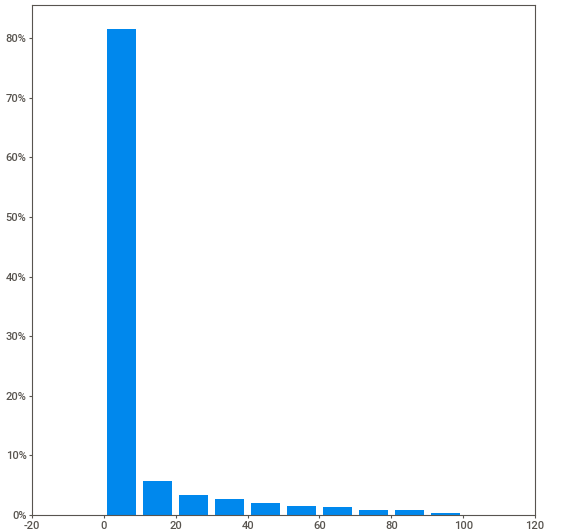
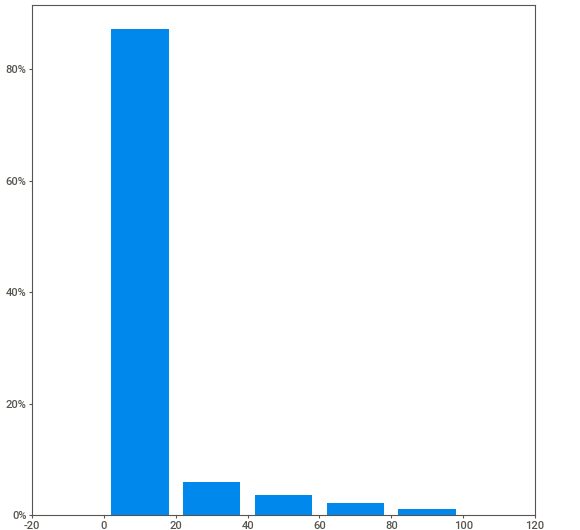
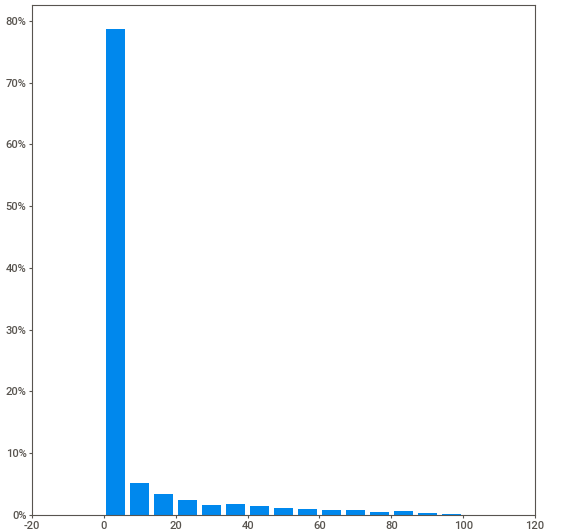
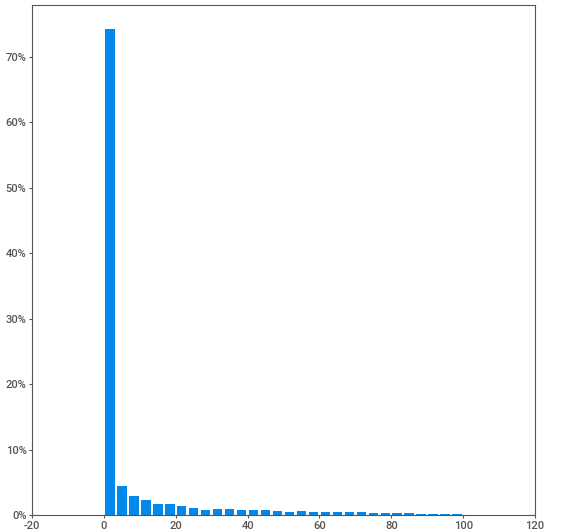
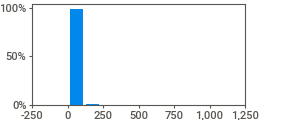
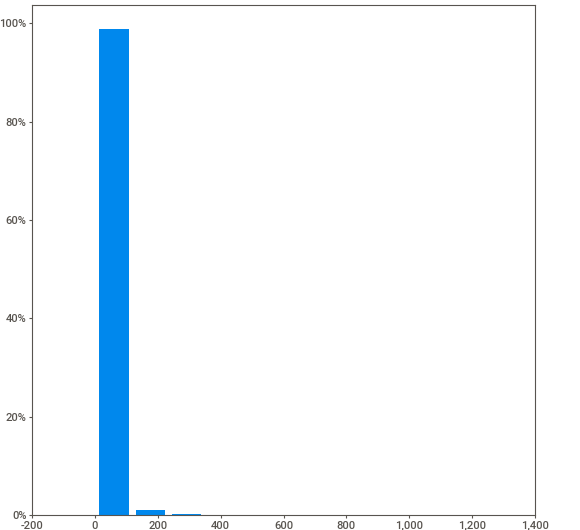
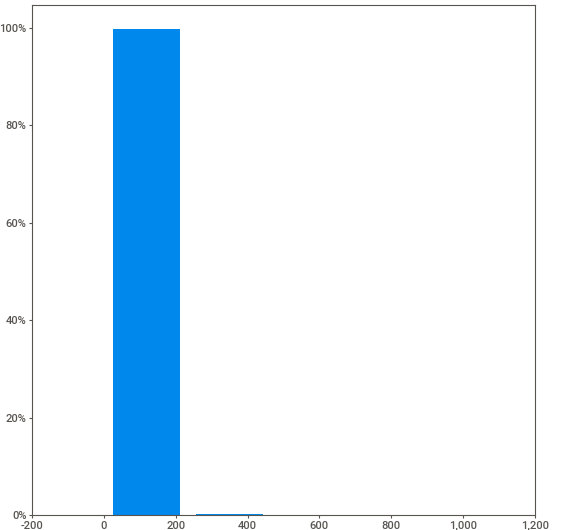
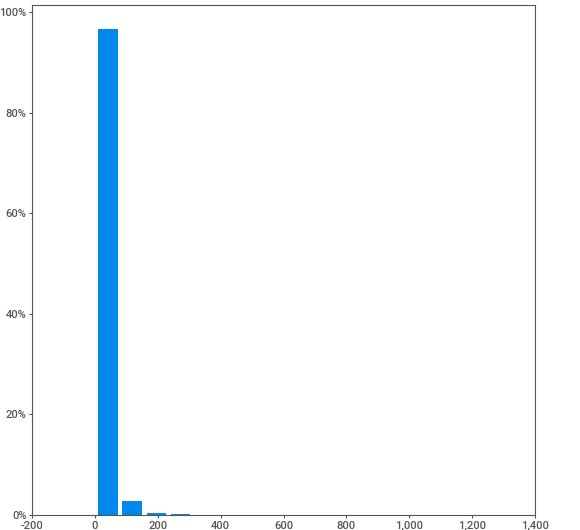
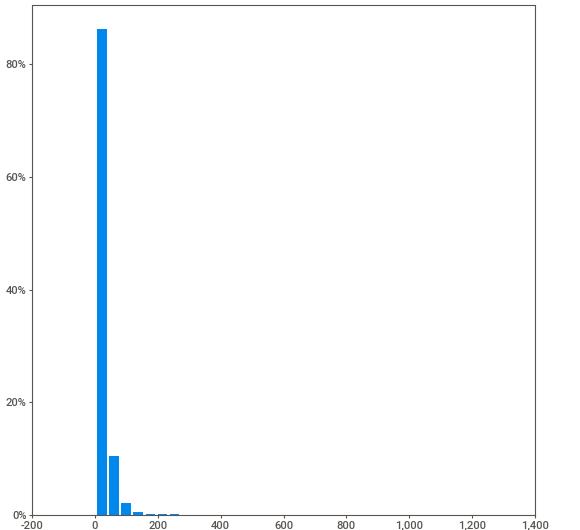
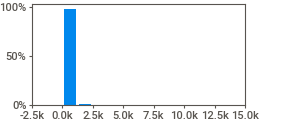
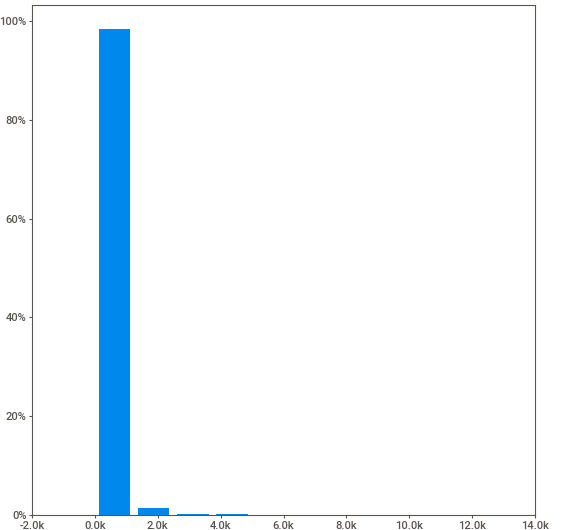
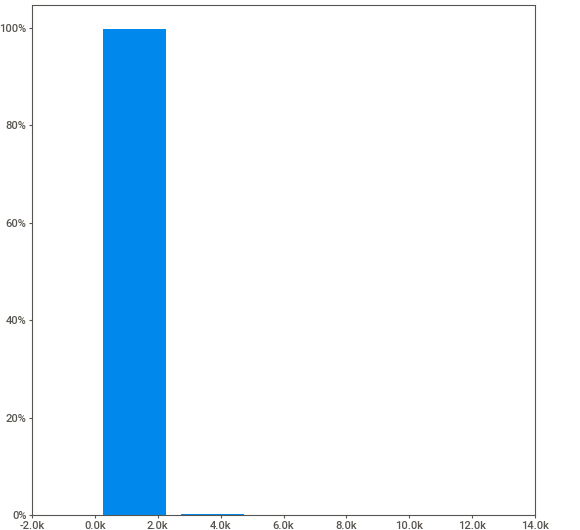
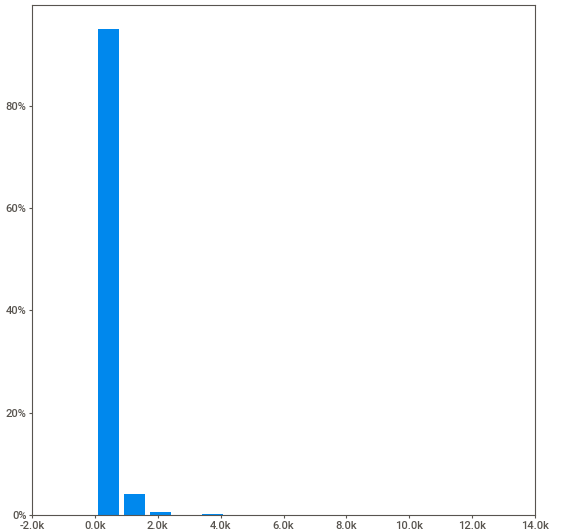
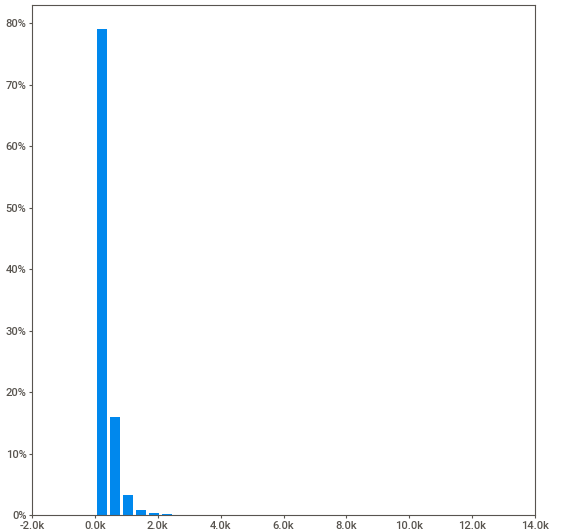
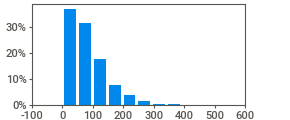
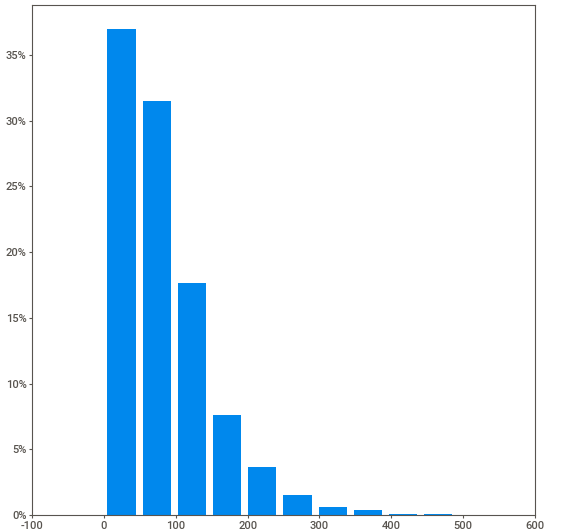
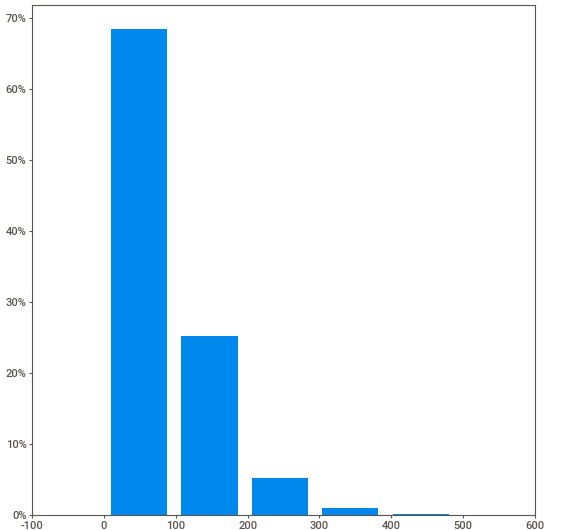
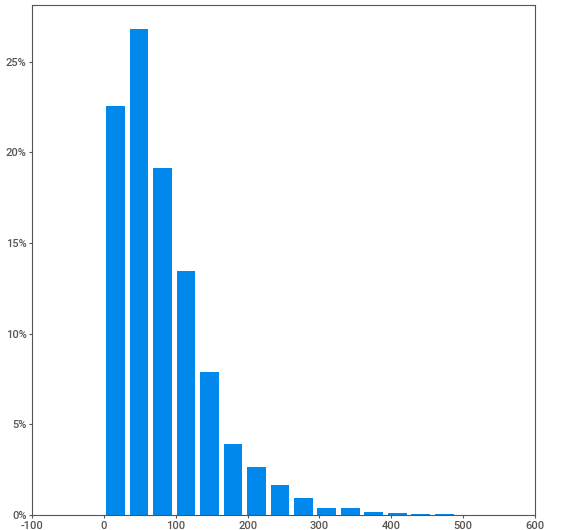
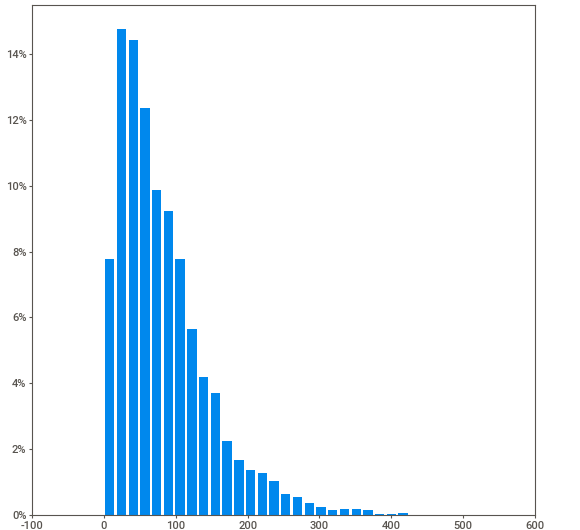
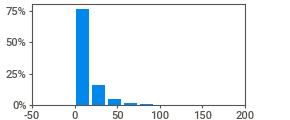
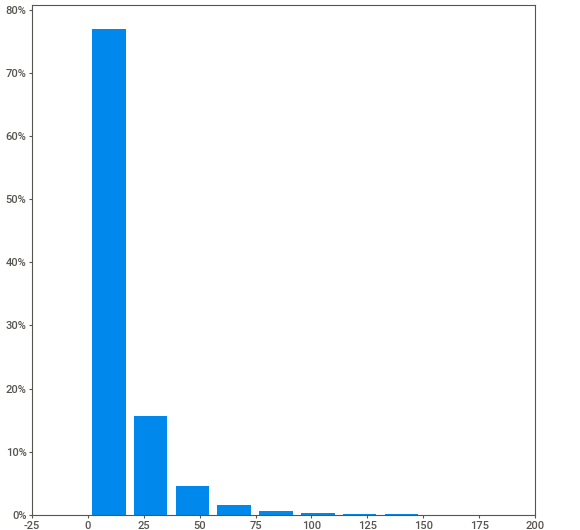
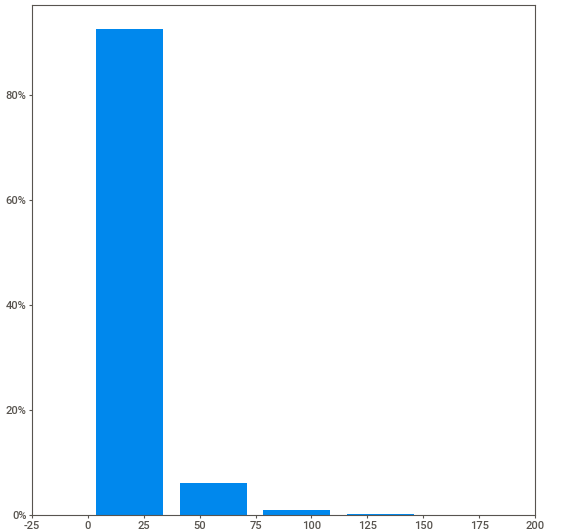
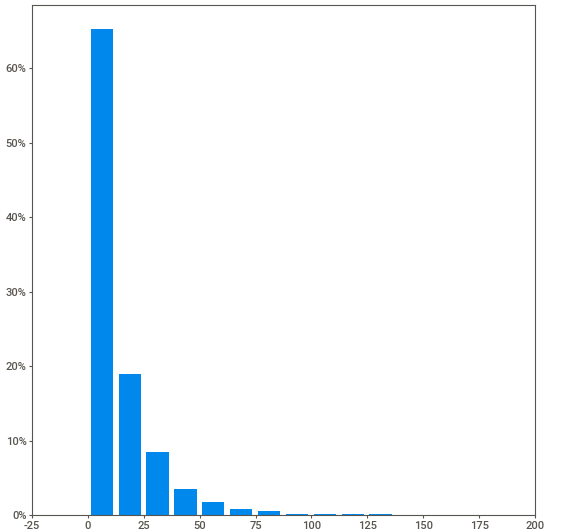
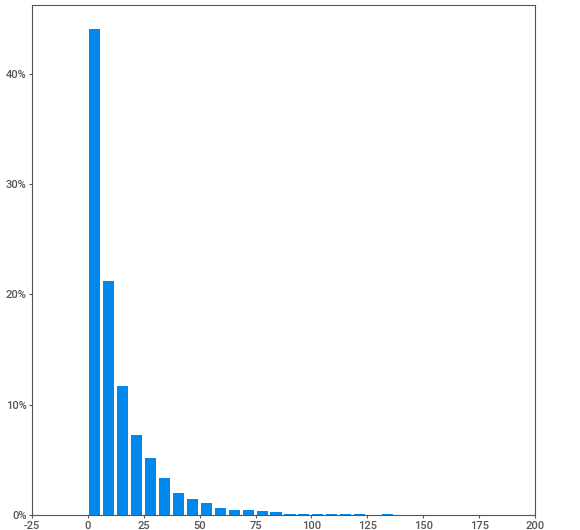
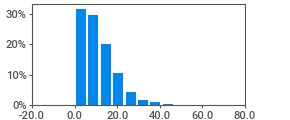
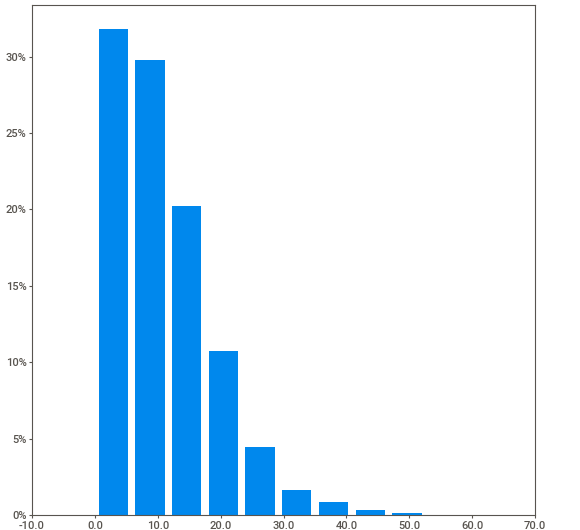
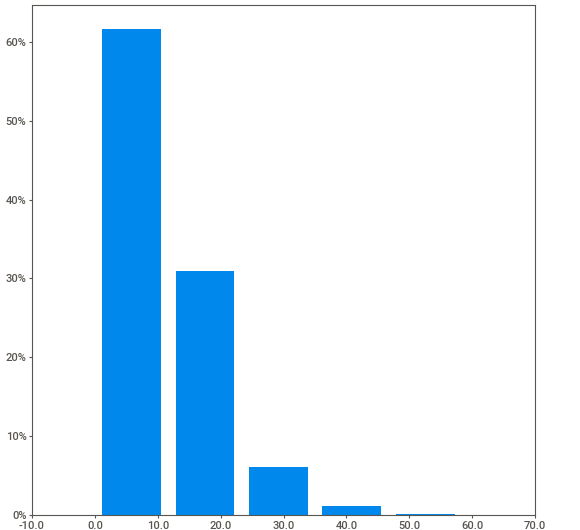
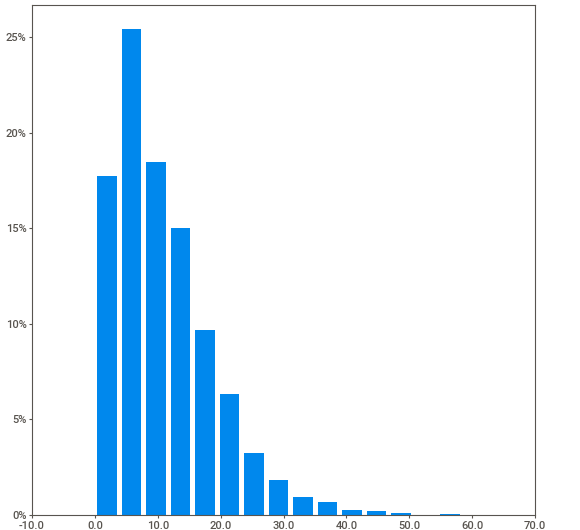
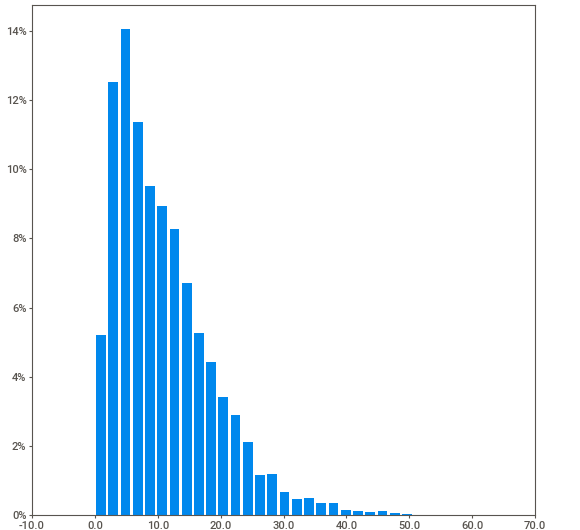
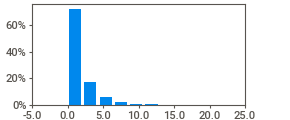
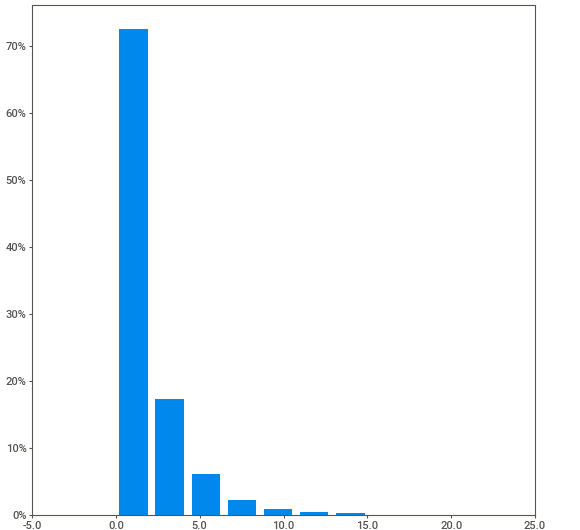
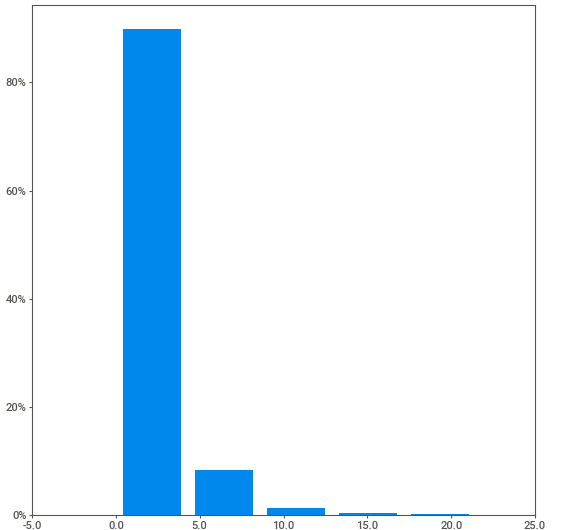
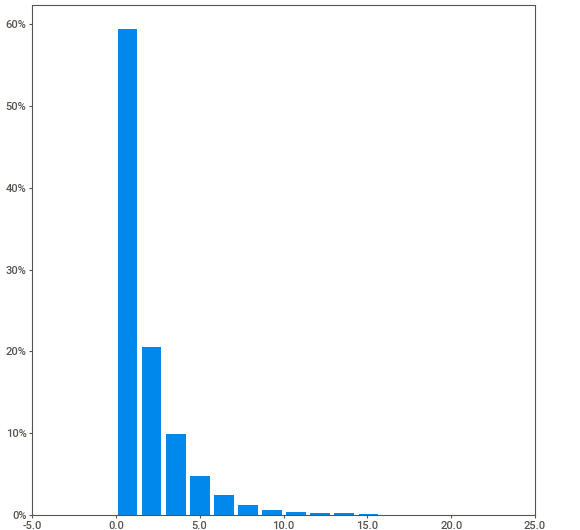
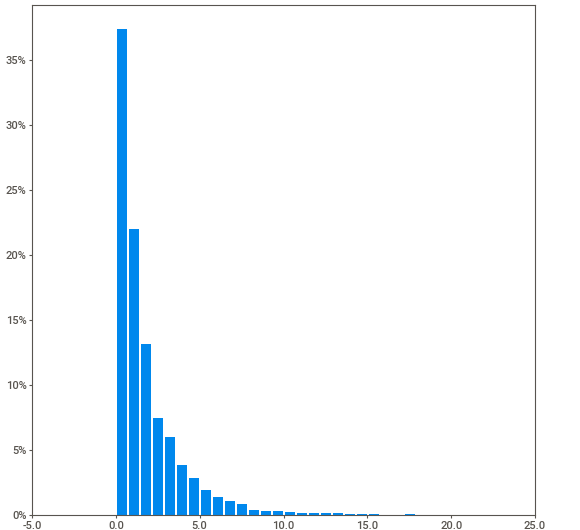
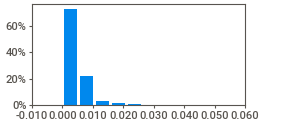
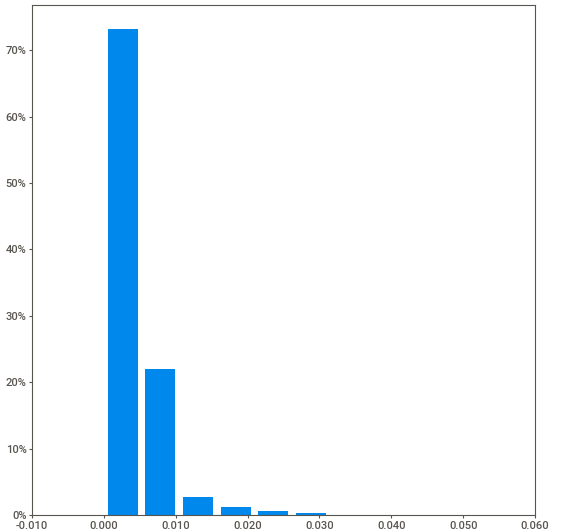
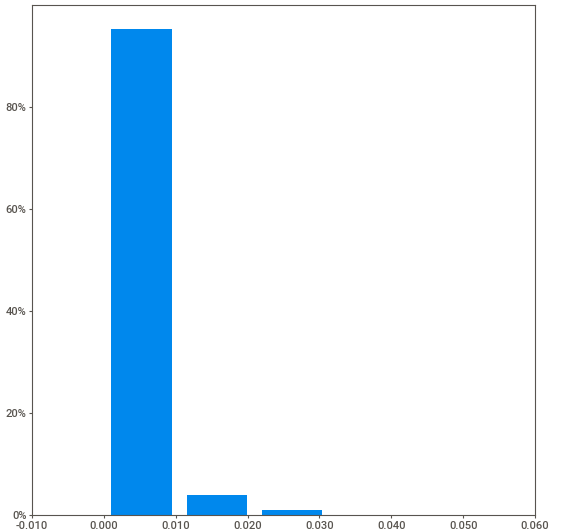
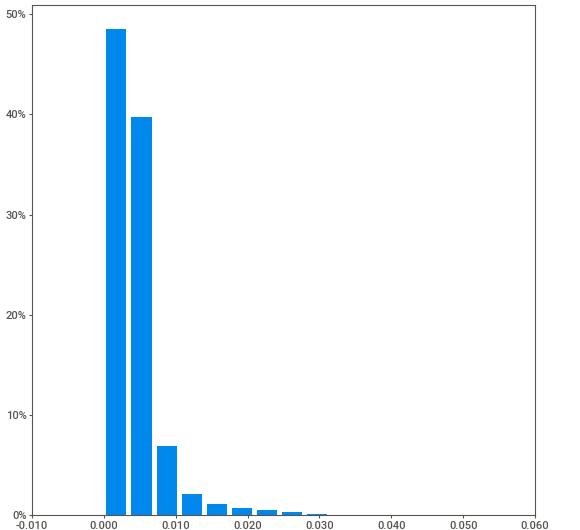
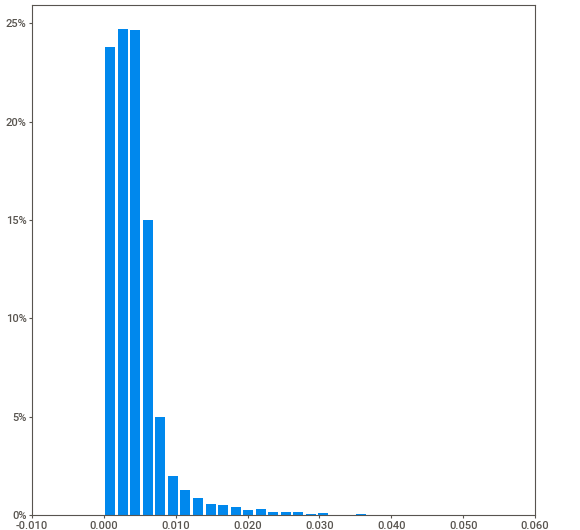
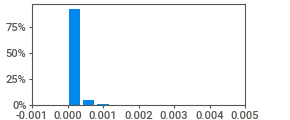
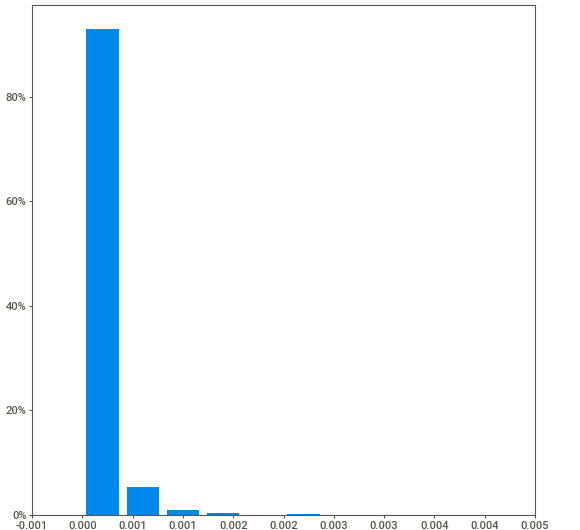
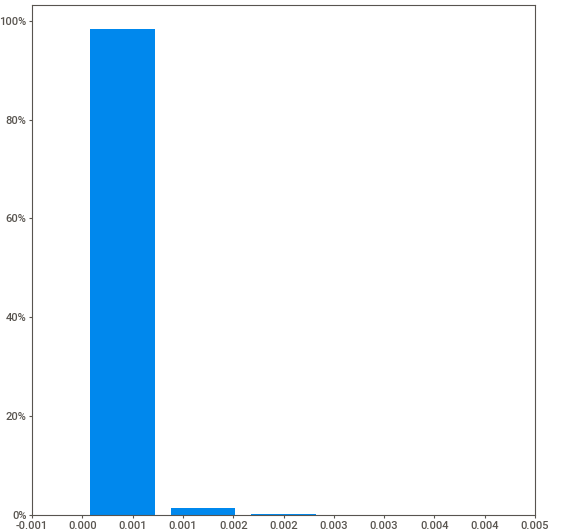
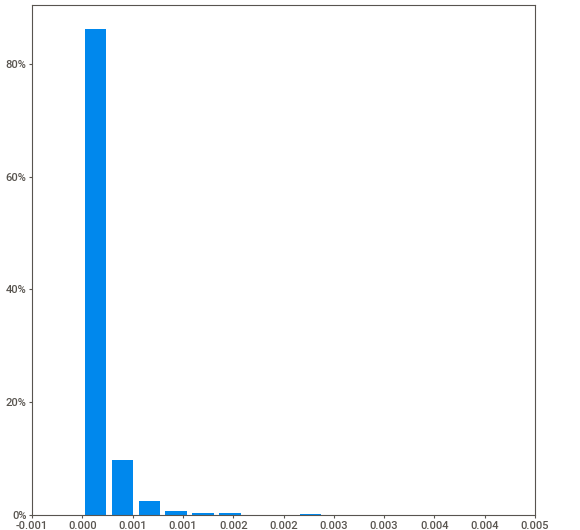
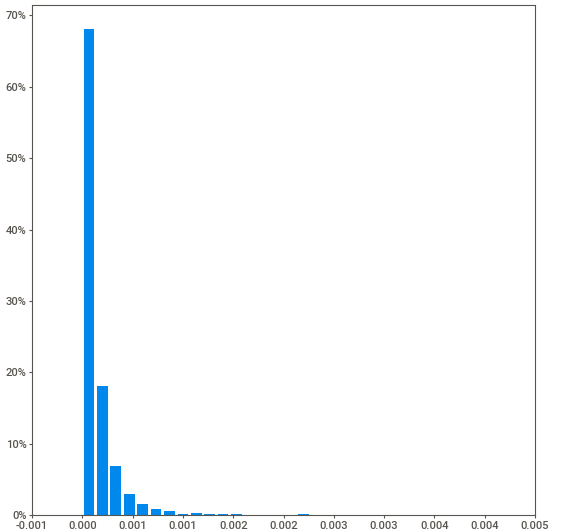
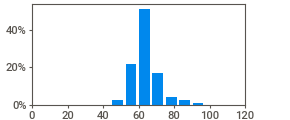
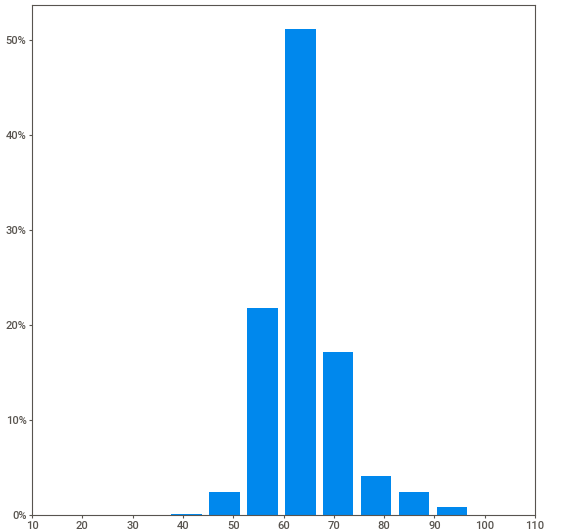
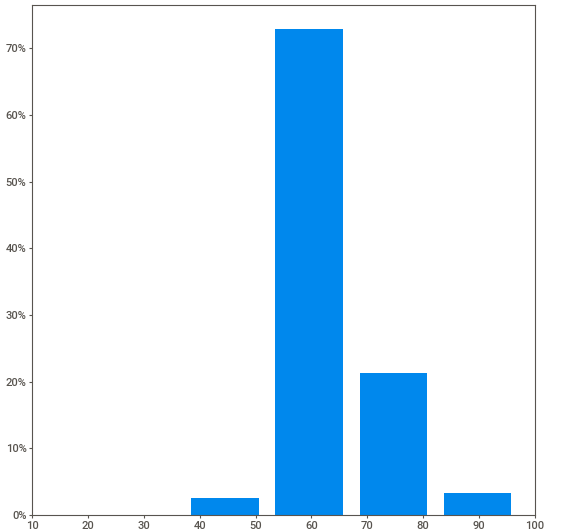
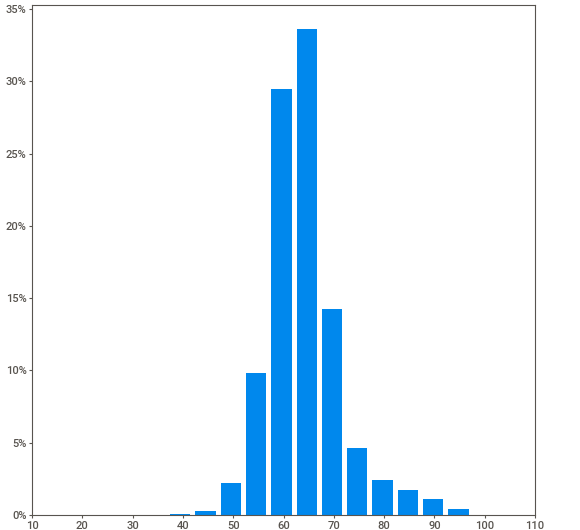
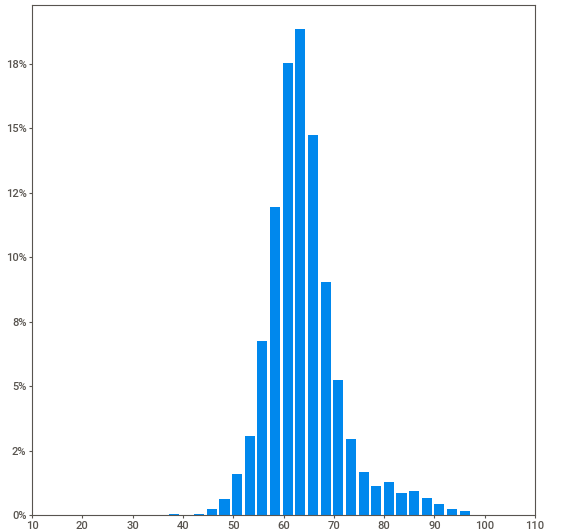
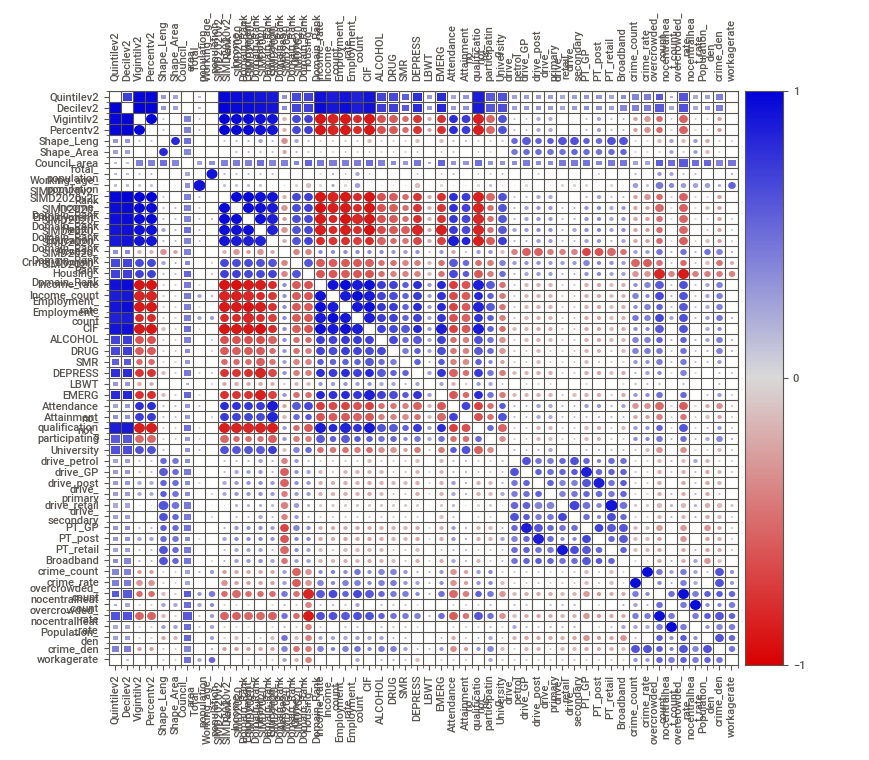
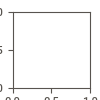

In [8]:
#from pandas_profiling import ProfileReport
#ProfileReport(df)

#from dataprep.eda import create_report
#create_report(df)

import sweetviz as sv
sv_report = sv.analyze(df)
sv_report.show_notebook()

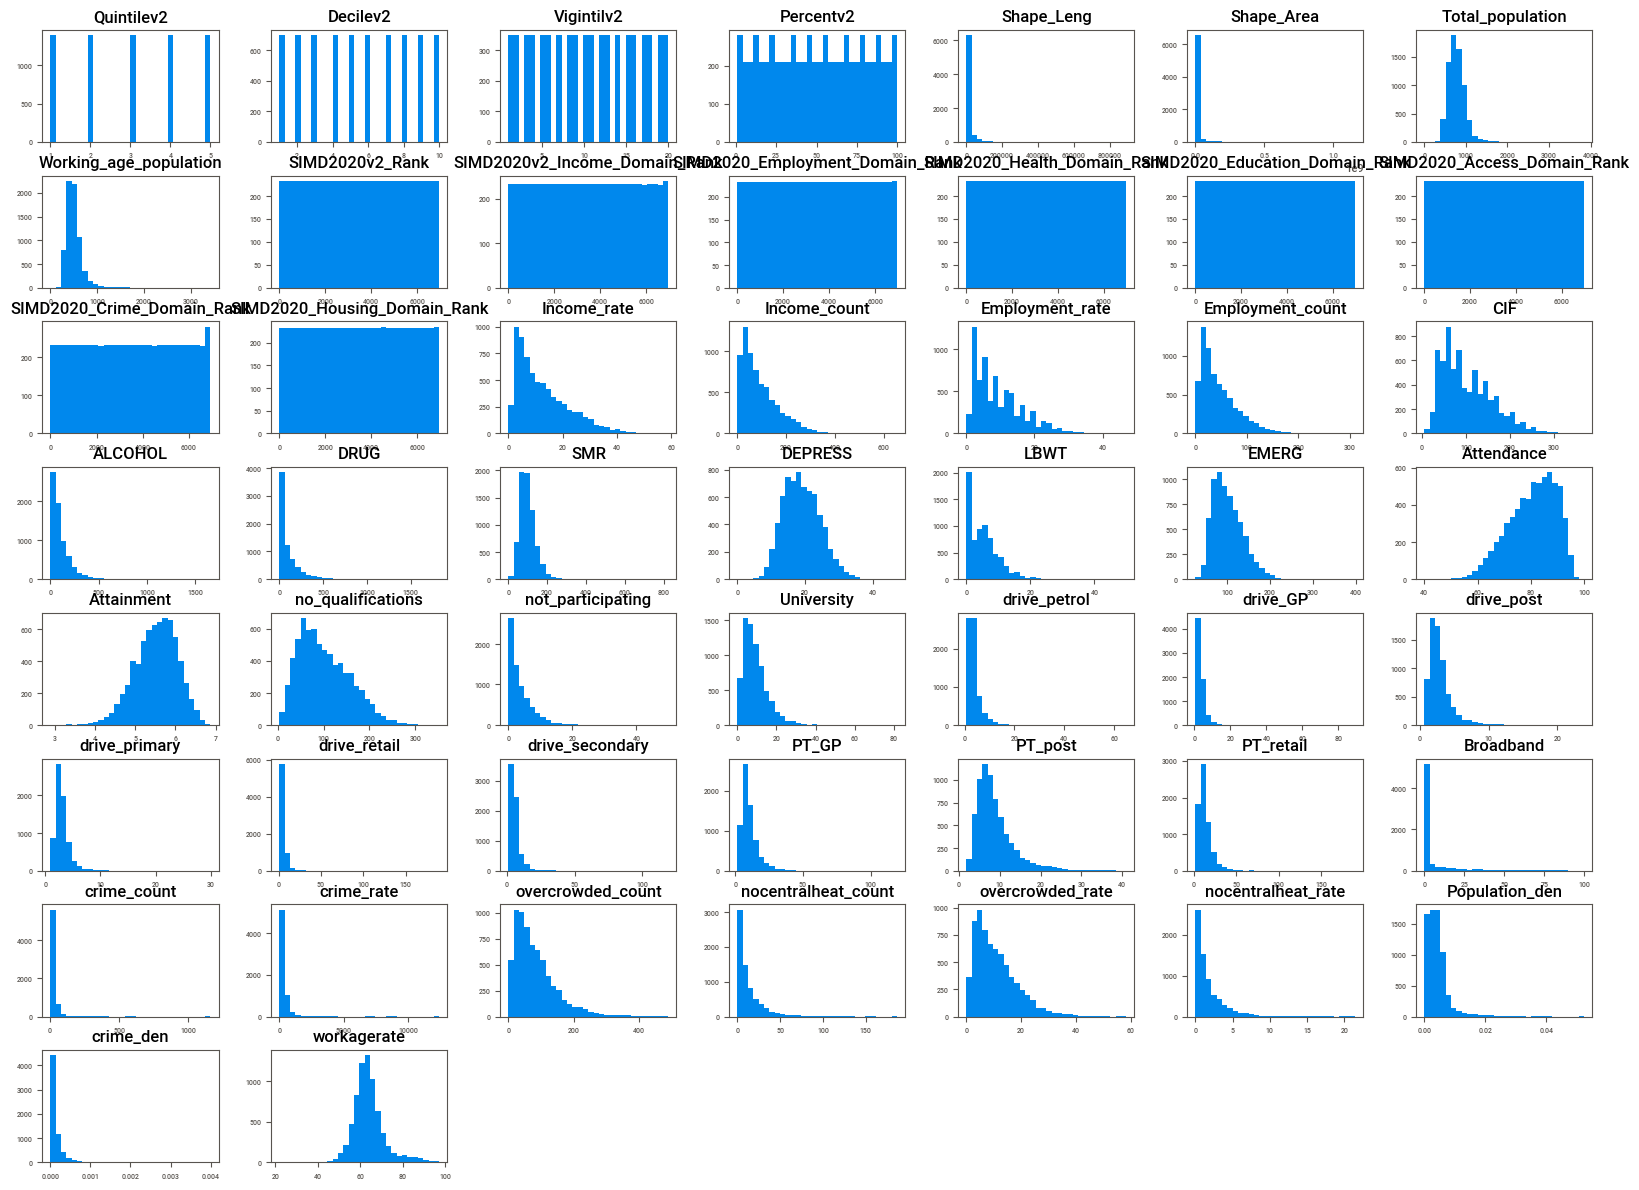

In [9]:
# Histograms
df.hist(figsize=(20,15), grid=False, ylabelsize=5, xlabelsize=5, bins=30)
plt.show()

In [10]:
# Listing correlations

def top_entries(df):
    mat = df.corr().abs()
    
    # Remove duplicate and identity entries
    mat.loc[:,:] = np.tril(mat.values, k=-1)
    mat = mat[mat>0]

    return (mat.unstack()
             .sort_values(ascending=False)
             .reset_index()
             .rename(columns={
                 "level_0": "Feature_A",
                 "level_1": "Feature_B",
                 0: "Correlation"
             }))

corr_df = top_entries(df)
corr_df.head(20)

Feature_A                        Feature_B  \
0                       Percentv2                  SIMD2020v2_Rank   
1                      Vigintilv2                        Percentv2   
2                      Vigintilv2                  SIMD2020v2_Rank   
3                        Decilev2                       Vigintilv2   
4                        Decilev2                        Percentv2   
5                        Decilev2                  SIMD2020v2_Rank   
6                      Quintilev2                         Decilev2   
7                      Quintilev2                       Vigintilv2   
8                      Quintilev2                        Percentv2   
9                      Quintilev2                  SIMD2020v2_Rank   
10                SIMD2020v2_Rank    SIMD2020v2_Income_Domain_Rank   
11                      Percentv2    SIMD2020v2_Income_Domain_Rank   
12                     Vigintilv2    SIMD2020v2_Income_Domain_Rank   
13                       Decilev2    SIMD2020v2_Income_Domain_Rank   
14                SIMD2020v2_Rank  SIMD2020_Employment_Domain_Rank   
15                      Percentv2  SIMD2020_Employment_Domain_Rank   
16                     Vigintilv2  SIMD2020_Employment_Domain_Rank   
17  SIMD2020v2_Income_Domain_Rank  SIMD2020_Employment_Domain_Rank   
18                    Income_rate                  Employment_rate   
19            nocentralheat_count               nocentralheat_rate   

    Correlation  
0      0.999950  
1      0.998800  
2      0.998749  
3      0.996233  
4      0.995038  
5      0.994987  
6      0.984732  
7      0.981022  
8      0.979846  
9      0.979796  
10     0.972215  
11     0.972187  
12     0.971080  
13     0.967547  
14     0.966484  
15     0.966471  
16     0.965419  
17     0.963921  
18     0.962117  
19     0.961895

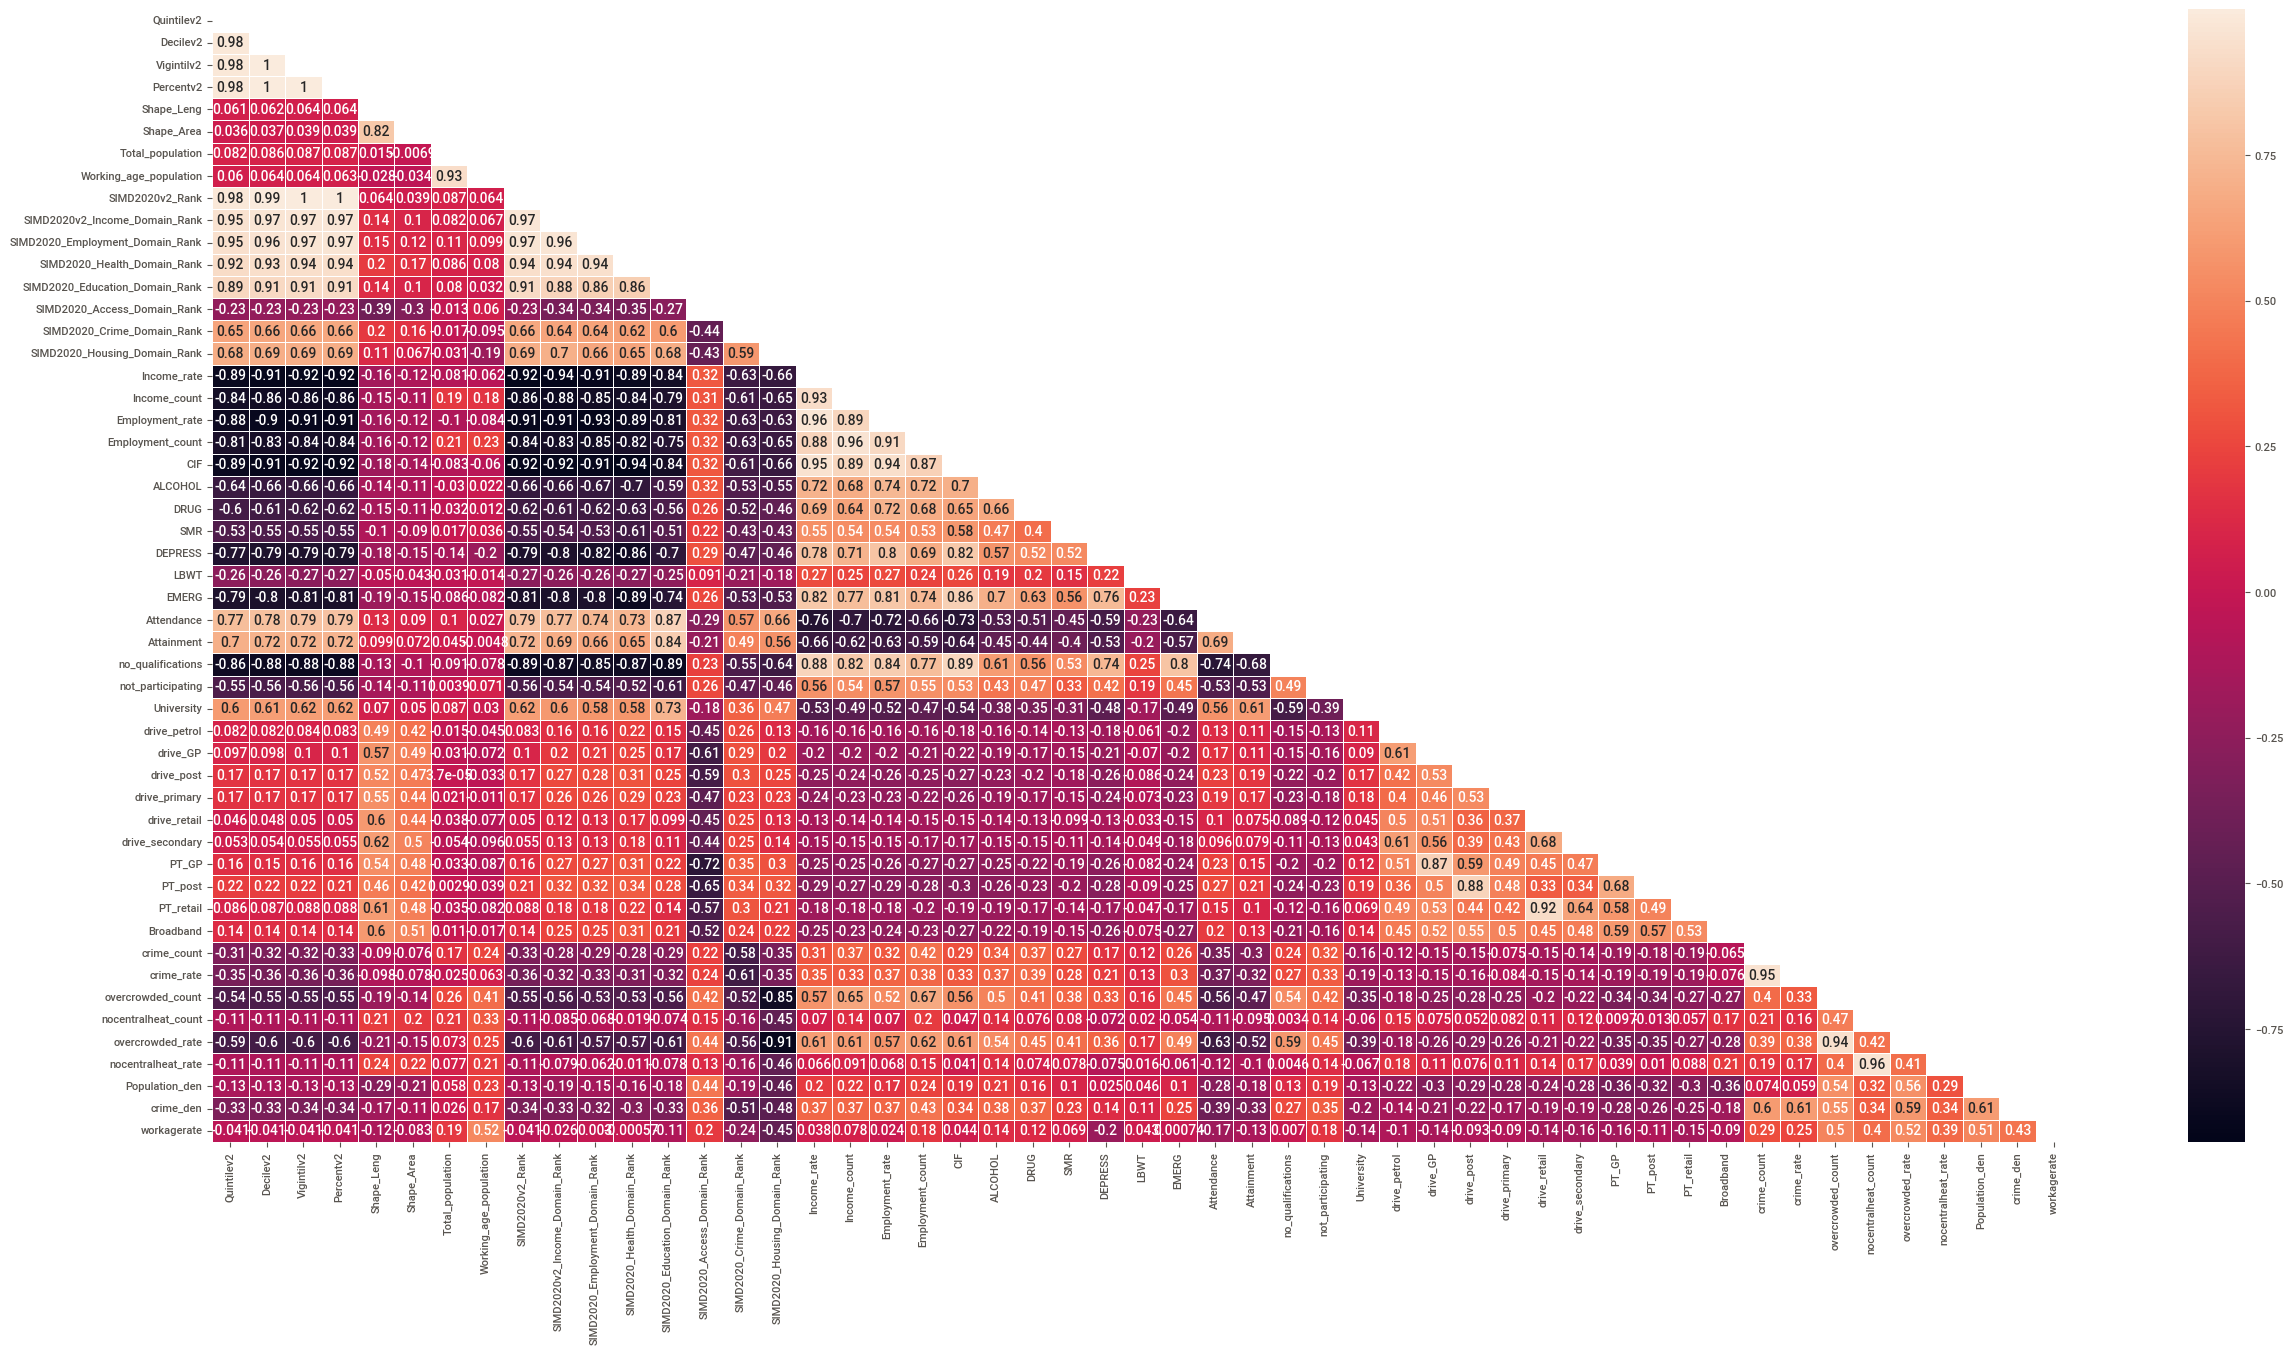

In [11]:
# Corrilation heatmap

corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f,ax =plt.subplots(figsize=(30,15))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax, mask=mask)
plt.show()

In [12]:
# rank_plot function (change to have neg as diff colour to make more visable)

def rank_plot(scores, title):
    scores = scores.sort_values(key=abs, ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores.abs(), color="blue")
    plt.yticks(width, ticks)
    plt.title(title)
    it = iter(range(len(scores)))
    scores.apply(lambda x: plt.text(abs(x), next(it),'{:.2f}%'.format(x * 100)))
    #plt.bar_label(ax.containers[0])

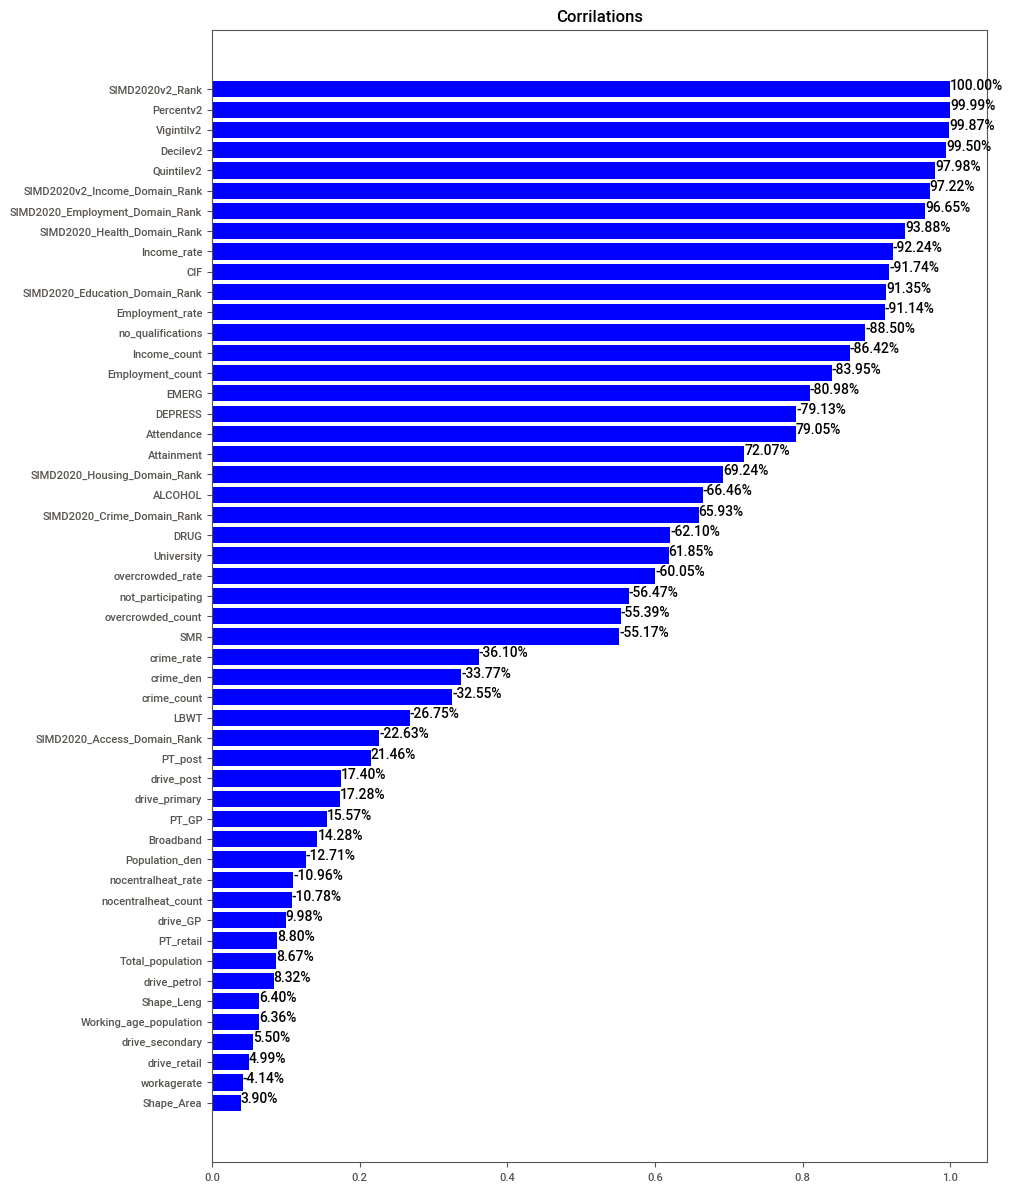

In [13]:
# List coorilations to rank

corr_list = df[df.columns[:]].corr()['SIMD2020v2_Rank'][:]

plt.figure(dpi=100, figsize=(10, 15))
rank_plot(corr_list, 'Corrilations')

In [14]:
# Mutual Information (need to sort nans first)

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [15]:
# Won't work with nans

X = df.drop(['SIMD2020v2_Rank'],axis=1)
y = df['SIMD2020v2_Rank']

mi_scores = make_mi_scores(X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [16]:
plt.figure(dpi=100, figsize=(10, 15))
rank_plot(mi_scores, 'Mutual Information Scores')

NameError: name 'mi_scores' is not defined

<Figure size 1000x1500 with 0 Axes>

## Local Council level

In [33]:
# Pivot tables to get Council level figures (Counts sumed)
# This could also be found on the dataset but not in the published docs.
table1 = pd.pivot_table(data=df, index='Council_area', values=['Total_population', 'Working_age_population','Income_count', 'Employment_count', 'crime_count', 'overcrowded_count', 'nocentralheat_count', 'Shape_Area'], aggfunc='sum')

# Pivot tables to get Council level figures (Distances averaged sumed)

table2 = pd.pivot_table(data=df, index='Council_area', values=['drive_petrol', 'drive_GP', 'drive_post', 'drive_primary', 'drive_retail', 'drive_secondary', 'PT_GP', 'PT_post', 'PT_retail', 'Shape_Area', 'SIMD2020v2_Rank', 'SIMD2020v2_Income_Domain_Rank',
       'SIMD2020_Employment_Domain_Rank', 'SIMD2020_Health_Domain_Rank',
       'SIMD2020_Education_Domain_Rank', 'SIMD2020_Access_Domain_Rank',
       'SIMD2020_Crime_Domain_Rank', 'SIMD2020_Housing_Domain_Rank',], aggfunc='mean')
# Rename Shape area to average
table2 = table2.rename({'Shape_Area': 'Ave_Shape_Area'}, axis=1)

# Merging tables
council_leveldf = pd.merge(table1, table2, left_index=True, right_index=True)
# also adding council funding info
council_leveldf = pd.merge(council_leveldf, councilfundingdf, left_index=True, right_index=True)
council_leveldf['FundingperPerson'] = council_leveldf['LG_fin_set_21-22'] / council_leveldf['Total_population']

In [34]:
council_leveldf

Employment_count  Income_count    Shape_Area  \
Council_area                                                          
Aberdeen City                     11244         19610  1.857063e+08   
Aberdeenshire                      8602         16531  6.312609e+09   
Angus                              5799         11744  2.181785e+09   
Argyll and Bute                    4065          8450  6.909466e+09   
City of Edinburgh                 23550         44581  2.633339e+08   
Clackmannanshire                   3706          7305  1.586376e+08   
Dumfries and Galloway              7748         17084  6.426195e+09   
Dundee City                       12256         24391  5.977683e+07   
East Ayrshire                      8796         18532  1.262122e+09   
East Dunbartonshire                4023          7735  1.744888e+08   
East Lothian                       5265         10711  6.791802e+08   
East Renfrewshire                  3201          6424  1.742412e+08   
Falkirk                            9210         18049  2.973635e+08   
Fife                              21903         44357  1.324860e+09   
Glasgow City                      58374        119742  1.746756e+08   
Highland                          11061         22916  2.568389e+10   
Inverclyde                         7126         13945  1.604352e+08   
Midlothian                         4728          9733  3.536855e+08   
Moray                              4012          8117  2.237564e+09   
Na h-Eileanan an Iar               1186          2637  3.059500e+09   
North Ayrshire                    10988         23059  8.853396e+08   
North Lanarkshire                 24796         50897  4.699126e+08   
Orkney Islands                      772          1504  9.898042e+08   
Perth and Kinross                  5897         12046  5.285575e+09   
Renfrewshire                      11983         23087  2.614877e+08   
Scottish Borders                   5201         10811  4.731740e+09   
Shetland Islands                    768          1287  1.466652e+09   
South Ayrshire                     6720         13784  1.221982e+09   
South Lanarkshire                 19617         40695  1.771891e+09   
Stirling                           4215          8150  2.186968e+09   
West Dunbartonshire                7568         15728  1.587582e+08   
West Lothian                      10411         20919  4.274875e+08   

                       Total_population  Working_age_population   crime_count  \
Council_area                                                                    
Aberdeen City                    228800                  159013   8063.759559   
Aberdeenshire                    261800                  164106   4511.064228   
Angus                            116280                   70187   2668.367539   
Argyll and Bute                   86810                   51810   1665.760206   
City of Edinburgh                513210                  358090  17759.791173   
Clackmannanshire                  51450                   32380   1743.766631   
Dumfries and Galloway            149200                   88304   4411.989113   
Dundee City                      148710                   98770   5713.734369   
East Ayrshire                    121940                   76589   3423.897871   
East Dunbartonshire              108130                   65372   1647.897439   
East Lothian                     104840                   64933   2166.698356   
East Renfrewshire                 94760                   57037   1623.898133   
Falkirk                          160130                  102271   4983.565124   
Fife                             371410                  232485   9774.715871   
Glasgow City                     621020                  437911  27351.962087   
Highland                         235180                  144586   5813.198899   
Inverclyde                        78760                   49776   2205.918533   
Midlothian                        90090                   56175   263

<AxesSubplot:xlabel='SIMD2020v2_Rank', ylabel='FundingperPerson'>

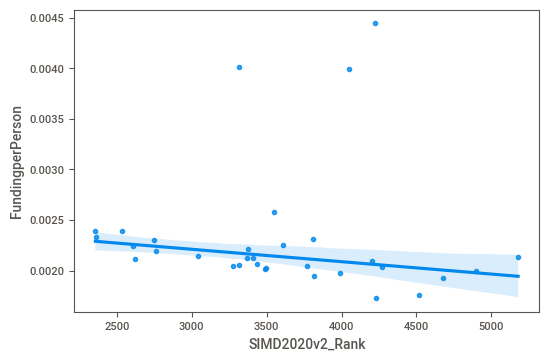

In [19]:
sns.regplot(data=council_leveldf, x='SIMD2020v2_Rank', y='FundingperPerson', robust=True)

Sadly it looks like there is a general negative trend between SIMD rank and funding per person.  
However it is noticeable that the four lowest ranked councils do show an uptick.  
The outliers in the scatterplot are Orkney, Shetland and the Western Isles.

In [60]:
gdf2


Name   StdAreaHa  StdAreaKm2    Shape_Leng  \
Data_Zone                                                              
S01006506          Culter - 01  438.880218    4.388801  11801.872345   
S01006507          Culter - 02   22.349739    0.223498   2900.406362   
S01006508          Culter - 03   27.019476    0.270194   3468.761949   
S01006509          Culter - 04    9.625426    0.096254   1647.461389   
S01006510          Culter - 05   18.007657    0.180076   3026.111412   
...                        ...         ...         ...           ...   
S01013477  Broxburn South - 06   10.988164    0.109882   1775.782199   
S01013478   Broxburn East - 01   12.438169    0.124382   2319.192976   
S01013479   Broxburn East - 02   26.714576    0.267145   3234.544766   
S01013480   Broxburn East - 03    9.624700    0.096248   1598.577583   
S01013481   Broxburn East - 04  511.606694    5.116068  13900.390027   

             Shape_Area                                           geometry  
Data_Zone                                                                   
S01006506  4.388802e+06  POLYGON ((-2.27748 57.09527, -2.27644 57.09521...  
S01006507  2.217468e+05  POLYGON ((-2.27354 57.10449, -2.27333 57.10449...  
S01006508  2.701948e+05  POLYGON ((-2.27443 57.10171, -2.27237 57.10046...  
S01006509  9.625426e+04  POLYGON ((-2.26611 57.10133, -2.26599 57.10092...  
S01006510  1.800766e+05  POLYGON ((-2.26013 57.10160, -2.26050 57.10134...  
...                 ...                                                ...  
S01013477  1.098816e+05  POLYGON ((-3.46323 55.93434, -3.46319 55.93408...  
S01013478  1.243817e+05  POLYGON ((-3.48355 55.93733, -3.48354 55.93728...  
S01013479  2.671458e+05  POLYGON ((-3.46664 55.93627, -3.46652 55.93622...  
S01013480  9.624701e+04  POLYGON ((-3.46259 55.93774, -3.46243 55.93725...  
S01013481  5.116067e+06  POLYGON ((-3.44318 55.93923, -3.44285 55.93909...  

[6976 rows x 6 columns]

In [53]:
gdf2 = gdf2.drop(['TotPop2011', 'ResPop2011', 'HHCnt2011'], axis=1)

local_councilsgdf = gdf2.dissolve(by='Name')

council_levelgdf = pd.merge(gdf2, council_leveldf, left_on='Name', right_on='Council_area')
council_levelgdf.columns

Index(['Name', 'StdAreaHa', 'StdAreaKm2', 'Shape_Leng', 'Shape_Area_x',
       'geometry_x', 'Employment_count', 'Income_count', 'Shape_Area_y',
       'Total_population', 'Working_age_population', 'crime_count',
       'nocentralheat_count', 'overcrowded_count', 'PT_GP', 'PT_post',
       'PT_retail', 'SIMD2020_Access_Domain_Rank',
       'SIMD2020_Crime_Domain_Rank', 'SIMD2020_Education_Domain_Rank',
       'SIMD2020_Employment_Domain_Rank', 'SIMD2020_Health_Domain_Rank',
       'SIMD2020_Housing_Domain_Rank', 'SIMD2020v2_Income_Domain_Rank',
       'SIMD2020v2_Rank', 'Ave_Shape_Area', 'drive_GP', 'drive_petrol',
       'drive_post', 'drive_primary', 'drive_retail', 'drive_secondary',
       'LG_fin_set_21-22', 'FundingperPerson', 'geometry_y'],
      dtype='object')

In [59]:
#Disolve geopandas dataframe to council level (only works on geometry)



AttributeError: No geometry data set yet (expected in column 'geometry'.)

<AxesSubplot:>

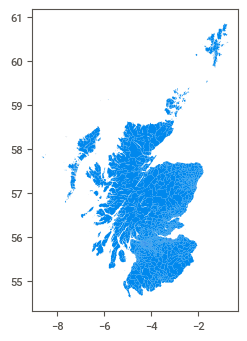

In [55]:
council_levelgdf.plot()

KeyError: 'Council_area'

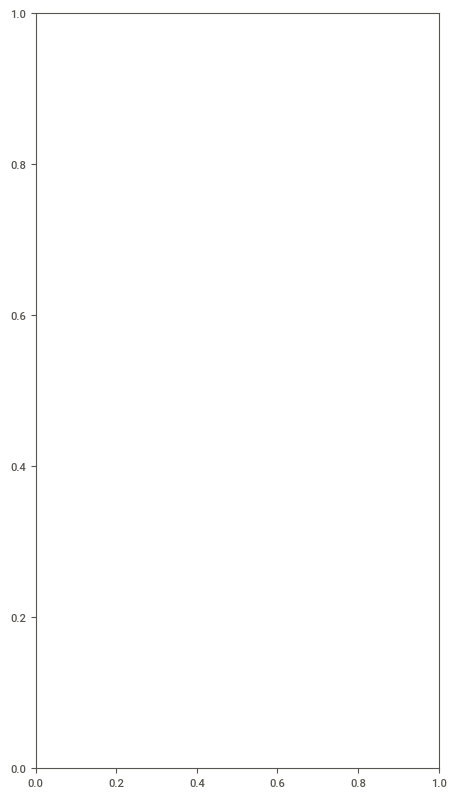

In [56]:
ax = gdf.plot('Council_area', figsize=(10, 10), legend=True, legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
ax.add_artist(ScaleBar(1))

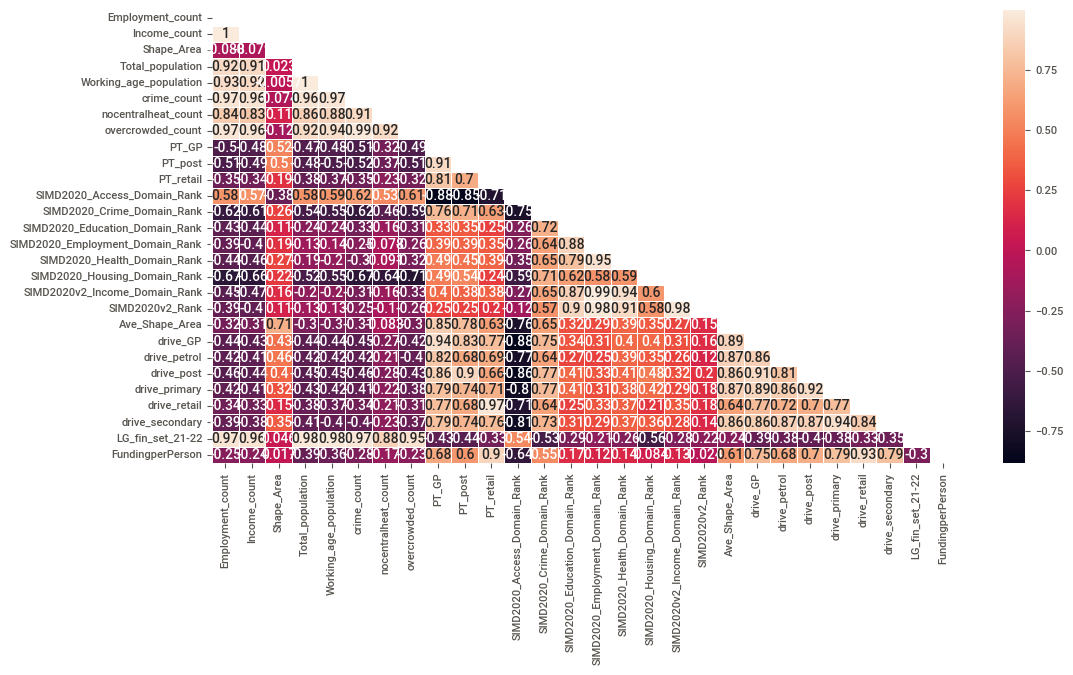

In [40]:
# Corrilation heatmap

corr = council_leveldf.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f,ax =plt.subplots(figsize=(12,6))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax, mask=mask)
plt.show()

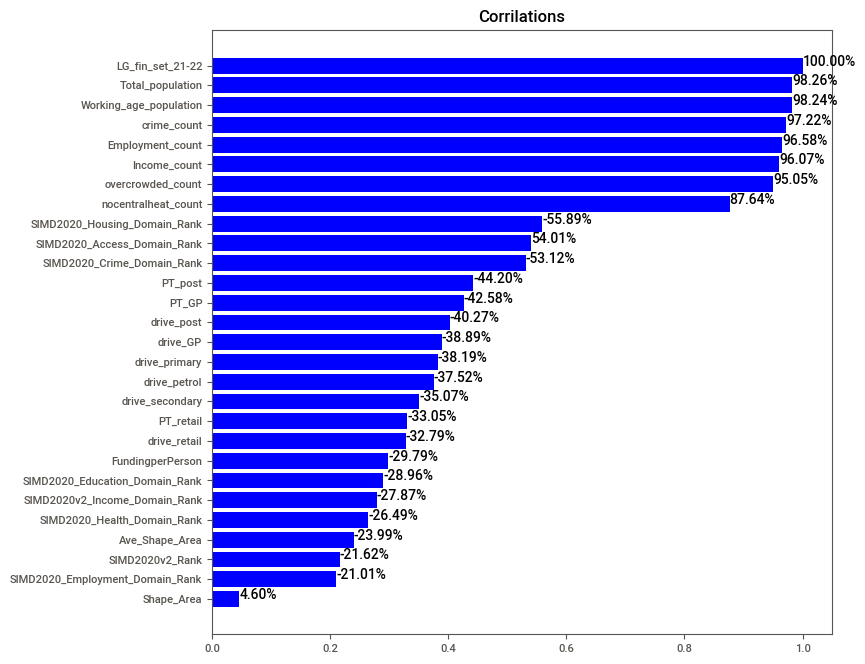

In [41]:
# List coorilations to council funding

corr_list = council_leveldf[council_leveldf.columns[:]].corr()['LG_fin_set_21-22'][:]

plt.figure(dpi=100, figsize=(8, 8))
rank_plot(corr_list, 'Corrilations')

In [ ]:
X = council_leveldf.drop(['LG_fin_set_21-22'],axis=1)
y = council_leveldf['LG_fin_set_21-22']

mi_scores = make_mi_scores(X, y)

In [43]:
plt.figure(dpi=100, figsize=(8, 8))
rank_plot(mi_scores, 'Mutual Information Scores')

NameError: name 'mi_scores' is not defined

<Figure size 800x800 with 0 Axes>

ERROR! Session/line number was not unique in database. History logging moved to new session 485


In [44]:
#sns.pairplot(council_leveldf, hue='LG_fin_set_21-22')

## Sellecting on local council area

In [45]:
eastdun = gdf[(gdf.Council_area == 'East Dunbartonshire')]

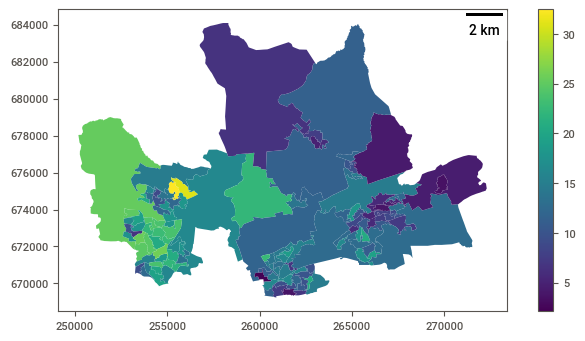

In [46]:
# 

ax = eastdun.plot('University', figsize=(8, 4), legend=True)
ax.add_artist(ScaleBar(1))

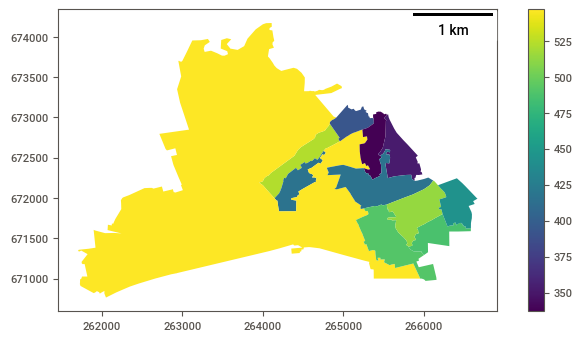

In [47]:
#Sellecting Town (Made up of two Data Zones)

Lenzie = eastdun[(eastdun.Intermediate_Zone == 'Lenzie North') | (eastdun.Intermediate_Zone == 'Lenzie South')]
ax = Lenzie.plot('Working_age_population', figsize=(8, 4), legend=True)
ax.add_artist(ScaleBar(1))

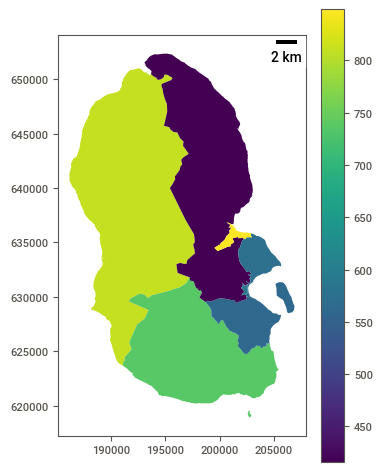

In [48]:
Arran = gdf[(gdf.Intermediate_Zone == 'Arran')]
ax = Arran.plot('Total_population', figsize=(4, 6), legend=True)
ax.add_artist(ScaleBar(1))

<AxesSubplot:>

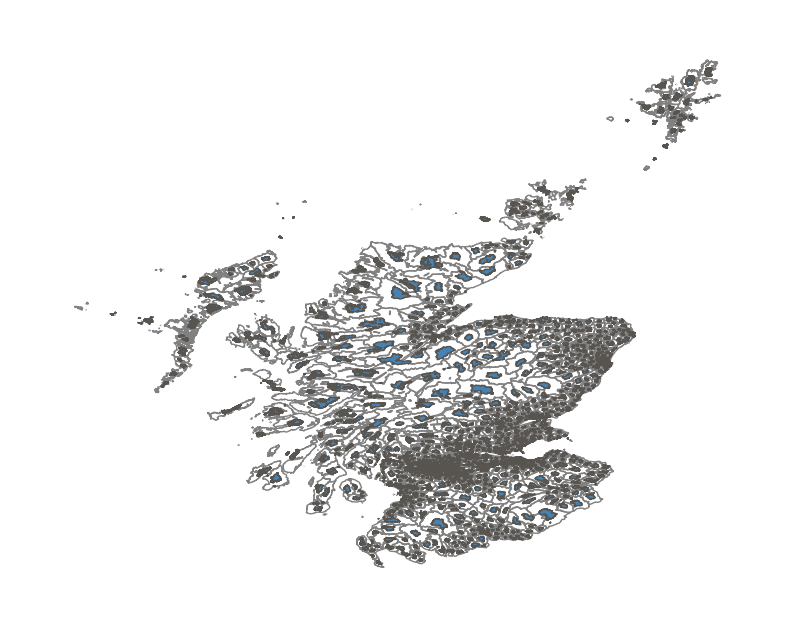

In [49]:
# This scales a representation of area by the coloumn selected 

ax = gplt.cartogram(
    gdf2, scale='TotPop2011',
    figsize=(10, 10)
)
gplt.polyplot(gdf2, edgecolor='gray', ax=ax)

In [51]:
ax = gplt.cartogram(council_levelgdf, scale='TotPop2011', edgecolor='gray', figsize=(10, 10))
gplt.polyplot(council_levelgdf, edgecolor='gray')

KeyError: 'TotPop2011'

### Also adding some additional Scottish government data that might be of interest to include

It might be intresting to compare this data with council funding.
Data created from https://www.gov.scot/publications/local-government-finance-circular-5-2021-settlement-for-2021-2022/  
Council funding is not straight forward, further details can be found:- https://www.gov.scot/collections/local-government-finance-statistics/  
  
House prices are often used an indicator of the affluence of an area. Collected House price data from and also included the urban rural classification https://statistics.gov.scot/  
  
Also, adding the rural/urban rank to investiage what impact this makesd to the indicators.  

In [ ]:
# Council funding
councilfundingdf = pd.read_csv(path+"Total_LG_Fund21-22.csv",  index_col=0)

# 
housepricedf = pd.read_csv(path+"housepricesDZ.csv") # Not able to query with SPARQL
#licence http://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/

In [ ]:
# importing data to pandas
df = pd.read_csv(path+"rural_urban.csv")

In [ ]:
SIMD_rural_full = pd.merge(gdf, df, left_on='DZName', right_on='Reference Area')
SIMD_rural_full.columns

In [ ]:
means = SIMD_rural_full.groupby('Rank_2016').mean()
medians = SIMD_rural_full.groupby('Rank_2016').median()